# Importing packages and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer, SimpleImputer, IterativeImputer

# Section A - Exploration and Preproccesing

## CountyData

In [2]:
land = pd.read_csv("data/CountyData/5296US_landarea.csv")
display(land.info())
display(land.isna().sum())
display(land)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FIPS       3111 non-null   int64  
 1   State      3111 non-null   object 
 2   County     3111 non-null   object 
 3   Land Area  3111 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 97.3+ KB


None

FIPS         0
State        0
County       0
Land Area    0
dtype: int64

FIPS    State      County  Land Area
0      1001  Alabama     Autauga     1543.7
1      1003  Alabama     Baldwin     4135.0
2      1005  Alabama     Barbour     2292.1
3      1007  Alabama        Bibb     1611.9
4      1009  Alabama      Blount     1672.3
...     ...      ...         ...        ...
3106  56037  Wyoming  Sweetwater    27003.0
3107  56039  Wyoming       Teton    10380.6
3108  56041  Wyoming       Uinta     5391.7
3109  56043  Wyoming    Washakie     5802.0
3110  56045  Wyoming      Weston     6210.6

[3111 rows x 4 columns]

In [3]:
water = pd.read_csv("data/CountyData/5296US_waterarea.csv")
display(water.info())
display(water.isna().sum())
display(water)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FIPS        3111 non-null   int64  
 1   State       3111 non-null   object 
 2   County      3111 non-null   object 
 3   Water Area  2758 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 97.3+ KB


None

FIPS            0
State           0
County          0
Water Area    353
dtype: int64

FIPS    State      County  Water Area
0      1001  Alabama     Autauga        22.0
1      1003  Alabama     Baldwin      1115.1
2      1005  Alabama     Barbour        50.7
3      1007  Alabama        Bibb         8.1
4      1009  Alabama      Blount        12.9
...     ...      ...         ...         ...
3106  56037  Wyoming  Sweetwater       170.0
3107  56039  Wyoming       Teton       554.3
3108  56041  Wyoming       Uinta        15.3
3109  56043  Wyoming    Washakie         7.0
3110  56045  Wyoming      Weston         5.7

[3111 rows x 4 columns]

In [4]:
pop = pd.read_csv("data/CountyData/5296US_pop.csv")
display(pop.info())
display(pop.isna().sum())
display(pop)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   FIPS        3111 non-null   int64 
 1   State       3111 non-null   object
 2   County      3111 non-null   object
 3   Date        3111 non-null   int64 
 4   Population  3111 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 121.6+ KB


None

FIPS          0
State         0
County        0
Date          0
Population    0
dtype: int64

FIPS    State      County  Date  Population
0      1001  Alabama     Autauga  1990       34222
1      1003  Alabama     Baldwin  1990       98280
2      1005  Alabama     Barbour  1990       25417
3      1007  Alabama        Bibb  1990       16576
4      1009  Alabama      Blount  1990       39248
...     ...      ...         ...   ...         ...
3106  56037  Wyoming  Sweetwater  1990       38823
3107  56039  Wyoming       Teton  1990       11172
3108  56041  Wyoming       Uinta  1990       18705
3109  56043  Wyoming    Washakie  1990        8388
3110  56045  Wyoming      Weston  1990        6518

[3111 rows x 5 columns]

We notice that the three dataframes have FIPS,State and County columns and the same number of entries. so we can merge them into one dataframe.

But before we merge, we have to impute the missing values founded in water (353 water area). That will be done by:

1- copy the dataframe to cwater.

2- factorize the string columns into numeric values

3- impute the missing values with KNNImputer with n_neighbors = 10, thus to keep as close as possible to the real numbers.

4- replace water area with the imputed one.

In [5]:
cwater = water.copy()
for col in cwater.columns:
    if cwater[col].dtype == 'object':
        cwater[col] = pd.factorize(cwater[col])[0]
knn = KNNImputer(n_neighbors=10).fit(cwater)
cwater = pd.DataFrame(knn.transform(cwater), columns=water.columns)
display(cwater.isna().sum())

FIPS          0
State         0
County        0
Water Area    0
dtype: int64

In [6]:
water['Water Area'] = cwater['Water Area']

In [7]:
countyData = pd.merge(land, pd.merge(water,pop))

# lower case headers
countyData.columns = countyData.columns.str.lower()

# lower case string values
countyData = countyData.applymap(lambda s: s.lower() if type(s) == str else s)

# check the final output
display(countyData.head(10))
display(countyData.isna().sum())

fips    state    county  land area  water area  date  population
0  1001  alabama   autauga     1543.7        22.0  1990       34222
1  1003  alabama   baldwin     4135.0      1115.1  1990       98280
2  1005  alabama   barbour     2292.1        50.7  1990       25417
3  1007  alabama      bibb     1611.9         8.1  1990       16576
4  1009  alabama    blount     1672.3        12.9  1990       39248
5  1011  alabama   bullock     1618.9         2.7  1990       11042
6  1013  alabama    butler     2012.3         2.7  1990       21892
7  1015  alabama   calhoun     1576.0        10.0  1990      116034
8  1017  alabama  chambers     1547.3        14.9  1990       36876
9  1019  alabama  cherokee     1432.7       121.3  1990       19543

fips          0
state         0
county        0
land area     0
water area    0
date          0
population    0
dtype: int64

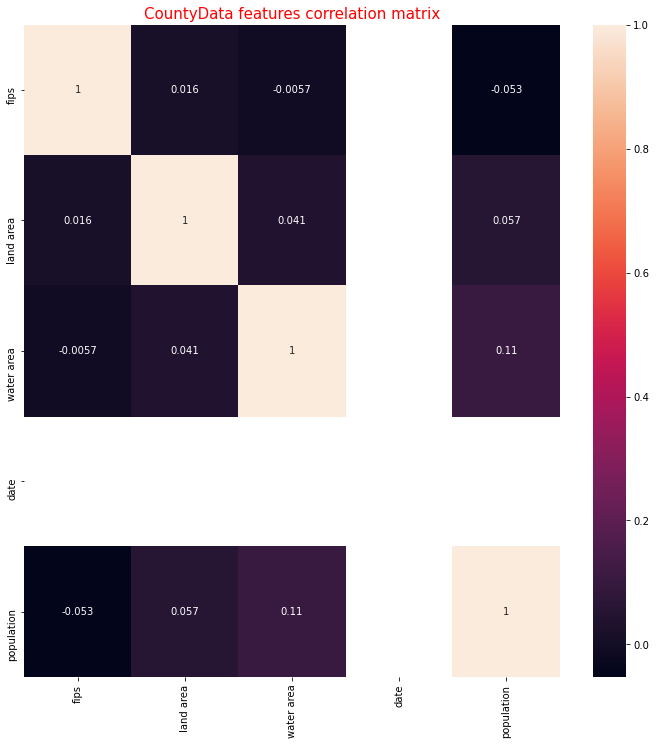

In [8]:
plt.figure(figsize=(12,12))
sns.heatmap(countyData.corr(), annot=True)
plt.title("CountyData features correlation matrix", fontsize=15, color='red')
plt.xticks(rotation = 90)
plt.show()

<Figure size 1440x1440 with 0 Axes>

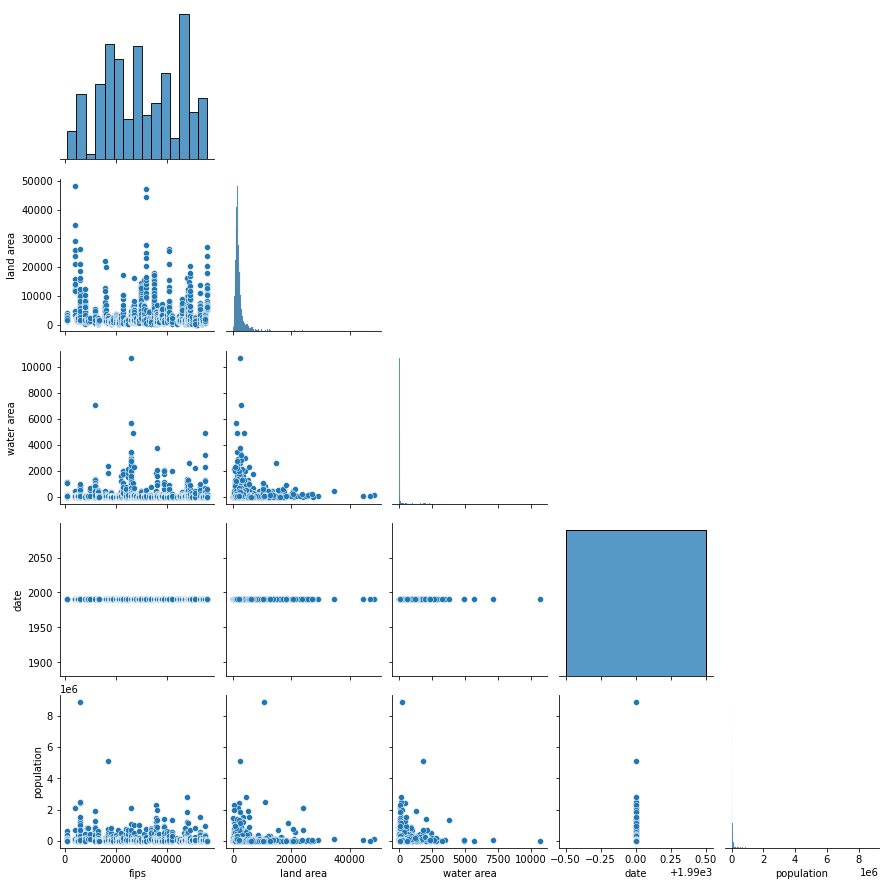

In [9]:
plt.figure(figsize=(20,20))
sns.pairplot(countyData, corner=True)
plt.show()

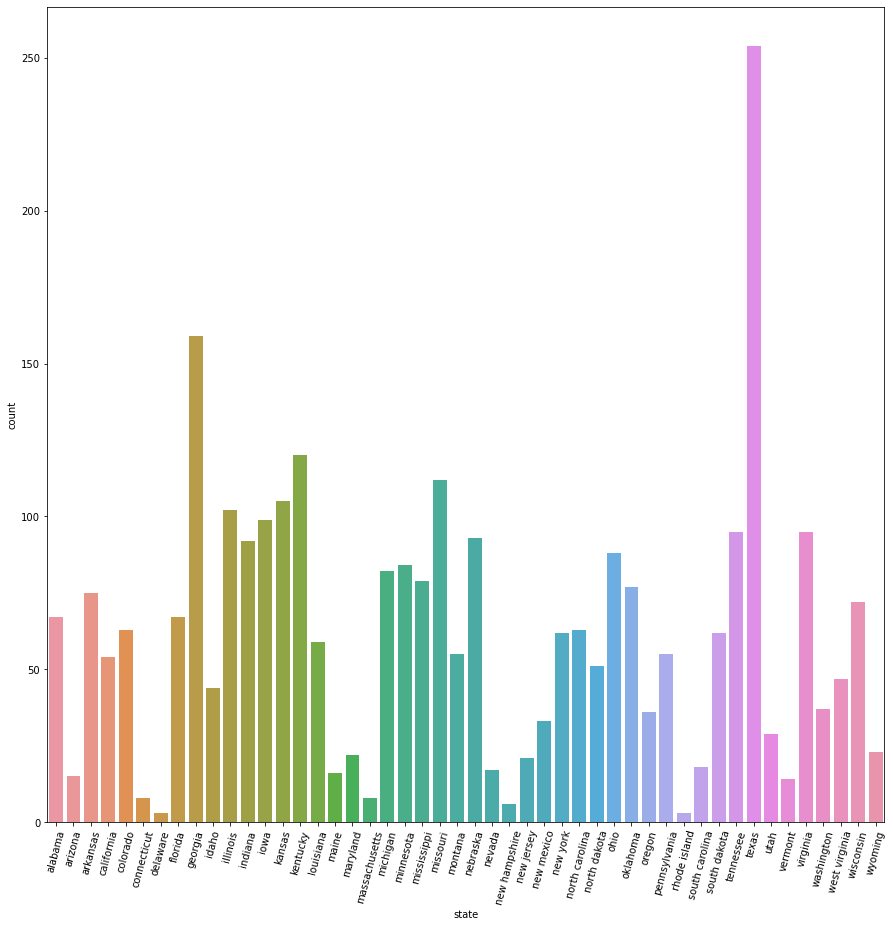

In [10]:
plt.figure(figsize=(15,15))
sns.countplot(data=countyData, x='state')
plt.xticks(rotation = 75)
plt.show()

## EconomicData

In [11]:
bcb = pd.read_csv("data/EconomicData/BCB-UDJIAD1.csv")
display(bcb.info())
display(bcb.isna().sum())
display(bcb)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32601 entries, 0 to 32600
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    32601 non-null  object 
 1   Value   32601 non-null  float64
dtypes: float64(1), object(1)
memory usage: 509.5+ KB


None

Date     0
Value    0
dtype: int64

Date     Value
0      2016-04-15  17897.46
1      2016-04-14  17926.43
2      2016-04-13  17908.28
3      2016-04-12  17721.25
4      2016-04-11  17556.41
...           ...       ...
32596  1896-07-18     31.50
32597  1896-07-17     31.94
32598  1896-07-16     31.95
32599  1896-07-15     32.28
32600  1896-07-14     33.43

[32601 rows x 2 columns]

Date column is considered as string, in order to make benefit of it we will cast into datetime and then create three new columns to replace date, which are (day, month, year) all of numeric types. to keep the dataframe as close as possible we will rearrange the columns.

In [12]:
# lower case headers
bcb.columns = bcb.columns.str.lower()

bcb['date'] = pd.to_datetime(bcb['date'])
bcb['day'] = pd.to_numeric(bcb.date.dt.strftime('%d'))
bcb['month'] = pd.to_numeric(bcb.date.dt.strftime('%m'))
bcb['year'] = pd.to_numeric(bcb.date.dt.strftime('%Y'))
bcb = bcb[['day', 'month', 'year', 'value']]
display(bcb)

day  month  year     value
0       15      4  2016  17897.46
1       14      4  2016  17926.43
2       13      4  2016  17908.28
3       12      4  2016  17721.25
4       11      4  2016  17556.41
...    ...    ...   ...       ...
32596   18      7  1896     31.50
32597   17      7  1896     31.94
32598   16      7  1896     31.95
32599   15      7  1896     32.28
32600   14      7  1896     33.43

[32601 rows x 4 columns]

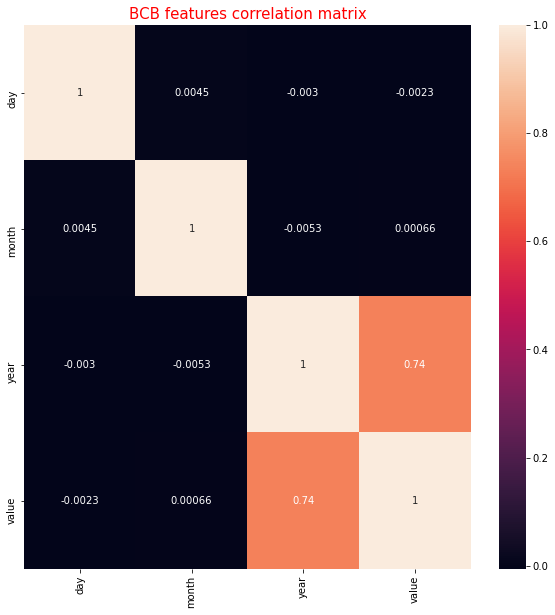

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(bcb.corr(), annot=True)
plt.title("BCB features correlation matrix", fontsize=15, color='red')
plt.xticks(rotation = 90)
plt.show()

We noticed a fairly high correlation between year and value, so we will visualize this further

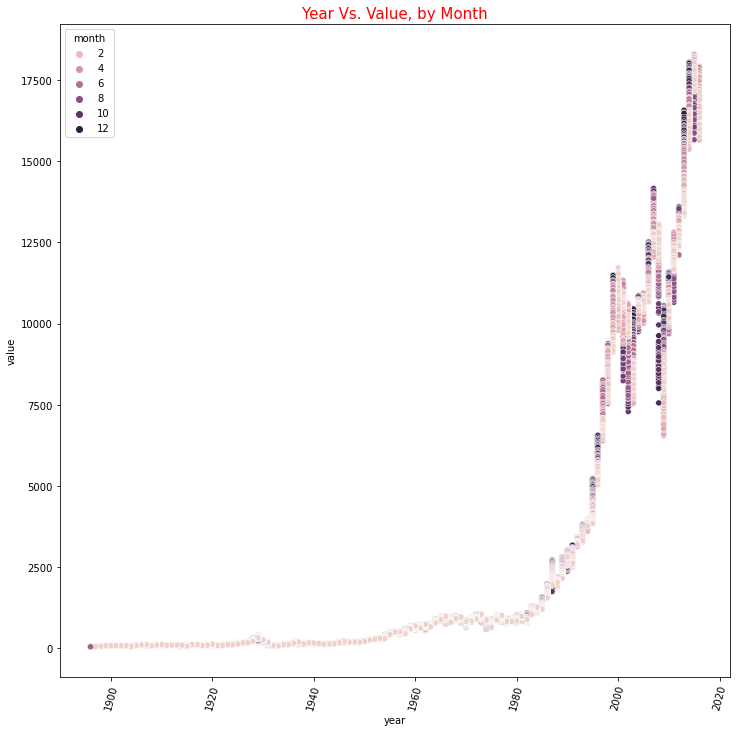

In [14]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=bcb, x='year', y='value', hue='month')
plt.title("Year Vs. Value, by Month", fontsize=15, color='red')
plt.xticks(rotation = 75)
plt.show()

In [15]:
county1 = pd.read_csv("data/EconomicData/county1.csv")
display(county1.info())
display(county1.isna().sum())
display(county1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3272 entries, 0 to 3271
Data columns (total 6 columns):
 #   Column                                                                     Non-Null Count  Dtype 
---  ------                                                                     --------------  ----- 
 0   Table C1.  Median Household Income by County:  1969, 1979, 1989, and 1999  3209 non-null   object
 1   Unnamed: 1                                                                 3231 non-null   object
 2   Unnamed: 2                                                                 3193 non-null   object
 3   Unnamed: 3                                                                 3193 non-null   object
 4   Unnamed: 4                                                                 3186 non-null   object
 5   Unnamed: 5                                                                 1 non-null      object
dtypes: object(6)
memory usage: 153.5+ KB


None

Table C1.  Median Household Income by County:  1969, 1979, 1989, and 1999      63
Unnamed: 1                                                                     41
Unnamed: 2                                                                     79
Unnamed: 3                                                                     79
Unnamed: 4                                                                     86
Unnamed: 5                                                                   3271
dtype: int64

Table C1.  Median Household Income by County:  1969, 1979, 1989, and 1999  \
0                                                   NaN                          
1                                  (In current dollars)                          
2                                                   NaN                          
3                                                   NaN                          
4                                                   NaN                          
...                                                 ...                          
3267                                     (301) 457-3242                          
3268                                                NaN                          
3269                                                NaN                          
3270                                                NaN                          
3271                                                NaN                          

     Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  
0           NaN        NaN        NaN        NaN        NaN  
1           NaN        NaN        NaN        NaN        NaN  
2           NaN        NaN        NaN        NaN        NaN  
3          1999       1989       1979       1969        NaN  
4           NaN        NaN        NaN        NaN        NaN  
...         ...        ...        ...        ...        ...  
3267        NaN        NaN        NaN        NaN        NaN  
3268        NaN        NaN        NaN        NaN        NaN  
3269        NaN        NaN        NaN        NaN        NaN  
3270        NaN        NaN        NaN        NaN        NaN  
3271  ---------        NaN        NaN        NaN        NaN  

[3272 rows x 6 columns]

We notice that:

1- the dataframe has multiple line header.

2- has extra rows in the end.

3- has extra column.

so we have to fix the issues.

In [16]:
county1 = county1.loc[5:3258]
county1.drop(columns=['Unnamed: 5'], inplace=True)
county1.columns = ['median household by county', 'mhs1999', 'mhs1989', 'mhs1979', 'mhs1969']
display(county1.info())
display(county1.isna().sum())
display(county1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3254 entries, 5 to 3258
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   median household by county  3200 non-null   object
 1   mhs1999                     3228 non-null   object
 2   mhs1989                     3191 non-null   object
 3   mhs1979                     3191 non-null   object
 4   mhs1969                     3184 non-null   object
dtypes: object(5)
memory usage: 127.2+ KB


None

median household by county    54
mhs1999                       26
mhs1989                       63
mhs1979                       63
mhs1969                       70
dtype: int64

median household by county mhs1999 mhs1989 mhs1979 mhs1969
5                 United States  41,994  30,056  16,841   8,486
6                           NaN     NaN     NaN     NaN     NaN
7                       Alabama  34,135  23,597  13,669   6,419
8            Autauga County, AL  42,013  28,337  16,524   6,808
9            Baldwin County, AL  40,250  25,712  14,614   6,430
...                         ...     ...     ...     ...     ...
3254      Sweetwater County, WY  46,537  36,210  24,114   8,284
3255           Teton County, WY  54,614  31,586  18,442   8,410
3256           Uinta County, WY  44,544  33,259  22,584   8,409
3257        Washakie County, WY  34,943  25,172  18,239   7,588
3258          Weston County, WY  32,348  26,213  20,021   7,796

[3254 rows x 5 columns]

All mhs columns should be of a numeric type, but instead got object, that is caused by missing values. let's explore that missing values and replace them with 0.

In [17]:
for col in county1.columns:
    print(col)
    print(county1[col].unique())
    print('---------------------')

median household by county
['  United States' nan '     Alabama' ... 'Uinta County, WY'
 'Washakie County, WY' 'Weston County, WY']
---------------------
mhs1999
['41,994' nan '34,135' ... '44,544' '34,943' '32,348']
---------------------
mhs1989
['30,056' nan '23,597' ... '33,259' '25,172' '26,213']
---------------------
mhs1979
['16,841' nan '13,669' ... '22,584' '18,239' '20,021']
---------------------
mhs1969
['8,486' nan '6,419' ... '8,410' '7,588' '7,796']
---------------------


In [18]:
county1.replace(' ',0, inplace=True)
county1.replace(np.nan,0, inplace=True)

# check if we still have missing values
display(county1.isna().sum())

median household by county    0
mhs1999                       0
mhs1989                       0
mhs1979                       0
mhs1969                       0
dtype: int64

Now the numers are typed as string with comma separation as thousands. we have to drop that commas

In [19]:
for col in county1.columns:
    if col == 'median household by county':
        continue
    county1[col].replace(np.nan,0,inplace=True)
    county1[col].replace(' ',0,inplace=True)
    county1[col].replace('(NA)',0,inplace=True)
    county1[col].replace('(a)',0,inplace=True)
    county1[col] = county1[col].replace({',':''},regex=True).apply(pd.to_numeric,1)
display(county1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3254 entries, 5 to 3258
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   median household by county  3254 non-null   object
 1   mhs1999                     3254 non-null   int64 
 2   mhs1989                     3254 non-null   int64 
 3   mhs1979                     3254 non-null   int64 
 4   mhs1969                     3254 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 127.2+ KB


None

In [20]:
display(county1)

median household by county  mhs1999  mhs1989  mhs1979  mhs1969
5                 United States    41994    30056    16841     8486
6                             0        0        0        0        0
7                       Alabama    34135    23597    13669     6419
8            Autauga County, AL    42013    28337    16524     6808
9            Baldwin County, AL    40250    25712    14614     6430
...                         ...      ...      ...      ...      ...
3254      Sweetwater County, WY    46537    36210    24114     8284
3255           Teton County, WY    54614    31586    18442     8410
3256           Uinta County, WY    44544    33259    22584     8409
3257        Washakie County, WY    34943    25172    18239     7588
3258          Weston County, WY    32348    26213    20021     7796

[3254 rows x 5 columns]

In [21]:
county1['median_code'] = pd.factorize(county1['median household by county'])[0]
display(county1)

median household by county  mhs1999  mhs1989  mhs1979  mhs1969  \
5                 United States    41994    30056    16841     8486   
6                             0        0        0        0        0   
7                       Alabama    34135    23597    13669     6419   
8            Autauga County, AL    42013    28337    16524     6808   
9            Baldwin County, AL    40250    25712    14614     6430   
...                         ...      ...      ...      ...      ...   
3254      Sweetwater County, WY    46537    36210    24114     8284   
3255           Teton County, WY    54614    31586    18442     8410   
3256           Uinta County, WY    44544    33259    22584     8409   
3257        Washakie County, WY    34943    25172    18239     7588   
3258          Weston County, WY    32348    26213    20021     7796   

      median_code  
5               0  
6               1  
7               2  
8               3  
9               4  
...           ...  
3254         3194  
3255         3195  
3256         3196  
3257         3197  
3258         3198  

[3254 rows x 6 columns]

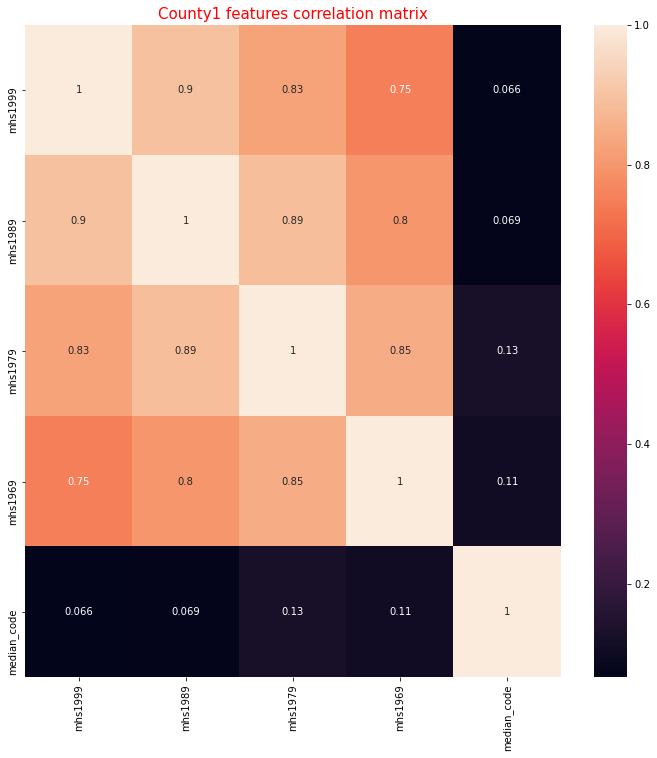

In [22]:
plt.figure(figsize=(12,12))
sns.heatmap(county1.corr(), annot=True)
plt.title("County1 features correlation matrix", fontsize=15, color='red')
plt.xticks(rotation = 90)
plt.show()

<Figure size 1440x1440 with 0 Axes>

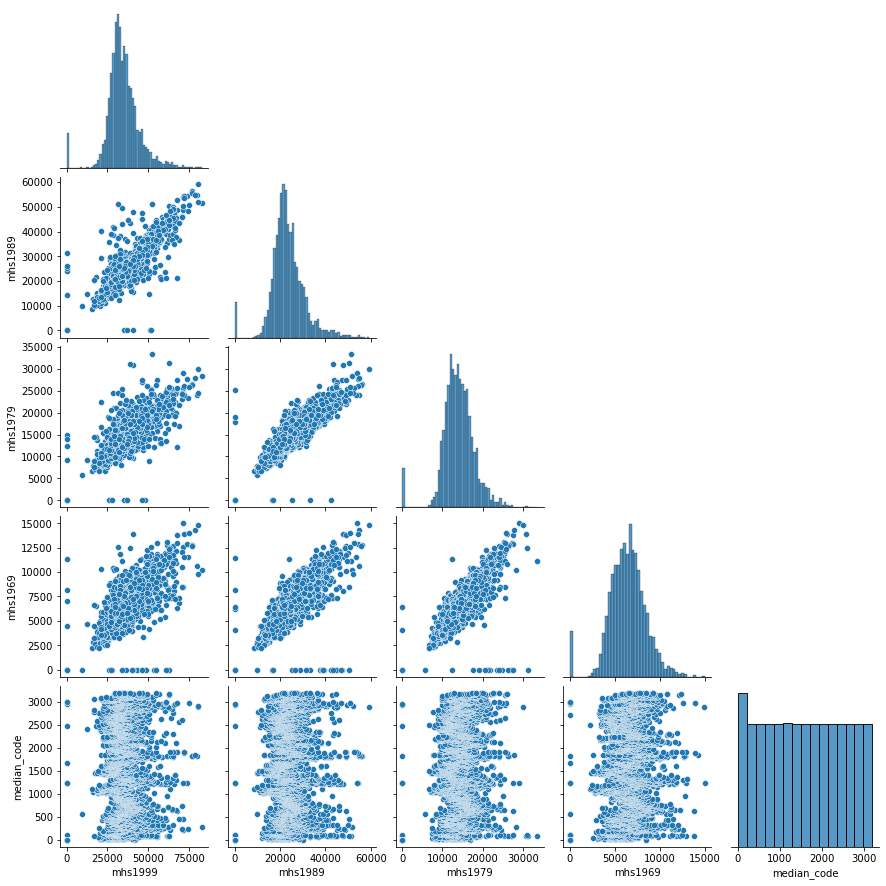

In [23]:
plt.figure(figsize=(20,20))
sns.pairplot(county1, corner=True)
plt.show()

In [24]:
dow = pd.read_csv("data/EconomicData/Dow Jones Industrial Average Historical Data 2.csv")
display(dow.info())
display(dow.isna().sum())
display(dow)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2766 entries, 0 to 2765
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2766 non-null   object
 1   Price     2766 non-null   object
 2   Open      2766 non-null   object
 3   High      2766 non-null   object
 4   Low       2766 non-null   object
 5   Vol.      2766 non-null   object
 6   Change %  2766 non-null   object
dtypes: object(7)
memory usage: 151.4+ KB


None

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

Date      Price       Open       High        Low     Vol.  \
0     Dec 31, 2019  28,538.44  28,414.64  28,547.35  28,376.49  193.34M   
1     Dec 30, 2019  28,462.14  28,654.76  28,664.69  28,428.98  185.07M   
2     Dec 27, 2019  28,645.26  28,675.34  28,701.66  28,608.98  184.93M   
3     Dec 26, 2019  28,621.39  28,539.46  28,624.10  28,535.15  155.97M   
4     Dec 24, 2019  28,515.45  28,572.57  28,576.80  28,503.21   95.29M   
...            ...        ...        ...        ...        ...      ...   
2761  Jan 09, 2009   8,599.18   8,738.80   8,800.45   8,541.75        -   
2762  Jan 08, 2009   8,742.46   8,769.94   8,807.14   8,593.52        -   
2763  Jan 07, 2009   8,769.70   8,996.94   8,996.94   8,690.45        -   
2764  Jan 06, 2009   9,015.10   8,954.57   9,175.19   8,868.07        -   
2765  Jan 05, 2009   8,952.89   9,027.13   9,093.47   8,841.70        -   

     Change %  
0       0.27%  
1      -0.64%  
2       0.08%  
3       0.37%  
4      -0.13%  
...       ...  
2761   -1.64%  
2762   -0.31%  
2763   -2.72%  
2764    0.69%  
2765   -0.91%  

[2766 rows x 7 columns]

We have to preproccess this :

1- Date to datetime then replace by three numeric columns (day, month, year)

2- the other columns are of numeric types, so we have to drop commas, M that says million, and drop %.

In [25]:
# lower case headers
dow.columns = dow.columns.str.lower()

dow['date'] = pd.to_datetime(dow['date'])
dow['day'] = pd.to_numeric(dow.date.dt.strftime('%d'))
dow['month'] = pd.to_numeric(dow.date.dt.strftime('%m'))
dow['year'] = pd.to_numeric(dow.date.dt.strftime('%Y'))
dow = dow[['day', 'month', 'year', 'price', 'open', 'high', 'low', 'vol.', 'change %']]
display(dow.info())
display(dow)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2766 entries, 0 to 2765
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   day       2766 non-null   int64 
 1   month     2766 non-null   int64 
 2   year      2766 non-null   int64 
 3   price     2766 non-null   object
 4   open      2766 non-null   object
 5   high      2766 non-null   object
 6   low       2766 non-null   object
 7   vol.      2766 non-null   object
 8   change %  2766 non-null   object
dtypes: int64(3), object(6)
memory usage: 194.6+ KB


None

day  month  year      price       open       high        low     vol.  \
0      31     12  2019  28,538.44  28,414.64  28,547.35  28,376.49  193.34M   
1      30     12  2019  28,462.14  28,654.76  28,664.69  28,428.98  185.07M   
2      27     12  2019  28,645.26  28,675.34  28,701.66  28,608.98  184.93M   
3      26     12  2019  28,621.39  28,539.46  28,624.10  28,535.15  155.97M   
4      24     12  2019  28,515.45  28,572.57  28,576.80  28,503.21   95.29M   
...   ...    ...   ...        ...        ...        ...        ...      ...   
2761    9      1  2009   8,599.18   8,738.80   8,800.45   8,541.75        -   
2762    8      1  2009   8,742.46   8,769.94   8,807.14   8,593.52        -   
2763    7      1  2009   8,769.70   8,996.94   8,996.94   8,690.45        -   
2764    6      1  2009   9,015.10   8,954.57   9,175.19   8,868.07        -   
2765    5      1  2009   8,952.89   9,027.13   9,093.47   8,841.70        -   

     change %  
0       0.27%  
1      -0.64%  
2       0.08%  
3       0.37%  
4      -0.13%  
...       ...  
2761   -1.64%  
2762   -0.31%  
2763   -2.72%  
2764    0.69%  
2765   -0.91%  

[2766 rows x 9 columns]

In [26]:
# rename vol. to vol. (millions) since we are going to drop M
dow.rename(columns={'vol.': 'vol. (millions)'}, inplace=True)
display(dow)

C:\Users\lover\anaconda3\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


day  month  year      price       open       high        low  \
0      31     12  2019  28,538.44  28,414.64  28,547.35  28,376.49   
1      30     12  2019  28,462.14  28,654.76  28,664.69  28,428.98   
2      27     12  2019  28,645.26  28,675.34  28,701.66  28,608.98   
3      26     12  2019  28,621.39  28,539.46  28,624.10  28,535.15   
4      24     12  2019  28,515.45  28,572.57  28,576.80  28,503.21   
...   ...    ...   ...        ...        ...        ...        ...   
2761    9      1  2009   8,599.18   8,738.80   8,800.45   8,541.75   
2762    8      1  2009   8,742.46   8,769.94   8,807.14   8,593.52   
2763    7      1  2009   8,769.70   8,996.94   8,996.94   8,690.45   
2764    6      1  2009   9,015.10   8,954.57   9,175.19   8,868.07   
2765    5      1  2009   8,952.89   9,027.13   9,093.47   8,841.70   

     vol. (millions) change %  
0            193.34M    0.27%  
1            185.07M   -0.64%  
2            184.93M    0.08%  
3            155.97M    0.37%  
4             95.29M   -0.13%  
...              ...      ...  
2761               -   -1.64%  
2762               -   -0.31%  
2763               -   -2.72%  
2764               -    0.69%  
2765               -   -0.91%  

[2766 rows x 9 columns]

In [30]:
dow = dow.replace({',':'', 'M': '', '%': '', '-':0},regex=True).apply(pd.to_numeric,1)
display(dow.info())
display(dow.isna().sum())
display(dow)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2766 entries, 0 to 2765
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   day              2766 non-null   float64
 1   month            2766 non-null   float64
 2   year             2766 non-null   float64
 3   price            2766 non-null   float64
 4   open             2766 non-null   float64
 5   high             2766 non-null   float64
 6   low              2766 non-null   float64
 7   vol. (millions)  2766 non-null   float64
 8   change %         2766 non-null   float64
dtypes: float64(9)
memory usage: 194.6 KB


None

day                0
month              0
year               0
price              0
open               0
high               0
low                0
vol. (millions)    0
change %           0
dtype: int64

day  month    year     price      open      high       low  \
0     31.0   12.0  2019.0  28538.44  28414.64  28547.35  28376.49   
1     30.0   12.0  2019.0  28462.14  28654.76  28664.69  28428.98   
2     27.0   12.0  2019.0  28645.26  28675.34  28701.66  28608.98   
3     26.0   12.0  2019.0  28621.39  28539.46  28624.10  28535.15   
4     24.0   12.0  2019.0  28515.45  28572.57  28576.80  28503.21   
...    ...    ...     ...       ...       ...       ...       ...   
2761   9.0    1.0  2009.0   8599.18   8738.80   8800.45   8541.75   
2762   8.0    1.0  2009.0   8742.46   8769.94   8807.14   8593.52   
2763   7.0    1.0  2009.0   8769.70   8996.94   8996.94   8690.45   
2764   6.0    1.0  2009.0   9015.10   8954.57   9175.19   8868.07   
2765   5.0    1.0  2009.0   8952.89   9027.13   9093.47   8841.70   

      vol. (millions)  change %  
0              193.34      0.27  
1              185.07      0.00  
2              184.93      0.08  
3              155.97      0.37  
4               95.29      0.00  
...               ...       ...  
2761             0.00      0.00  
2762             0.00      0.00  
2763             0.00      0.00  
2764             0.00      0.69  
2765             0.00      0.00  

[2766 rows x 9 columns]

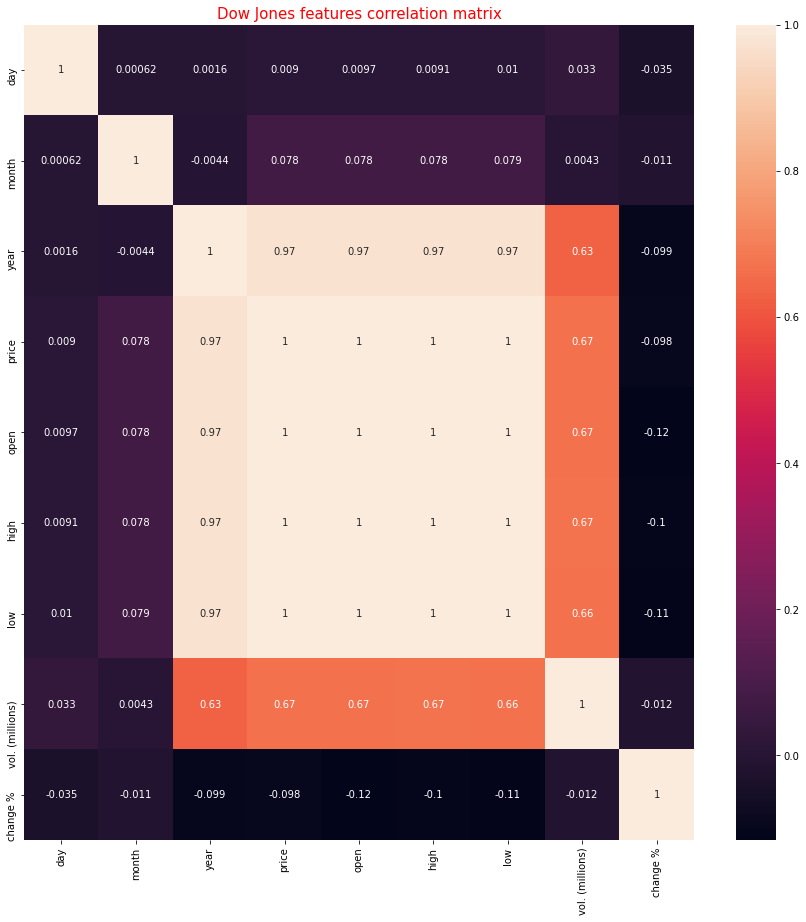

In [31]:
plt.figure(figsize=(15,15))
sns.heatmap(dow.corr(), annot=True)
plt.title("Dow Jones features correlation matrix", fontsize=15, color='red')
plt.xticks(rotation =90)
plt.show()

We notice a very high correlation group consisted by (year, price, open, high, low) so we chose to drop all but price.

<Figure size 1440x1440 with 0 Axes>

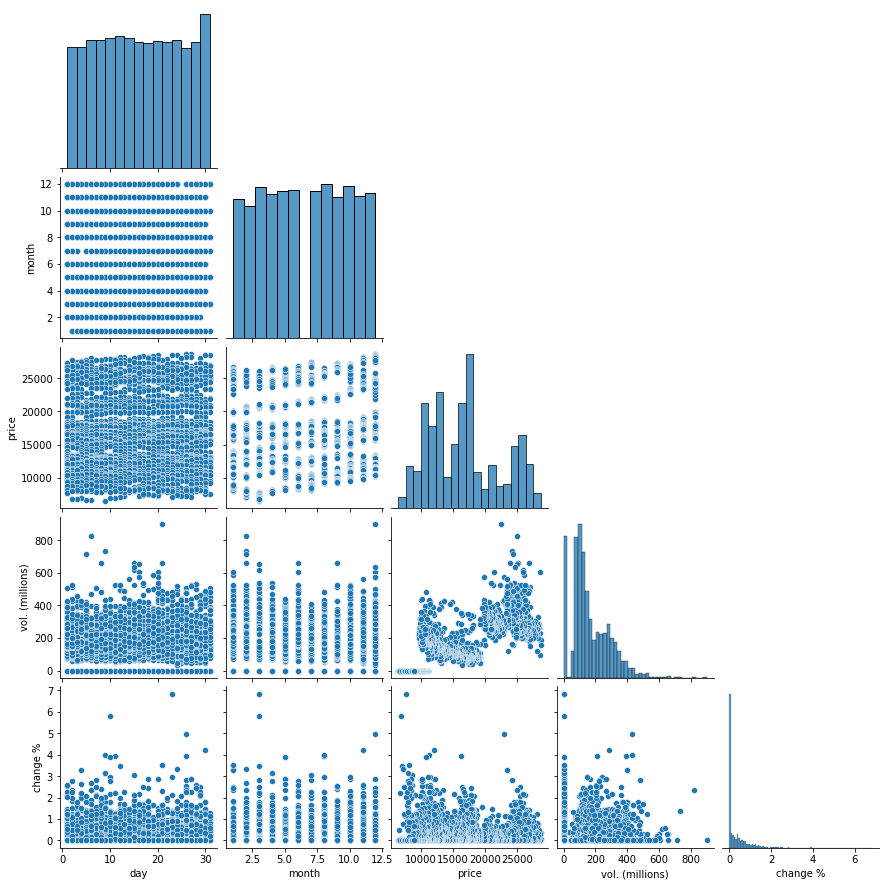

In [32]:
dow.drop(columns=['year', 'open', 'high', 'low'], inplace=True)
plt.figure(figsize=(20,20))
sns.pairplot(dow, corner=True)
plt.show()

In [33]:
gdp = pd.read_excel("data/EconomicData/gdpcounty1218.xlsx")
display(gdp.info())
display(gdp.isna().sum())
display(gdp)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12459 entries, 0 to 12458
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  12456 non-null  object
 1   Unnamed: 1  12453 non-null  object
 2   Unnamed: 2  12453 non-null  object
 3   Unnamed: 3  12453 non-null  object
 4   Unnamed: 4  12453 non-null  object
 5   Unnamed: 5  12455 non-null  object
 6   Unnamed: 6  12453 non-null  object
 7   Unnamed: 7  12453 non-null  object
 8   Unnamed: 8  12453 non-null  object
dtypes: object(9)
memory usage: 876.1+ KB


None

Unnamed: 0    3
Unnamed: 1    6
Unnamed: 2    6
Unnamed: 3    6
Unnamed: 4    6
Unnamed: 5    4
Unnamed: 6    6
Unnamed: 7    6
Unnamed: 8    6
dtype: int64

Unnamed: 0  Unnamed: 1  \
0                                                   FIPS  Countyname   
1                                                    NaN         NaN   
2                                                    NaN         NaN   
3                                                  01001     Autauga   
4                                                  01001     Autauga   
...                                                  ...         ...   
12454                                              56045      Weston   
12455                                                NaN         NaN   
12456           Source: U.S. Bureau of Economic Analysis         NaN   
12457  (D) Not shown to avoid disclosure of confident...         NaN   
12458  Note: Detail may not sum to higher-level aggre...         NaN   

      Unnamed: 2 Unnamed: 3                               Unnamed: 4  \
0         Postal   LineCode                             IndustryName   
1            NaN        NaN                                      NaN   
2            NaN        NaN                                      NaN   
3             AL          1                           All Industries   
4             AL          2       Private goods-producing industries   
...          ...        ...                                      ...   
12454         WY          4    Government and government enterprises   
12455        NaN        NaN                                      NaN   
12456        NaN        NaN                                      NaN   
12457        NaN        NaN                                      NaN   
12458        NaN        NaN                                      NaN   

                                   Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  
0      Gross domestic product (GDP) by county        NaN        NaN        NaN  
1                      (thousands of dollars)        NaN        NaN        NaN  
2                                        2012       2013       2014       2015  
3                                     1383941    1363368    1402516    1539406  
4                                      286396     310468     323582     346355  
...                                       ...        ...        ...        ...  
12454                                   54750      58758      59301      59461  
12455                                     NaN        NaN        NaN        NaN  
12456                                     NaN        NaN        NaN        NaN  
12457                                     NaN        NaN        NaN        NaN  
12458                                     NaN        NaN        NaN        NaN  

[12459 rows x 9 columns]

Also here we have multiple line header, and extra rows at the end. We will fix that

In [34]:
gdp = gdp.loc[3:12454]
gdp.columns = ['fips', 'county', 'postal', 'line_code', 'industry_name', 'gdp2012', 'gdp2013', 'gdp2014', 'gdp2015']
display(gdp.info())
display(gdp.isna().sum())
display(gdp)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12452 entries, 3 to 12454
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   fips           12452 non-null  object
 1   county         12452 non-null  object
 2   postal         12452 non-null  object
 3   line_code      12452 non-null  object
 4   industry_name  12452 non-null  object
 5   gdp2012        12452 non-null  object
 6   gdp2013        12452 non-null  object
 7   gdp2014        12452 non-null  object
 8   gdp2015        12452 non-null  object
dtypes: object(9)
memory usage: 875.7+ KB


None

fips             0
county           0
postal           0
line_code        0
industry_name    0
gdp2012          0
gdp2013          0
gdp2014          0
gdp2015          0
dtype: int64

fips    county postal line_code  \
3      01001   Autauga     AL         1   
4      01001   Autauga     AL         2   
5      01001   Autauga     AL         3   
6      01001   Autauga     AL         4   
7      01003   Baldwin     AL         1   
...      ...       ...    ...       ...   
12450  56043  Washakie     WY         4   
12451  56045    Weston     WY         1   
12452  56045    Weston     WY         2   
12453  56045    Weston     WY         3   
12454  56045    Weston     WY         4   

                                 industry_name  gdp2012  gdp2013  gdp2014  \
3                               All Industries  1383941  1363368  1402516   
4           Private goods-producing industries   286396   310468   323582   
5        Private services-providing industries   948490   904599   928438   
6        Government and government enterprises   149055   148301   150496   
7                               All Industries  5599194  6365080  6547396   
...                                        ...      ...      ...      ...   
12450    Government and government enterprises    62263    64489    65430   
12451                           All Industries   332472   306384   312816   
12452       Private goods-producing industries   181482   149558   148903   
12453    Private services-providing industries    96240    98069   104612   
12454    Government and government enterprises    54750    58758    59301   

       gdp2015  
3      1539406  
4       346355  
5      1037309  
6       155742  
7      6436107  
...        ...  
12450    65738  
12451   347555  
12452   175708  
12453   112386  
12454    59461  

[12452 rows x 9 columns]

In [35]:
gdps = gdp[['gdp2012', 'gdp2013', 'gdp2014', 'gdp2015']]
display(gdps)

gdp2012  gdp2013  gdp2014  gdp2015
3      1383941  1363368  1402516  1539406
4       286396   310468   323582   346355
5       948490   904599   928438  1037309
6       149055   148301   150496   155742
7      5599194  6365080  6547396  6436107
...        ...      ...      ...      ...
12450    62263    64489    65430    65738
12451   332472   306384   312816   347555
12452   181482   149558   148903   175708
12453    96240    98069   104612   112386
12454    54750    58758    59301    59461

[12452 rows x 4 columns]

In [37]:
gdps = gdps.replace({np.nan:0, ' ':0, '-':0, '(D)':0},regex=True).apply(pd.to_numeric,1)
display(gdps.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12452 entries, 3 to 12454
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   gdp2012  12452 non-null  int64
 1   gdp2013  12452 non-null  int64
 2   gdp2014  12452 non-null  int64
 3   gdp2015  12452 non-null  int64
dtypes: int64(4)
memory usage: 389.3 KB


None

In [38]:
gdp['fips'].unique()

array(['01001', '01003', '01005', ..., '56041', '56043', '56045'],
      dtype=object)

In [39]:
gdp['fips'] = pd.to_numeric(gdp['fips'])

In [40]:
gdp['line_code'] = pd.to_numeric(gdp['line_code'])

In [42]:
gdp = pd.concat([gdp[['fips','county','postal', 'line_code', 'industry_name']], gdps], axis = 1)
display(gdp.info())
display(gdp.isna().sum())
display(gdp)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12452 entries, 3 to 12454
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   fips           12452 non-null  int64 
 1   county         12452 non-null  object
 2   postal         12452 non-null  object
 3   line_code      12452 non-null  int64 
 4   industry_name  12452 non-null  object
 5   gdp2012        12452 non-null  int64 
 6   gdp2013        12452 non-null  int64 
 7   gdp2014        12452 non-null  int64 
 8   gdp2015        12452 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 875.7+ KB


None

fips             0
county           0
postal           0
line_code        0
industry_name    0
gdp2012          0
gdp2013          0
gdp2014          0
gdp2015          0
dtype: int64

fips    county postal  line_code  \
3       1001   Autauga     AL          1   
4       1001   Autauga     AL          2   
5       1001   Autauga     AL          3   
6       1001   Autauga     AL          4   
7       1003   Baldwin     AL          1   
...      ...       ...    ...        ...   
12450  56043  Washakie     WY          4   
12451  56045    Weston     WY          1   
12452  56045    Weston     WY          2   
12453  56045    Weston     WY          3   
12454  56045    Weston     WY          4   

                                 industry_name  gdp2012  gdp2013  gdp2014  \
3                               All Industries  1383941  1363368  1402516   
4           Private goods-producing industries   286396   310468   323582   
5        Private services-providing industries   948490   904599   928438   
6        Government and government enterprises   149055   148301   150496   
7                               All Industries  5599194  6365080  6547396   
...                                        ...      ...      ...      ...   
12450    Government and government enterprises    62263    64489    65430   
12451                           All Industries   332472   306384   312816   
12452       Private goods-producing industries   181482   149558   148903   
12453    Private services-providing industries    96240    98069   104612   
12454    Government and government enterprises    54750    58758    59301   

       gdp2015  
3      1539406  
4       346355  
5      1037309  
6       155742  
7      6436107  
...        ...  
12450    65738  
12451   347555  
12452   175708  
12453   112386  
12454    59461  

[12452 rows x 9 columns]

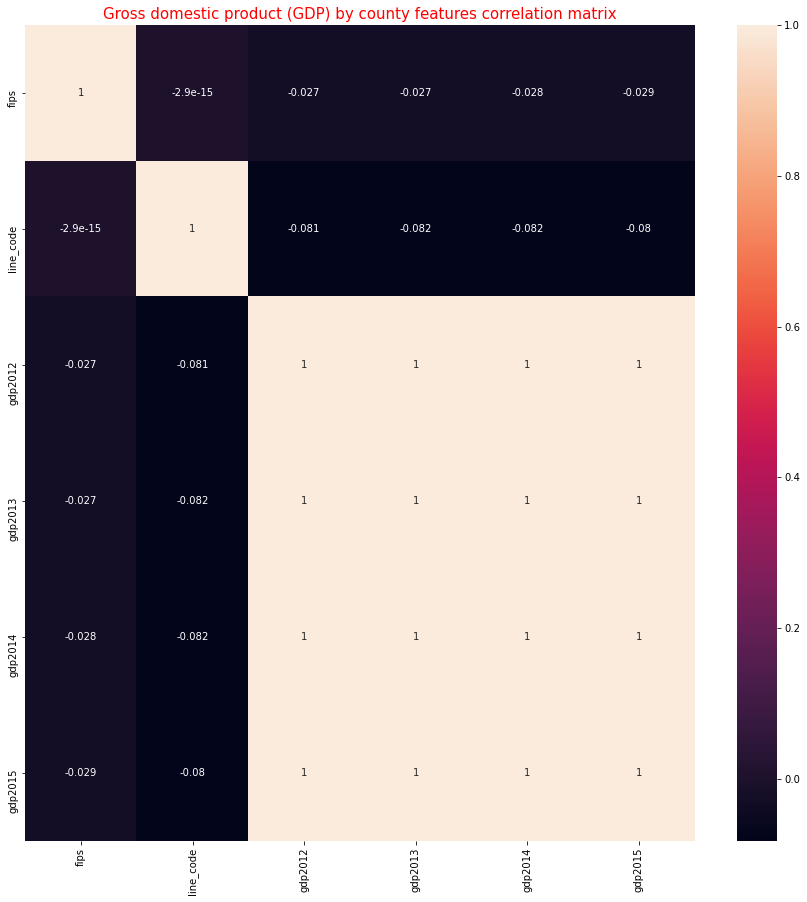

In [43]:
plt.figure(figsize=(15,15))
sns.heatmap(gdp.corr(), annot=True)
plt.title("Gross domestic product (GDP) by county features correlation matrix", fontsize=15, color='red')
plt.xticks(rotation = 90)
plt.show()

We notice that all the years included identaclly correlated, so we will drop all but gdp2015.

<Figure size 1440x1440 with 0 Axes>

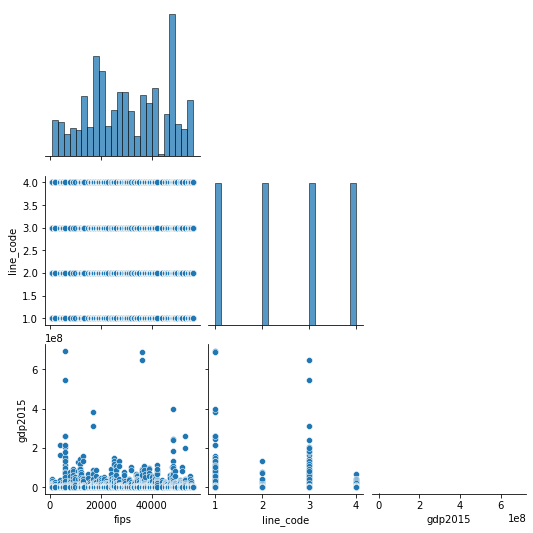

In [44]:
gdp.drop(columns=['gdp2012', 'gdp2013', 'gdp2014'], inplace=True)
plt.figure(figsize=(20,20))
sns.pairplot(gdp, corner=True)
plt.show()

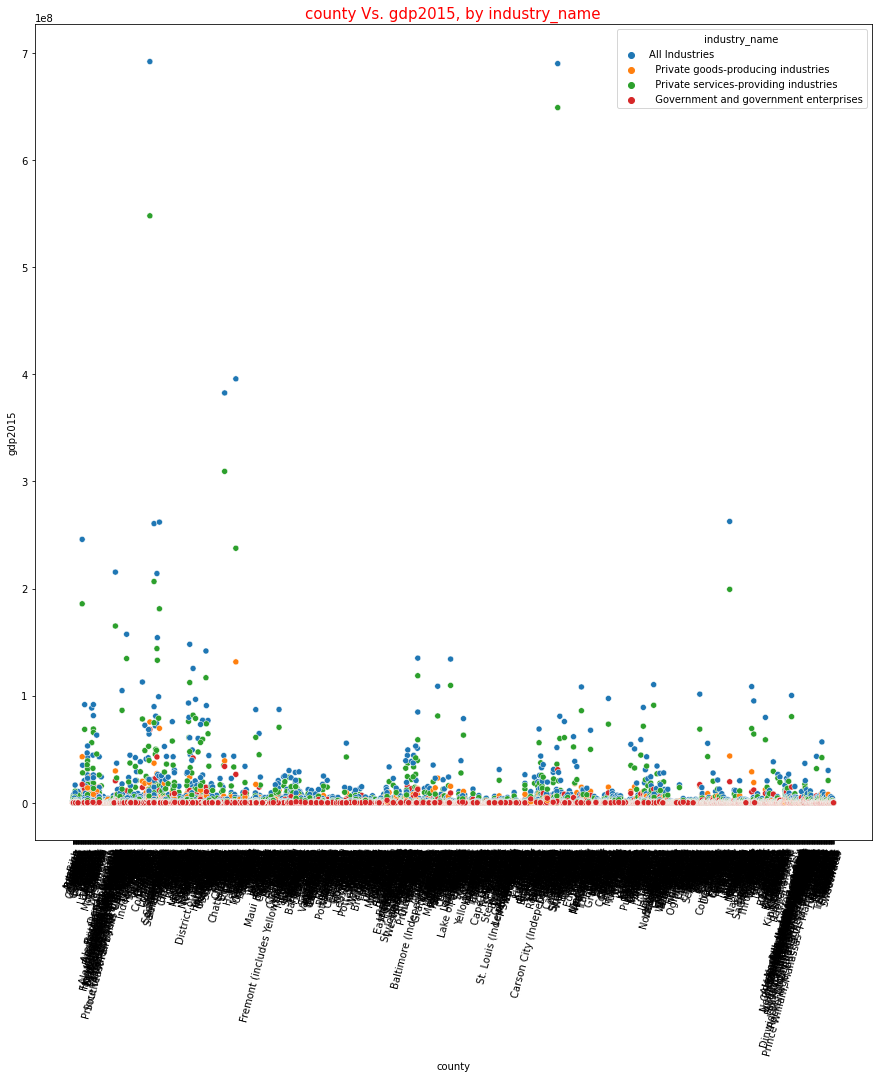

In [45]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=gdp, x='county', y='gdp2015', hue='industry_name')
plt.title("county Vs. gdp2015, by industry_name", fontsize=15, color='red')
plt.xticks(rotation = 75)
plt.show()

## GeneralDemographicData

In [51]:
complete = pd.read_csv("data/GeneralDemographicData/county_complete.csv")
display(complete.info())
display(complete.isna().sum())
display(complete)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Columns: 188 entries, fips to white_not_hispanic_2019
dtypes: float64(166), int64(18), object(4)
memory usage: 4.5+ MB


None

fips                       0
state                      0
name                       0
pop2000                    3
pop2010                    0
                          ..
uninsured_under_19_2019    0
uninsured_under_6_2019     0
veterans_2019              0
white_2019                 0
white_not_hispanic_2019    0
Length: 188, dtype: int64

fips    state               name   pop2000  pop2010   pop2011  \
0      1001  Alabama     Autauga County   43671.0    54571   55199.0   
1      1003  Alabama     Baldwin County  140415.0   182265  186534.0   
2      1005  Alabama     Barbour County   29038.0    27457   27351.0   
3      1007  Alabama        Bibb County   20826.0    22915   22745.0   
4      1009  Alabama      Blount County   51024.0    57322   57562.0   
...     ...      ...                ...       ...      ...       ...   
3137  56037  Wyoming  Sweetwater County   37613.0    43806   44013.0   
3138  56039  Wyoming       Teton County   18251.0    21294   21476.0   
3139  56041  Wyoming       Uinta County   19742.0    21118   20899.0   
3140  56043  Wyoming    Washakie County    8289.0     8533    8460.0   
3141  56045  Wyoming      Weston County    6644.0     7208    7141.0   

       pop2012   pop2013   pop2014   pop2015  ...  poverty_under_18_2019  \
0      54927.0   54695.0   54864.0   54838.0  ...                   23.2   
1     190048.0  194736.0  199064.0  202863.0  ...                   13.4   
2      27175.0   26947.0   26749.0   26264.0  ...                   50.1   
3      22658.0   22503.0   22533.0   22561.0  ...                    NaN   
4      57595.0   57623.0   57546.0   57590.0  ...                   18.4   
...        ...       ...       ...       ...  ...                    ...   
3137   45042.0   45145.0   44981.0   44732.0  ...                    NaN   
3138   21709.0   22326.0   22817.0   23029.0  ...                    NaN   
3139   20999.0   20960.0   20845.0   20780.0  ...                    NaN   
3140    8421.0    8427.0    8288.0    8296.0  ...                    NaN   
3141    7074.0    7136.0    7142.0    7181.0  ...                    NaN   

      two_plus_races_2019  unemployment_rate_2019  uninsured_2019  \
0                     2.2                     3.5             7.1   
1                     1.7                     4.0             8.9   
2                     1.2                     9.4            11.3   
3                     0.6                     7.0            10.7   
4                     1.6                     3.1            10.8   
...                   ...                     ...             ...   
3137                  2.3                     5.7            11.3   
3138                  0.7                     0.7            12.7   
3139                  3.5                     5.5            11.2   
3140                  3.8                     4.1            15.0   
3141                  1.3                     4.0            11.8   

      uninsured_65_and_older_2019  uninsured_under_19_2019  \
0                             0.0                      1.7   
1                             0.3                      3.8   
2                             0.3                      3.3   
3                             0.0                      2.0   
4                             0.2                      5.9   
...                           ...                      ...   
3137                          0.5                      9.2   
3138                          0.0                     10.1   
3139                          0.6                      6.8   
3140                          1.5                      7.0   
3141                          0.0                      8.6   

      uninsured_under_6_2019  veterans_2019  white_2019  \
0                        1.7           12.6        76.8   
1                        2.2           11.8        86.2   
2                        3.4            6.6        46.8   
3                        4.5            8.0        76.8   
4                        6.1            7.7        95.5   
...                      ...            ...         ...   
3137                    13.8            8.6        93.4   
3138                     5.9            5.3        89.3   
3139                     1.8            7.4        93.4   
3140                     7.8           11.9        89.7   
3141  

We can see that there are missing values, and that this dataframe has a lot of columns so we can impute the missing values with KNNImputer with n_neighbors= 30.

In order to do so, we have 4 string columns that we will seperate and save in side. Then we copy the numeric columns into seperate dataframe and fit the knn.

Lastly, we recreate the full dataframe by concating the two sepearted dataframes.


In [59]:
complete.replace({'-':''},regex=True, inplace=True)
complete['uninsured_age_under_6_2017'] = pd.to_numeric(complete['uninsured_age_under_6_2017'])
cpObject = complete.select_dtypes('object')
cpNumeric = complete.select_dtypes(exclude='object')
display(cpObject)
display(cpNumeric)

state               name smoking_ban_2010
0     Alabama     Autauga County             none
1     Alabama     Baldwin County             none
2     Alabama     Barbour County          partial
3     Alabama        Bibb County             none
4     Alabama      Blount County             none
...       ...                ...              ...
3137  Wyoming  Sweetwater County             none
3138  Wyoming       Teton County          partial
3139  Wyoming       Uinta County             none
3140  Wyoming    Washakie County             none
3141  Wyoming      Weston County             none

[3142 rows x 3 columns]

fips   pop2000  pop2010   pop2011   pop2012   pop2013   pop2014  \
0      1001   43671.0    54571   55199.0   54927.0   54695.0   54864.0   
1      1003  140415.0   182265  186534.0  190048.0  194736.0  199064.0   
2      1005   29038.0    27457   27351.0   27175.0   26947.0   26749.0   
3      1007   20826.0    22915   22745.0   22658.0   22503.0   22533.0   
4      1009   51024.0    57322   57562.0   57595.0   57623.0   57546.0   
...     ...       ...      ...       ...       ...       ...       ...   
3137  56037   37613.0    43806   44013.0   45042.0   45145.0   44981.0   
3138  56039   18251.0    21294   21476.0   21709.0   22326.0   22817.0   
3139  56041   19742.0    21118   20899.0   20999.0   20960.0   20845.0   
3140  56043    8289.0     8533    8460.0    8421.0    8427.0    8288.0   
3141  56045    6644.0     7208    7141.0    7074.0    7136.0    7142.0   

       pop2015   pop2016   pop2017  ...  poverty_under_18_2019  \
0      54838.0   55278.0   55504.0  ...                   23.2   
1     202863.0  207509.0  212628.0  ...                   13.4   
2      26264.0   25774.0   25270.0  ...                   50.1   
3      22561.0   22633.0   22668.0  ...                    NaN   
4      57590.0   57562.0   58013.0  ...                   18.4   
...        ...       ...       ...  ...                    ...   
3137   44732.0   44245.0   43534.0  ...                    NaN   
3138   23029.0   23180.0   23265.0  ...                    NaN   
3139   20780.0   20711.0   20495.0  ...                    NaN   
3140    8296.0    8188.0    8064.0  ...                    NaN   
3141    7181.0    7198.0    6927.0  ...                    NaN   

      two_plus_races_2019  unemployment_rate_2019  uninsured_2019  \
0                     2.2                     3.5             7.1   
1                     1.7                     4.0             8.9   
2                     1.2                     9.4            11.3   
3                     0.6                     7.0            10.7   
4                     1.6                     3.1            10.8   
...                   ...                     ...             ...   
3137                  2.3                     5.7            11.3   
3138                  0.7                     0.7            12.7   
3139                  3.5                     5.5            11.2   
3140                  3.8                     4.1            15.0   
3141                  1.3                     4.0            11.8   

      uninsured_65_and_older_2019  uninsured_under_19_2019  \
0                             0.0                      1.7   
1                             0.3                      3.8   
2                             0.3                      3.3   
3                             0.0                      2.0   
4                             0.2                      5.9   
...                           ...                      ...   
3137                          0.5                      9.2   
3138                          0.0                     10.1   
3139                          0.6                      6.8   
3140                          1.5                      7.0   
3141                          0.0                      8.6   

      uninsured_under_6_2019  veterans_2019  white_2019  \
0                        1.7           12.6        76.8   
1                        2.2           11.8        86.2   
2                        3.4            6.6        46.8   
3                        4.5            8.0        76.8   
4                        6.1            7.7        95.5   
...                      ...            ...         ...   
3137                    13.8            8.6        93.4   
3138                     5.9            5.3        89.3   
3139                     1.8            7.4        93.4   
3140                     7.8           11.9        89.7   
3141                     7.1           10.3        97.4   

      white_not_hispanic_2019  
0         

In [60]:
knn = KNNImputer(n_neighbors=30).fit(cpNumeric)
imputed = pd.DataFrame(knn.transform(cpNumeric), columns = cpNumeric.columns)
display(imputed)

fips   pop2000   pop2010   pop2011   pop2012   pop2013   pop2014  \
0      1001.0   43671.0   54571.0   55199.0   54927.0   54695.0   54864.0   
1      1003.0  140415.0  182265.0  186534.0  190048.0  194736.0  199064.0   
2      1005.0   29038.0   27457.0   27351.0   27175.0   26947.0   26749.0   
3      1007.0   20826.0   22915.0   22745.0   22658.0   22503.0   22533.0   
4      1009.0   51024.0   57322.0   57562.0   57595.0   57623.0   57546.0   
...       ...       ...       ...       ...       ...       ...       ...   
3137  56037.0   37613.0   43806.0   44013.0   45042.0   45145.0   44981.0   
3138  56039.0   18251.0   21294.0   21476.0   21709.0   22326.0   22817.0   
3139  56041.0   19742.0   21118.0   20899.0   20999.0   20960.0   20845.0   
3140  56043.0    8289.0    8533.0    8460.0    8421.0    8427.0    8288.0   
3141  56045.0    6644.0    7208.0    7141.0    7074.0    7136.0    7142.0   

       pop2015   pop2016   pop2017  ...  poverty_under_18_2019  \
0      54838.0   55278.0   55504.0  ...              23.200000   
1     202863.0  207509.0  212628.0  ...              13.400000   
2      26264.0   25774.0   25270.0  ...              50.100000   
3      22561.0   22633.0   22668.0  ...              34.113333   
4      57590.0   57562.0   58013.0  ...              18.400000   
...        ...       ...       ...  ...                    ...   
3137   44732.0   44245.0   43534.0  ...              20.110000   
3138   23029.0   23180.0   23265.0  ...              20.320000   
3139   20780.0   20711.0   20495.0  ...              25.250000   
3140    8296.0    8188.0    8064.0  ...              33.856667   
3141    7181.0    7198.0    6927.0  ...              34.710000   

      two_plus_races_2019  unemployment_rate_2019  uninsured_2019  \
0                     2.2                     3.5             7.1   
1                     1.7                     4.0             8.9   
2                     1.2                     9.4            11.3   
3                     0.6                     7.0            10.7   
4                     1.6                     3.1            10.8   
...                   ...                     ...             ...   
3137                  2.3                     5.7            11.3   
3138                  0.7                     0.7            12.7   
3139                  3.5                     5.5            11.2   
3140                  3.8                     4.1            15.0   
3141                  1.3                     4.0            11.8   

      uninsured_65_and_older_2019  uninsured_under_19_2019  \
0                             0.0                      1.7   
1                             0.3                      3.8   
2                             0.3                      3.3   
3                             0.0                      2.0   
4                             0.2                      5.9   
...                           ...                      ...   
3137                          0.5                      9.2   
3138                          0.0                     10.1   
3139                          0.6                      6.8   
3140                          1.5                      7.0   
3141                          0.0                      8.6   

      uninsured_under_6_2019  veterans_2019  white_2019  \
0                        1.7           12.6        76.8   
1                        2.2           11.8        86.2   
2                        3.4            6.6        46.8   
3                        4.5            8.0        76.8   
4                        6.1            7.7        95.5   
...                      ...            ...         ...   
3137                    13.8            8.6        93.4   
3138                     5.9            5.3        89.3   
3139                     1.8            7.4        93.4   
3140                     7.8           11.9        89.7   
3141                     7.1           10.3        97.4   

      wh

In [61]:
complete = pd.concat([cpObject, imputed], axis=1)
display(complete.info())
display(complete.isna().sum())
display(complete)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Columns: 188 entries, state to white_not_hispanic_2019
dtypes: float64(185), object(3)
memory usage: 4.5+ MB


None

state                       0
name                        0
smoking_ban_2010           26
fips                        0
pop2000                     0
                           ..
uninsured_under_19_2019     0
uninsured_under_6_2019      0
veterans_2019               0
white_2019                  0
white_not_hispanic_2019     0
Length: 188, dtype: int64

state               name smoking_ban_2010     fips   pop2000  \
0     Alabama     Autauga County             none   1001.0   43671.0   
1     Alabama     Baldwin County             none   1003.0  140415.0   
2     Alabama     Barbour County          partial   1005.0   29038.0   
3     Alabama        Bibb County             none   1007.0   20826.0   
4     Alabama      Blount County             none   1009.0   51024.0   
...       ...                ...              ...      ...       ...   
3137  Wyoming  Sweetwater County             none  56037.0   37613.0   
3138  Wyoming       Teton County          partial  56039.0   18251.0   
3139  Wyoming       Uinta County             none  56041.0   19742.0   
3140  Wyoming    Washakie County             none  56043.0    8289.0   
3141  Wyoming      Weston County             none  56045.0    6644.0   

       pop2010   pop2011   pop2012   pop2013   pop2014  ...  \
0      54571.0   55199.0   54927.0   54695.0   54864.0  ...   
1     182265.0  186534.0  190048.0  194736.0  199064.0  ...   
2      27457.0   27351.0   27175.0   26947.0   26749.0  ...   
3      22915.0   22745.0   22658.0   22503.0   22533.0  ...   
4      57322.0   57562.0   57595.0   57623.0   57546.0  ...   
...        ...       ...       ...       ...       ...  ...   
3137   43806.0   44013.0   45042.0   45145.0   44981.0  ...   
3138   21294.0   21476.0   21709.0   22326.0   22817.0  ...   
3139   21118.0   20899.0   20999.0   20960.0   20845.0  ...   
3140    8533.0    8460.0    8421.0    8427.0    8288.0  ...   
3141    7208.0    7141.0    7074.0    7136.0    7142.0  ...   

      poverty_under_18_2019  two_plus_races_2019  unemployment_rate_2019  \
0                 23.200000                  2.2                     3.5   
1                 13.400000                  1.7                     4.0   
2                 50.100000                  1.2                     9.4   
3                 34.113333                  0.6                     7.0   
4                 18.400000                  1.6                     3.1   
...                     ...                  ...                     ...   
3137              20.110000                  2.3                     5.7   
3138              20.320000                  0.7                     0.7   
3139              25.250000                  3.5                     5.5   
3140              33.856667                  3.8                     4.1   
3141              34.710000                  1.3                     4.0   

      uninsured_2019  uninsured_65_and_older_2019  uninsured_under_19_2019  \
0                7.1                          0.0                      1.7   
1                8.9                          0.3                      3.8   
2               11.3                          0.3                      3.3   
3               10.7                          0.0                      2.0   
4               10.8                          0.2                      5.9   
...              ...                          ...                      ...   
3137            11.3                          0.5                      9.2   
3138            12.7                          0.0                     10.1   
3139            11.2                          0.6                      6.8   
3140            15.0                          1.5                      7.0   
3141            11.8                          0.0                      8.6   

      uninsured_under_6_2019  veterans_2019  white_2019  \
0                        1.7           12.6        76.8   
1                        2.2           11.8        86.2   
2                        3.4            6.6        46.8   
3                        4.5            8.0        76.8   
4                        6.1            7.7        95.5   
...                      ...            ...         ...   
3137                    13.8            8.6        93.4   
3138                     5.9            5.3        89.3   
3139 

In [62]:
complete['smoking_ban_2010'].unique()

array(['none', 'partial', 'comprehensive', nan], dtype=object)

In [63]:
complete.replace(np.nan, 'none', inplace=True)
display(complete.isna().sum())

state                      0
name                       0
smoking_ban_2010           0
fips                       0
pop2000                    0
                          ..
uninsured_under_19_2019    0
uninsured_under_6_2019     0
veterans_2019              0
white_2019                 0
white_not_hispanic_2019    0
Length: 188, dtype: int64

In [64]:
# lower case string values
complete = complete.applymap(lambda s: s.lower() if type(s)==str else s)
display(complete.sample(20))

state              name smoking_ban_2010     fips   pop2000  \
1465     mississippi      smith county             none  28129.0   16182.0   
116         arkansas    bradley county             none   5011.0   12600.0   
1102        kentucky       todd county    comprehensive  21219.0   11971.0   
1918  north carolina   davidson county             none  37057.0  147246.0   
107          arizona      pinal county    comprehensive   4021.0  179727.0   
273         colorado    jackson county    comprehensive   8057.0    1577.0   
2968      washington  jefferson county             none  53031.0   25953.0   
725          indiana   hamilton county             none  18057.0  182740.0   
2442       tennessee      cocke county             none  47029.0   33565.0   
260         colorado     denver county          partial   8031.0  554636.0   
2982      washington   skamania county    comprehensive  53059.0    9872.0   
1113       louisiana     acadia parish          partial  22001.0   58861.0   
1839        new york   cortland county    comprehensive  36023.0   48599.0   
394          georgia     bartow county             none  13015.0   76019.0   
2805            utah      weber county          partial  49057.0  196533.0   
764          indiana   randolph county             none  18135.0   27401.0   
2215          oregon      curry county             none  41015.0   21137.0   
1295        michigan     ogemaw county             none  26129.0   21645.0   
1947  north carolina    madison county    comprehensive  37115.0   19635.0   
885             iowa   woodbury county    comprehensive  19193.0  103877.0   

       pop2010   pop2011   pop2012   pop2013   pop2014  ...  \
1465   16491.0   16531.0   16342.0   16233.0   16211.0  ...   
116    11508.0   11425.0   11262.0   11120.0   11007.0  ...   
1102   12460.0   12410.0   12597.0   12450.0   12409.0  ...   
1918  162878.0  162972.0  163112.0  163398.0  163530.0  ...   
107   375770.0  378226.0  381910.0  384258.0  394004.0  ...   
273     1394.0    1358.0    1326.0    1337.0    1385.0  ...   
2968   29872.0   29835.0   29782.0   29990.0   30135.0  ...   
725   274569.0  283273.0  289599.0  296789.0  302828.0  ...   
2442   35662.0   35401.0   35455.0   35325.0   35201.0  ...   
260   600158.0  619356.0  633798.0  648049.0  663271.0  ...   
2982   11066.0   11150.0   11198.0   11308.0   11376.0  ...   
1113   61773.0   61826.0   61984.0   62284.0   62664.0  ...   
1839   49336.0   49373.0   49024.0   48912.0   48742.0  ...   
394   100157.0  100213.0  100365.0  101056.0  101397.0  ...   
2805  231236.0  233890.0  236342.0  238222.0  240219.0  ...   
764    26171.0   26021.0   25848.0   25610.0   25313.0  ...   
2215   22364.0   22477.0   22249.0   22217.0   22130.0  ...   
1295   21699.0   21495.0   21365.0   21167.0   20961.0  ...   
1947   20764.0   20853.0   20902.0   21171.0   21219.0  ...   
885   102172.0  102622.0  102290.0  102195.0  102200.0  ...   

      poverty_under_18_2019  two_plus_races_2019  unemployment_rate_2019  \
1465              34.476667                  0.4                     4.2   
116               33.200000                  0.2                     7.5   
1102              35.673333                  1.6                     6.7   
1918              23.600000                  1.8                     5.7   
107               17.500000                  4.2                     6.4   
273               35.460000                  0.4                     2.0   
2968              28.290000                  3.8                     5.5   
725                5.300000                  2.4                     2.4   
2442              40.000000                  2.1                     8.5   
260               18.200000                  3.8                     3.6   
2982              33.906667                  2.3                     4.2   
1113              35.600000                  2.8                     7.3   
1839              18.200000                  1.9                

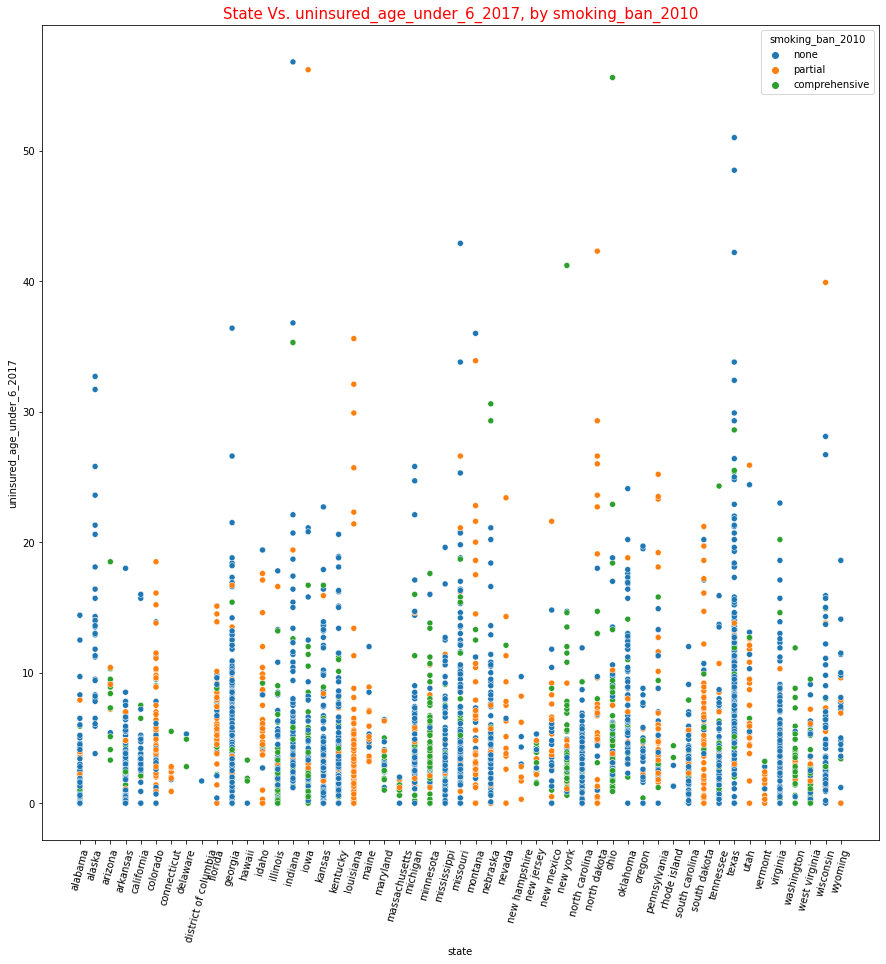

In [65]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=complete, x='state', y='uninsured_age_under_6_2017', hue='smoking_ban_2010')
plt.title("State Vs. uninsured_age_under_6_2017, by smoking_ban_2010", fontsize=15, color='red')
plt.xticks(rotation = 75)
plt.show()

## LifeExpectancyData

In [66]:
life = pd.read_excel("data/LifeExpectancyData/IHME_USA_LIFE_EXPECTANCY_1987_2007_Y2011M06D16.XLSX")
display(life.info())
display(life.isna().sum())
display(life)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66087 entries, 0 to 66086
Data columns (total 24 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   fips                                                          66087 non-null  int64  
 1   State                                                         66087 non-null  object 
 2   County                                                        66087 non-null  object 
 3   Year                                                          66087 non-null  int64  
 4   Male life expectancy (years)                                  66087 non-null  float64
 5   Years behind international frontier (male)                    66087 non-null  object 
 6   Female life expectancy (years)                                66087 non-null  float64
 7   Years behind international frontier (female)                  66087

None

fips                                                                0
State                                                               0
County                                                              0
Year                                                                0
Male life expectancy (years)                                        0
Years behind international frontier (male)                          0
Female life expectancy (years)                                      0
Years behind international frontier (female)                        0
White male life expectancy (years)                                  0
White female life expectancy (years)                                0
Black male life expectancy (years)                              50593
Black female life expectancy (years)                            47725
Closest ranked countries for male life expectancy (higher)         96
Closest ranked countries for female life expectancy (higher)       11
Closest ranked count

fips    State   County  Year  Male life expectancy (years)  \
0       1001  ALABAMA  AUTAUGA  1987                          69.2   
1       1001  ALABAMA  AUTAUGA  1988                          69.3   
2       1001  ALABAMA  AUTAUGA  1989                          69.8   
3       1001  ALABAMA  AUTAUGA  1990                          69.7   
4       1001  ALABAMA  AUTAUGA  1991                          70.0   
...      ...      ...      ...   ...                           ...   
66082  56045  WYOMING   WESTON  2003                          75.0   
66083  56045  WYOMING   WESTON  2004                          75.4   
66084  56045  WYOMING   WESTON  2005                          75.4   
66085  56045  WYOMING   WESTON  2006                          75.6   
66086  56045  WYOMING   WESTON  2007                          75.9   

      Years behind international frontier (male)  \
0                                             32   
1                                             32   
2                                             25   
3                                             27   
4                                             25   
...                                          ...   
66082                                         12   
66083                                         11   
66084                                         12   
66085                                         12   
66086                                         12   

       Female life expectancy (years)  \
0                                77.4   
1                                77.3   
2                                77.5   
3                                77.7   
4                                77.7   
...                               ...   
66082                            80.5   
66083                            80.6   
66084                            80.7   
66085                            81.1   
66086                            81.5   

      Years behind international frontier (female)  \
0                                               12   
1                                               14   
2                                               14   
3                                               14   
4                                               15   
...                                            ...   
66082                                           14   
66083                                           15   
66084                                           15   
66085                                           14   
66086                                           13   

       White male life expectancy (years)  \
0                                    70.3   
1                                    70.5   
2                                    71.0   
3                                    71.0   
4                                    71.2   
...                                   ...   
66082                                74.9   
66083                                75.4   
66084                                75.4   
66085                                75.6   
66086                                75.9   

       White female life expectancy (years)  ...  \
0                                      78.5  ...   
1                                      78.4  ...   
2                                      78.6  ...   
3                                      78.7  ...   
4                                      78.8  ...   
...                                     ...  ...   
66082                                  80.5  ...   
66083                                  80.5  ...   
66084                                  80.7  ...   
66085                                  81.1  ...   
66086                                  81.5  ...   

       Closest ranked countries for male life expectancy (lower)  \
0      Albania,Bahrain,Guam,Jamaica,Macedonia, the Fo...           
1      Albania,Jamaica,Macedonia, the Former Yugoslav...           
2      Albania,Bahrain,Guam,Ma

In [68]:
lifemissings = life[['Black male life expectancy (years)', 'Black female life expectancy (years)', 'Closest ranked countries for male life expectancy (higher)', 'Closest ranked countries for female life expectancy (higher)']]
display(lifemissings)

Black male life expectancy (years)  \
0                                     NaN   
1                                    64.3   
2                                    64.7   
3                                    64.4   
4                                    64.5   
...                                   ...   
66082                                 NaN   
66083                                 NaN   
66084                                 NaN   
66085                                 NaN   
66086                                 NaN   

       Black female life expectancy (years)  \
0                                      73.4   
1                                      73.3   
2                                      73.5   
3                                      73.6   
4                                      73.5   
...                                     ...   
66082                                   NaN   
66083                                   NaN   
66084                                   NaN   
66085                                   NaN   
66086                                   NaN   

      Closest ranked countries for male life expectancy (higher)  \
0      Chile,Guadeloupe,Panama,United Arab Emirates,V...           
1         Bahrain,Chile,Guam,Panama,United Arab Emirates           
2      Belize,Chile,Portugal,Puerto Rico,United Arab ...           
3                  Bahrain,Belize,Chile,Guam,Puerto Rico           
4                     Bahrain,Belize,Chile,Guam,Portugal           
...                                                  ...           
66082  Belgium,Denmark,Guadeloupe,Luxembourg,Virgin I...           
66083          Belgium,Cuba,Kuwait,Luxembourg,Martinique           
66084  Denmark,Finland,Guadeloupe,Kuwait,Virgin Islan...           
66085  Denmark,Finland,Guadeloupe,Kuwait,Virgin Islan...           
66086       Costa Rica,Denmark,Finland,Guadeloupe,Kuwait           

      Closest ranked countries for female life expectancy (higher)  
0      Austria,Costa Rica,Netherlands Antilles,New Ze...            
1      Guadeloupe,Ireland,Israel,Malta,Netherlands An...            
2      Ireland,Israel,Malta,Netherlands Antilles,Port...            
3              Costa Rica,Denmark,Ireland,Malta,Portugal            
4                  Denmark,Ireland,Malta,Mayotte,Reunion            
...                                                  ...            
66082  Costa Rica,Ireland,Slovenia,United Kingdom,Uni...            
66083   Costa Rica,Greece,Ireland,Slovenia,United States            
66084  Channel Islands,Costa Rica,Greece,Malta,United...            
66085  Channel Islands,Costa Rica,Malta,United Kingdo...            
66086  Chile,Netherlands,Portugal,Slovenia,Virgin Isl...            

[66087 rows x 4 columns]

In [71]:
for col in lifemissings.columns:
    if col == 'Closest ranked countries for male life expectancy (higher)' or col == 'Closest ranked countries for femmale life expectancy (higher)':
        lifemissings[col].replace(np.nan, 'none', inplace = True)
    else :
        lifemissings[col].replace(np.nan,0,inplace=True)
display(lifemissings.info())
display(lifemissings)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66087 entries, 0 to 66086
Data columns (total 4 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Black male life expectancy (years)                            66087 non-null  float64
 1   Black female life expectancy (years)                          66087 non-null  float64
 2   Closest ranked countries for male life expectancy (higher)    66087 non-null  object 
 3   Closest ranked countries for female life expectancy (higher)  66087 non-null  object 
dtypes: float64(2), object(2)
memory usage: 2.0+ MB


None

Black male life expectancy (years)  \
0                                     0.0   
1                                    64.3   
2                                    64.7   
3                                    64.4   
4                                    64.5   
...                                   ...   
66082                                 0.0   
66083                                 0.0   
66084                                 0.0   
66085                                 0.0   
66086                                 0.0   

       Black female life expectancy (years)  \
0                                      73.4   
1                                      73.3   
2                                      73.5   
3                                      73.6   
4                                      73.5   
...                                     ...   
66082                                   0.0   
66083                                   0.0   
66084                                   0.0   
66085                                   0.0   
66086                                   0.0   

      Closest ranked countries for male life expectancy (higher)  \
0      Chile,Guadeloupe,Panama,United Arab Emirates,V...           
1         Bahrain,Chile,Guam,Panama,United Arab Emirates           
2      Belize,Chile,Portugal,Puerto Rico,United Arab ...           
3                  Bahrain,Belize,Chile,Guam,Puerto Rico           
4                     Bahrain,Belize,Chile,Guam,Portugal           
...                                                  ...           
66082  Belgium,Denmark,Guadeloupe,Luxembourg,Virgin I...           
66083          Belgium,Cuba,Kuwait,Luxembourg,Martinique           
66084  Denmark,Finland,Guadeloupe,Kuwait,Virgin Islan...           
66085  Denmark,Finland,Guadeloupe,Kuwait,Virgin Islan...           
66086       Costa Rica,Denmark,Finland,Guadeloupe,Kuwait           

      Closest ranked countries for female life expectancy (higher)  
0      Austria,Costa Rica,Netherlands Antilles,New Ze...            
1      Guadeloupe,Ireland,Israel,Malta,Netherlands An...            
2      Ireland,Israel,Malta,Netherlands Antilles,Port...            
3              Costa Rica,Denmark,Ireland,Malta,Portugal            
4                  Denmark,Ireland,Malta,Mayotte,Reunion            
...                                                  ...            
66082  Costa Rica,Ireland,Slovenia,United Kingdom,Uni...            
66083   Costa Rica,Greece,Ireland,Slovenia,United States            
66084  Channel Islands,Costa Rica,Greece,Malta,United...            
66085  Channel Islands,Costa Rica,Malta,United Kingdo...            
66086  Chile,Netherlands,Portugal,Slovenia,Virgin Isl...            

[66087 rows x 4 columns]

In [72]:
lifemissings.isna().sum()

Black male life expectancy (years)                              0
Black female life expectancy (years)                            0
Closest ranked countries for male life expectancy (higher)      0
Closest ranked countries for female life expectancy (higher)    0
dtype: int64

In [74]:
for col in life.columns:
    if col in (lifemissings.columns):
        life[col] = lifemissings[col]
display(life.info())
display(life.isna().sum())
display(life.sample(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66087 entries, 0 to 66086
Data columns (total 24 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   fips                                                          66087 non-null  int64  
 1   State                                                         66087 non-null  object 
 2   County                                                        66087 non-null  object 
 3   Year                                                          66087 non-null  int64  
 4   Male life expectancy (years)                                  66087 non-null  float64
 5   Years behind international frontier (male)                    66087 non-null  object 
 6   Female life expectancy (years)                                66087 non-null  float64
 7   Years behind international frontier (female)                  66087

None

fips                                                            0
State                                                           0
County                                                          0
Year                                                            0
Male life expectancy (years)                                    0
Years behind international frontier (male)                      0
Female life expectancy (years)                                  0
Years behind international frontier (female)                    0
White male life expectancy (years)                              0
White female life expectancy (years)                            0
Black male life expectancy (years)                              0
Black female life expectancy (years)                            0
Closest ranked countries for male life expectancy (higher)      0
Closest ranked countries for female life expectancy (higher)    0
Closest ranked countries for male life expectancy (lower)       0
Closest ra

fips           State           County  Year  \
65515  55133       WISCONSIN         WAUKESHA  2003   
17124  19051            IOWA            DAVIS  1996   
43381  39041            OHIO         DELAWARE  2003   
5298    8014        COLORADO       BROOMFIELD  1993   
29935  28047     MISSISSIPPI         HARRISON  1997   
56071  48291           TEXAS          LIBERTY  1988   
2028    2290          ALASKA    YUKON-KOYUKUK  1999   
61201  51195        VIRGINIA             WISE  1994   
54735  48163           TEXAS             FRIO  1996   
49247  45055  SOUTH CAROLINA          KERSHAW  1989   
27554  26161        MICHIGAN        WASHTENAW  1989   
27321  26139        MICHIGAN           OTTAWA  1987   
388     1037         ALABAMA            COOSA  1997   
27477  26153        MICHIGAN      SCHOOLCRAFT  1996   
29434  27173       MINNESOTA  YELLOW MEDICINE  2000   
16518  18177         INDIANA            WAYNE  1999   
42588  38073    NORTH DAKOTA           RANSOM  1987   
61515  51610        VIRGINIA     FALLS CHURCH  1993   
54722  48161           TEXAS        FREESTONE  2004   
13512  17095        ILLINOIS             KNOX  1996   

       Male life expectancy (years)  \
65515                          77.8   
17124                          73.3   
43381                          76.7   
5298                           75.1   
29935                          70.5   
56071                          68.6   
2028                           74.3   
61201                          69.5   
54735                          70.3   
49247                          69.6   
27554                          73.5   
27321                          73.7   
388                            70.4   
27477                          73.1   
29434                          74.8   
16518                          73.1   
42588                          72.5   
61515                          74.1   
54722                          73.0   
13512                          73.4   

      Years behind international frontier (male)  \
65515                                          1   
17124                                         13   
43381                                          5   
5298                                           1   
29935                                         27   
56071                                         36   
2028                                          11   
61201                                         35   
54735                                         27   
49247                                         29   
27554                                          5   
27321                                          2   
388                                           27   
27477                                         14   
29434                                         10   
16518                                         17   
42588                                          8   
61515                                          6   
54722                                         22   
13512                                         12   

       Female life expectancy (years)  \
65515                            81.7   
17124                            80.2   
43381                            80.8   
5298                             80.6   
29935                            77.4   
56071                            77.2   
2028                             79.6   
61201                            77.8   
54735                            78.3   
49247                            77.9   
27554                            79.1   
27321                            80.1   
388                              78.1   
27477                            79.2   
29434                            81.4   
16518                            78.9   
42588                            79.9   
61515                            80.4   
54722                            78.7   
13512                            79.7   

      Years behind international frontier (female)  \
65515                  

In [75]:
life.columns = life.columns.str.lower()
life = life.applymap(lambda s : s.lower() if type(s)==str else s)
life

fips    state   county  year  male life expectancy (years)  \
0       1001  alabama  autauga  1987                          69.2   
1       1001  alabama  autauga  1988                          69.3   
2       1001  alabama  autauga  1989                          69.8   
3       1001  alabama  autauga  1990                          69.7   
4       1001  alabama  autauga  1991                          70.0   
...      ...      ...      ...   ...                           ...   
66082  56045  wyoming   weston  2003                          75.0   
66083  56045  wyoming   weston  2004                          75.4   
66084  56045  wyoming   weston  2005                          75.4   
66085  56045  wyoming   weston  2006                          75.6   
66086  56045  wyoming   weston  2007                          75.9   

      years behind international frontier (male)  \
0                                             32   
1                                             32   
2                                             25   
3                                             27   
4                                             25   
...                                          ...   
66082                                         12   
66083                                         11   
66084                                         12   
66085                                         12   
66086                                         12   

       female life expectancy (years)  \
0                                77.4   
1                                77.3   
2                                77.5   
3                                77.7   
4                                77.7   
...                               ...   
66082                            80.5   
66083                            80.6   
66084                            80.7   
66085                            81.1   
66086                            81.5   

      years behind international frontier (female)  \
0                                               12   
1                                               14   
2                                               14   
3                                               14   
4                                               15   
...                                            ...   
66082                                           14   
66083                                           15   
66084                                           15   
66085                                           14   
66086                                           13   

       white male life expectancy (years)  \
0                                    70.3   
1                                    70.5   
2                                    71.0   
3                                    71.0   
4                                    71.2   
...                                   ...   
66082                                74.9   
66083                                75.4   
66084                                75.4   
66085                                75.6   
66086                                75.9   

       white female life expectancy (years)  ...  \
0                                      78.5  ...   
1                                      78.4  ...   
2                                      78.6  ...   
3                                      78.7  ...   
4                                      78.8  ...   
...                                     ...  ...   
66082                                  80.5  ...   
66083                                  80.5  ...   
66084                                  80.7  ...   
66085                                  81.1  ...   
66086                                  81.5  ...   

       closest ranked countries for male life expectancy (lower)  \
0      albania,bahrain,guam,jamaica,macedonia, the fo...           
1      albania,jamaica,macedonia, the former yugoslav...           
2      albania,bahrain,guam,ma

In [77]:
aggregated = life.groupby(['county', 'year']).mean()
aggregated

fips  male life expectancy (years)  \
county    year                                          
abbeville 1987  45001.0                          68.7   
          1988  45001.0                          68.7   
          1989  45001.0                          68.8   
          1990  45001.0                          68.8   
          1991  45001.0                          69.3   
...                 ...                           ...   
ziebach   2003  46137.0                          73.2   
          2004  46137.0                          73.2   
          2005  46137.0                          72.9   
          2006  46137.0                          72.6   
          2007  46137.0                          72.9   

                female life expectancy (years)  \
county    year                                   
abbeville 1987                            76.9   
          1988                            77.0   
          1989                            77.1   
          1990                            77.1   
          1991                            77.1   
...                                        ...   
ziebach   2003                            80.0   
          2004                            79.9   
          2005                            80.1   
          2006                            79.8   
          2007                            79.9   

                white male life expectancy (years)  \
county    year                                       
abbeville 1987                                70.9   
          1988                                71.0   
          1989                                71.2   
          1990                                71.2   
          1991                                71.8   
...                                            ...   
ziebach   2003                                71.4   
          2004                                71.3   
          2005                                70.9   
          2006                                70.6   
          2007                                70.7   

                white female life expectancy (years)  \
county    year                                         
abbeville 1987                                  78.9   
          1988                                  79.0   
          1989                                  79.1   
          1990                                  79.2   
          1991                                  79.2   
...                                              ...   
ziebach   2003                                  78.7   
          2004                                  78.6   
          2005                                  78.7   
          2006                                  78.4   
          2007                                  78.4   

                black male life expectancy (years)  \
county    year                                       
abbeville 1987                                64.8   
          1988                                64.8   
          1989                                64.8   
          1990                                64.7   
          1991                                65.2   
...                                            ...   
ziebach   2003                                 0.0   
          2004                                 0.0   
          2005                                 0.0   
          2006                                 0.0   
          2007                                 0.0   

                black female life expectancy (years)  rank (male)  \
county    year                                                      
abbeville 1987                                  73.5       2805.0   
          1988                                  73.6       2803.0   
          1989                                  73.6       2818.0   
          1990                                  73.6       2836.0   
          1991                                  73.7       2710.0   
...     

## USElectionResults19762020

In [79]:
house = pd.read_csv("data/USElectionResults19762020/1976-2020-house.csv")
display(house.info())
display(house.isna().sum())
display(house)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31103 entries, 0 to 31102
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            31103 non-null  int64 
 1   state           31103 non-null  object
 2   state_po        31103 non-null  object
 3   state_fips      31103 non-null  int64 
 4   state_cen       31103 non-null  int64 
 5   state_ic        31103 non-null  int64 
 6   office          31103 non-null  object
 7   district        31103 non-null  int64 
 8   stage           31103 non-null  object
 9   runoff          22447 non-null  object
 10  special         31103 non-null  bool  
 11  candidate       31103 non-null  object
 12  party           27483 non-null  object
 13  writein         31103 non-null  bool  
 14  mode            31103 non-null  object
 15  candidatevotes  31103 non-null  int64 
 16  totalvotes      31103 non-null  int64 
 17  unofficial      31103 non-null  bool  
 18  versio

None

year                 0
state                0
state_po             0
state_fips           0
state_cen            0
state_ic             0
office               0
district             0
stage                0
runoff            8656
special              0
candidate            0
party             3620
writein              0
mode                 0
candidatevotes       0
totalvotes           0
unofficial           0
version              0
fusion_ticket        0
dtype: int64

year    state state_po  state_fips  state_cen  state_ic    office  \
0      1976  ALABAMA       AL           1         63        41  US HOUSE   
1      1976  ALABAMA       AL           1         63        41  US HOUSE   
2      1976  ALABAMA       AL           1         63        41  US HOUSE   
3      1976  ALABAMA       AL           1         63        41  US HOUSE   
4      1976  ALABAMA       AL           1         63        41  US HOUSE   
...     ...      ...      ...         ...        ...       ...       ...   
31098  2020  WYOMING       WY          56         83        68  US HOUSE   
31099  2020  WYOMING       WY          56         83        68  US HOUSE   
31100  2020  WYOMING       WY          56         83        68  US HOUSE   
31101  2020  WYOMING       WY          56         83        68  US HOUSE   
31102  2020  WYOMING       WY          56         83        68  US HOUSE   

       district stage runoff  special                   candidate  \
0             1   GEN  False    False              BILL DAVENPORT   
1             1   GEN  False    False                JACK EDWARDS   
2             1   GEN  False    False                     WRITEIN   
3             2   GEN  False    False             J CAROLE KEAHEY   
4             2   GEN  False    False  WILLIAM L "BILL" DICKINSON   
...         ...   ...    ...      ...                         ...   
31098         0   GEN  False    False          LYNNETTE GREY BULL   
31099         0   GEN  False    False                   OVERVOTES   
31100         0   GEN  False    False            RICHARD BRUBAKER   
31101         0   GEN  False    False                  UNDERVOTES   
31102         0   GEN  False    False                     WRITEIN   

             party  writein   mode  candidatevotes  totalvotes  unofficial  \
0         DEMOCRAT    False  TOTAL           58906      157170       False   
1       REPUBLICAN    False  TOTAL           98257      157170       False   
2              NaN     True  TOTAL               7      157170       False   
3         DEMOCRAT    False  TOTAL           66288      156362       False   
4       REPUBLICAN    False  TOTAL           90069      156362       False   
...            ...      ...    ...             ...         ...         ...   
31098     DEMOCRAT    False  TOTAL           66576      278503       False   
31099          NaN    False  TOTAL            1274      278503       False   
31100  LIBERTARIAN    False  TOTAL           10154      278503       False   
31101          NaN    False  TOTAL            6337      278503       False   
31102          NaN     True  TOTAL             525      278503       False   

        version  fusion_ticket  
0      20220331          False  
1      20220331          False  
2      20220331          False  
3      20220331          False  
4      20220331          False  
...         ...            ...  
31098  20220331          False  
31099  20220331          False  
31100  20220331          False  
31101  20220331          False  
31102  20220331          False  

[31103 rows x 20 columns]

In [80]:
house.replace({np.nan:'unknown', '':'unknown'}, regex=True,inplace=True)
house.isna().sum()

year              0
state             0
state_po          0
state_fips        0
state_cen         0
state_ic          0
office            0
district          0
stage             0
runoff            0
special           0
candidate         0
party             0
writein           0
mode              0
candidatevotes    0
totalvotes        0
unofficial        0
version           0
fusion_ticket     0
dtype: int64

In [81]:
house.columns = house.columns.str.lower()
house = house.applymap(lambda s: s.lower() if type(s)==str else s)
display(house.info())
display(house)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31103 entries, 0 to 31102
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            31103 non-null  int64 
 1   state           31103 non-null  object
 2   state_po        31103 non-null  object
 3   state_fips      31103 non-null  int64 
 4   state_cen       31103 non-null  int64 
 5   state_ic        31103 non-null  int64 
 6   office          31103 non-null  object
 7   district        31103 non-null  int64 
 8   stage           31103 non-null  object
 9   runoff          31103 non-null  object
 10  special         31103 non-null  bool  
 11  candidate       31103 non-null  object
 12  party           31103 non-null  object
 13  writein         31103 non-null  bool  
 14  mode            31103 non-null  object
 15  candidatevotes  31103 non-null  int64 
 16  totalvotes      31103 non-null  int64 
 17  unofficial      31103 non-null  bool  
 18  versio

None

year    state state_po  state_fips  state_cen  state_ic    office  \
0      1976  alabama       al           1         63        41  us house   
1      1976  alabama       al           1         63        41  us house   
2      1976  alabama       al           1         63        41  us house   
3      1976  alabama       al           1         63        41  us house   
4      1976  alabama       al           1         63        41  us house   
...     ...      ...      ...         ...        ...       ...       ...   
31098  2020  wyoming       wy          56         83        68  us house   
31099  2020  wyoming       wy          56         83        68  us house   
31100  2020  wyoming       wy          56         83        68  us house   
31101  2020  wyoming       wy          56         83        68  us house   
31102  2020  wyoming       wy          56         83        68  us house   

       district stage runoff  special                   candidate  \
0             1   gen  False    False              bill davenport   
1             1   gen  False    False                jack edwards   
2             1   gen  False    False                     writein   
3             2   gen  False    False             j carole keahey   
4             2   gen  False    False  william l "bill" dickinson   
...         ...   ...    ...      ...                         ...   
31098         0   gen  False    False          lynnette grey bull   
31099         0   gen  False    False                   overvotes   
31100         0   gen  False    False            richard brubaker   
31101         0   gen  False    False                  undervotes   
31102         0   gen  False    False                     writein   

             party  writein   mode  candidatevotes  totalvotes  unofficial  \
0         democrat    False  total           58906      157170       False   
1       republican    False  total           98257      157170       False   
2          unknown     True  total               7      157170       False   
3         democrat    False  total           66288      156362       False   
4       republican    False  total           90069      156362       False   
...            ...      ...    ...             ...         ...         ...   
31098     democrat    False  total           66576      278503       False   
31099      unknown    False  total            1274      278503       False   
31100  libertarian    False  total           10154      278503       False   
31101      unknown    False  total            6337      278503       False   
31102      unknown     True  total             525      278503       False   

        version  fusion_ticket  
0      20220331          False  
1      20220331          False  
2      20220331          False  
3      20220331          False  
4      20220331          False  
...         ...            ...  
31098  20220331          False  
31099  20220331          False  
31100  20220331          False  
31101  20220331          False  
31102  20220331          False  

[31103 rows x 20 columns]

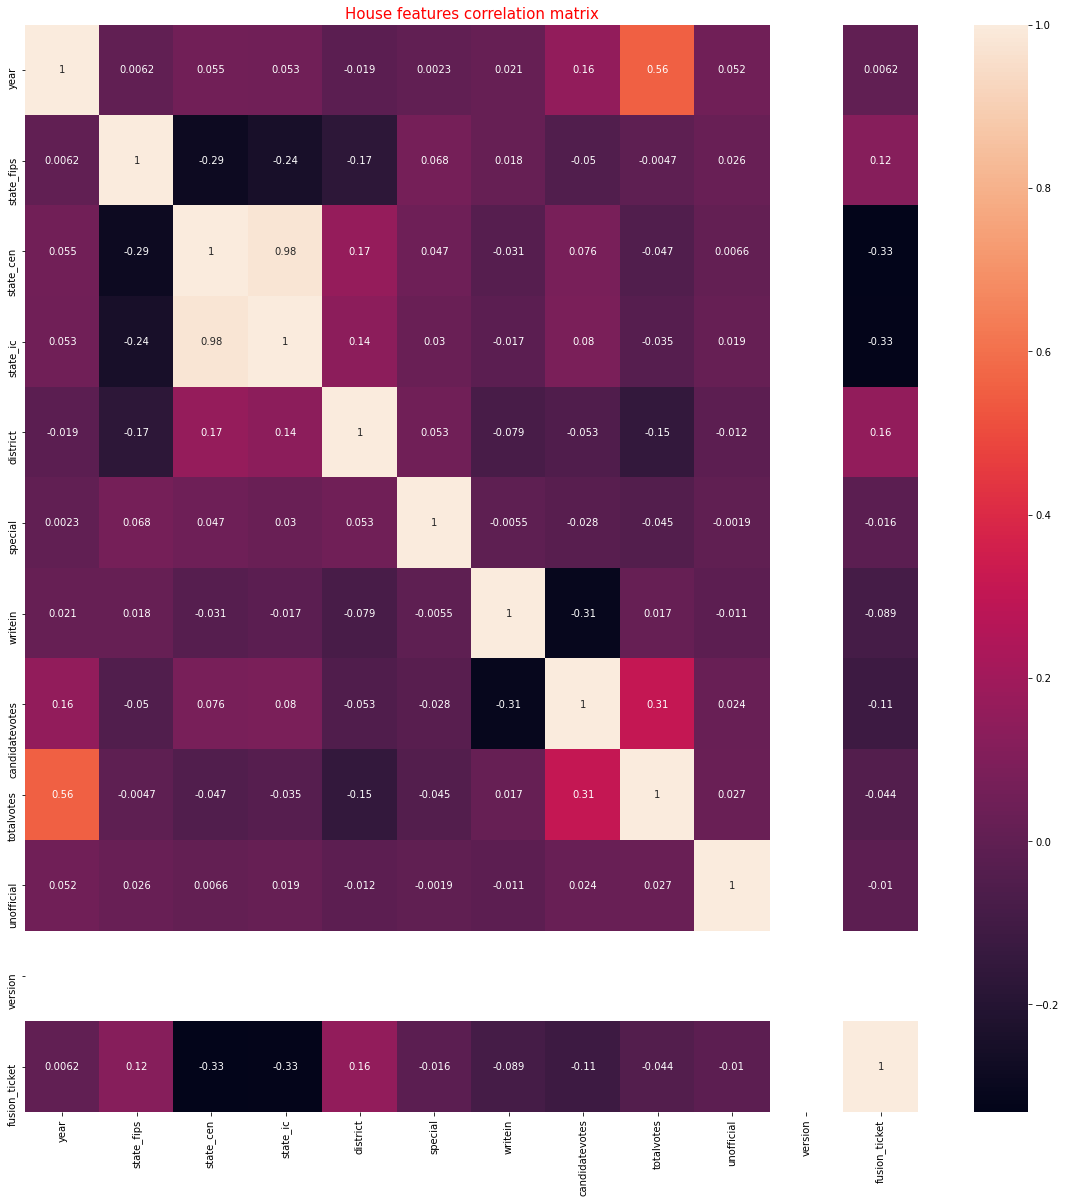

In [82]:
plt.figure(figsize=(20,20))
sns.heatmap(house.corr(), annot=True)
plt.title("House features correlation matrix", fontsize=15, color='red')
plt.xticks(rotation = 90)
plt.show()

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<Figure size 1800x1800 with 0 Axes>

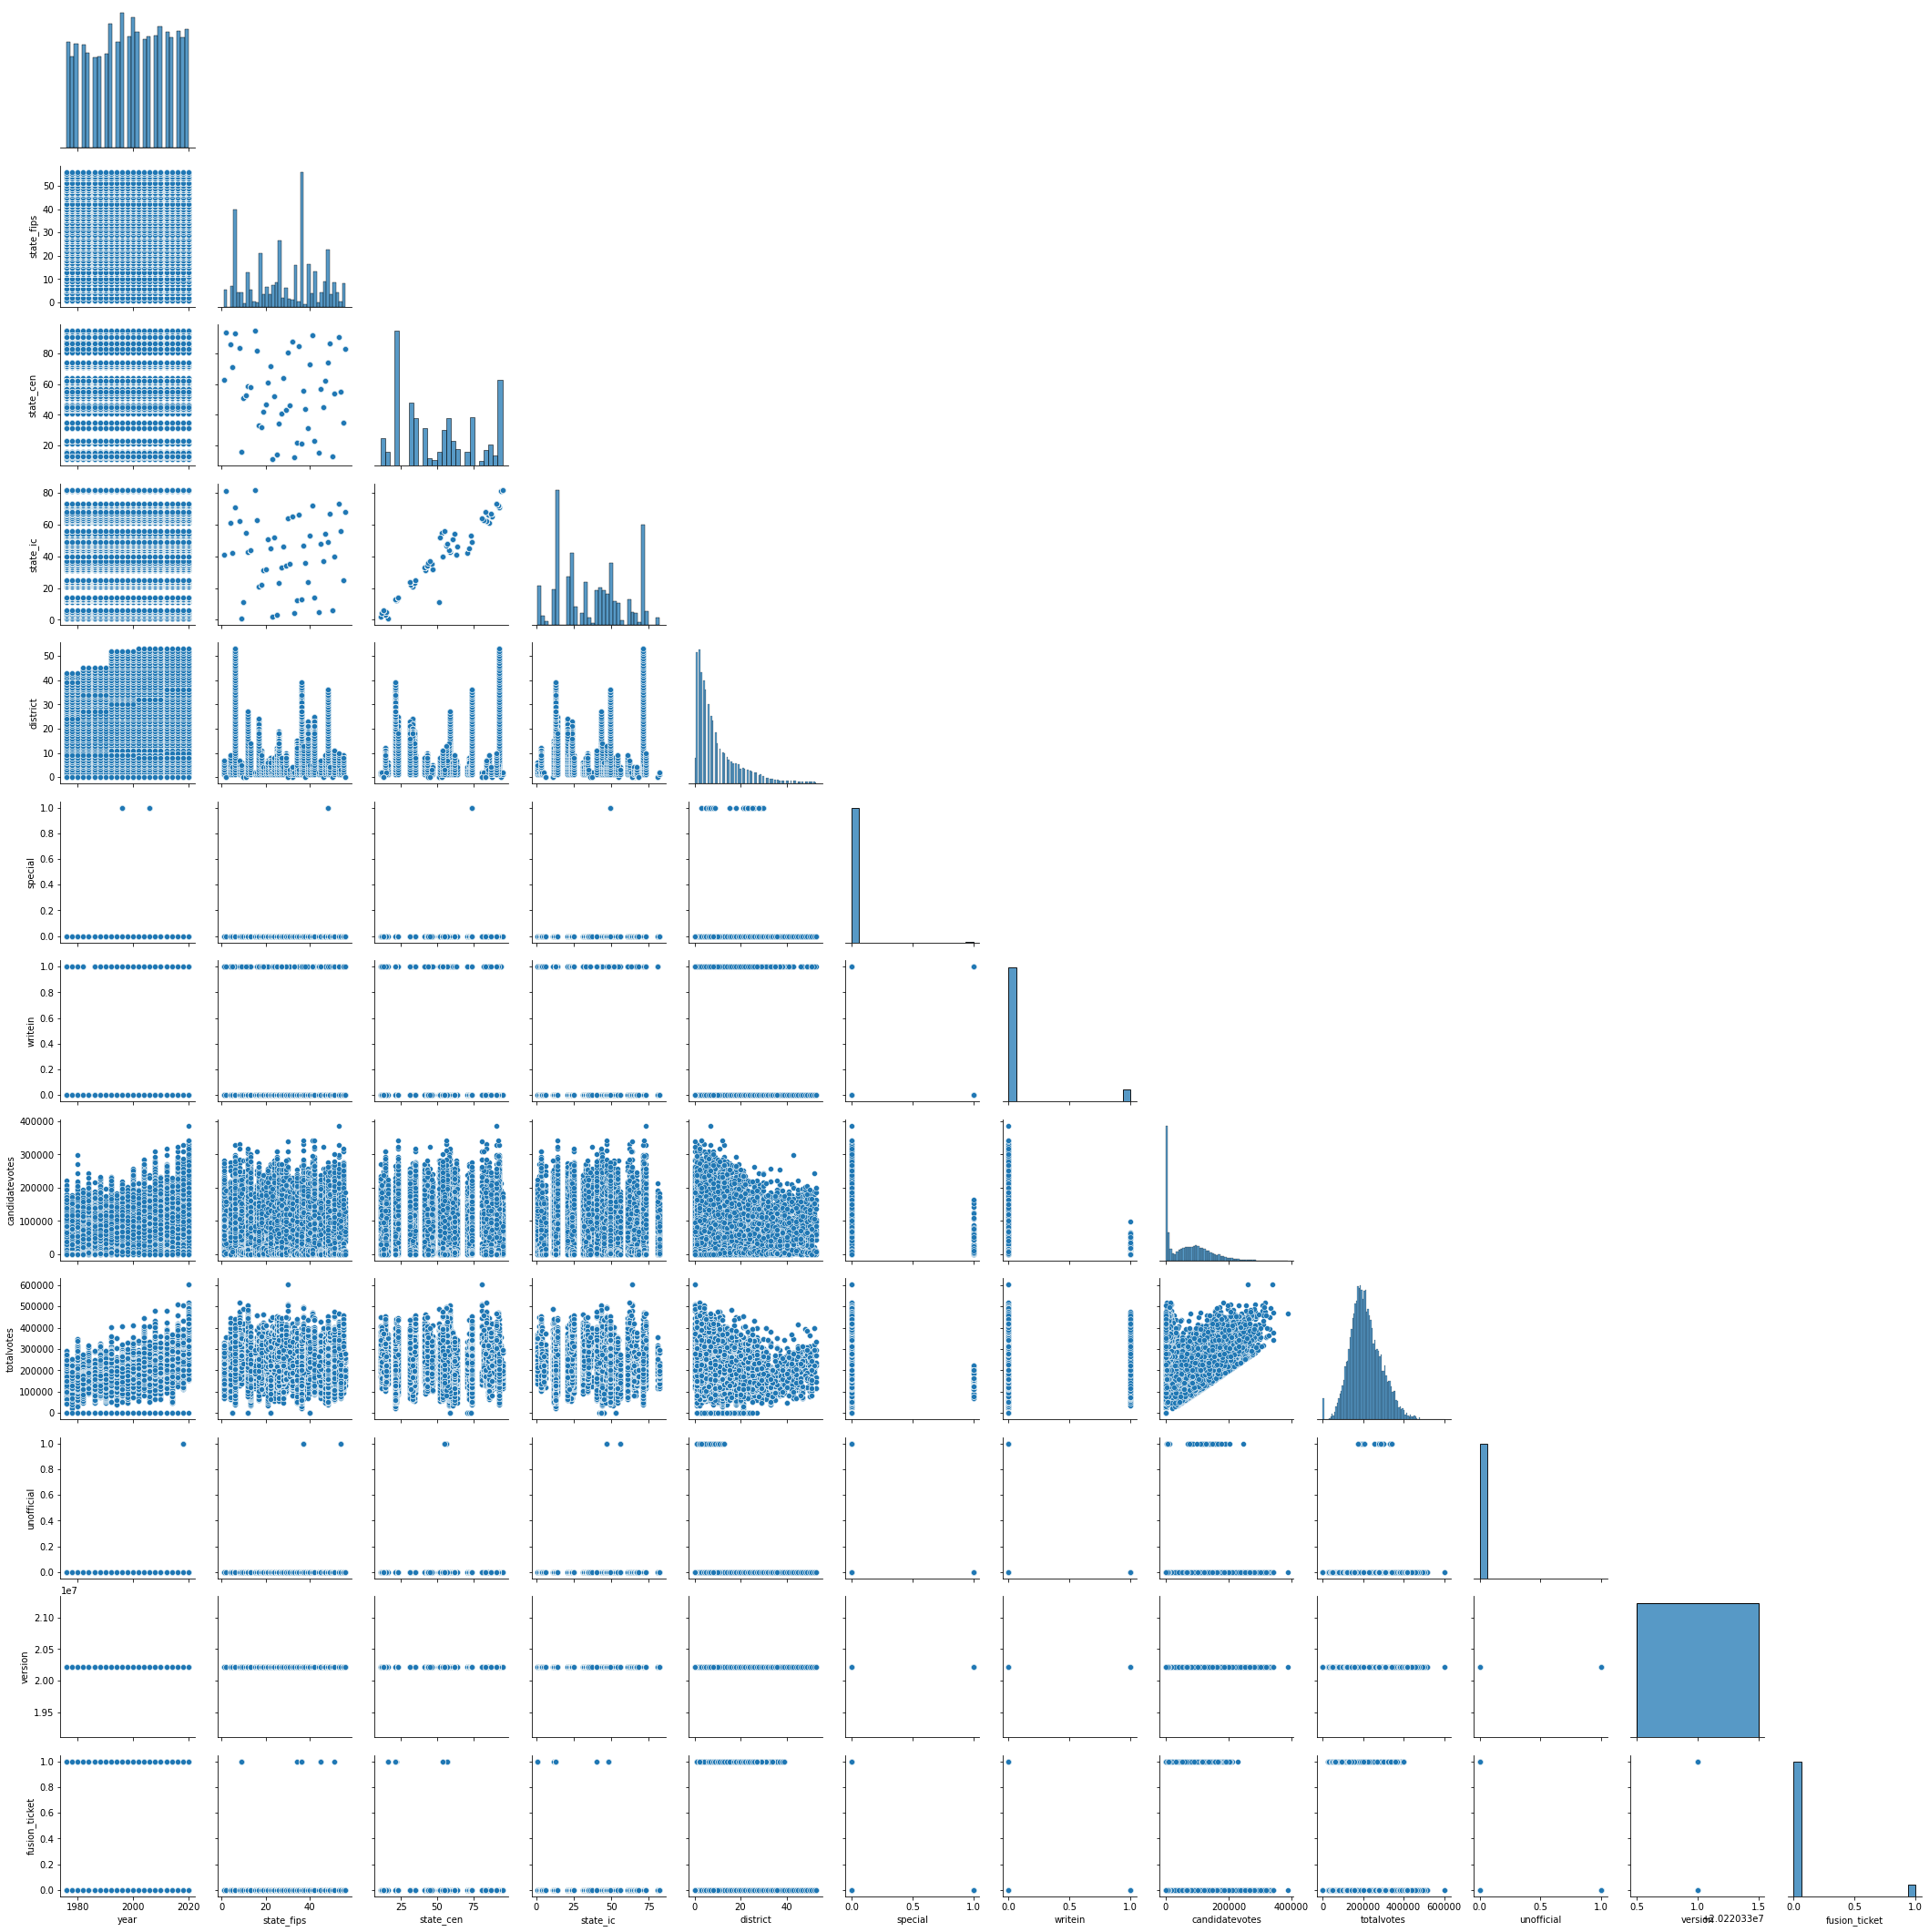

In [83]:
plt.figure(figsize=(25,25))
sns.pairplot(house, corner=True)
plt.show()

In [84]:
president = pd.read_csv("data/USElectionResults19762020/1976-2020-president.csv")
display(president.info())
display(president.isna().sum())
display(president)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4287 entries, 0 to 4286
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              4287 non-null   int64  
 1   state             4287 non-null   object 
 2   state_po          4287 non-null   object 
 3   state_fips        4287 non-null   int64  
 4   state_cen         4287 non-null   int64  
 5   state_ic          4287 non-null   int64  
 6   office            4287 non-null   object 
 7   candidate         4000 non-null   object 
 8   party_detailed    3831 non-null   object 
 9   writein           4284 non-null   object 
 10  candidatevotes    4287 non-null   int64  
 11  totalvotes        4287 non-null   int64  
 12  version           4287 non-null   int64  
 13  notes             0 non-null      float64
 14  party_simplified  4287 non-null   object 
dtypes: float64(1), int64(7), object(7)
memory usage: 502.5+ KB


None

year                   0
state                  0
state_po               0
state_fips             0
state_cen              0
state_ic               0
office                 0
candidate            287
party_detailed       456
writein                3
candidatevotes         0
totalvotes             0
version                0
notes               4287
party_simplified       0
dtype: int64

year    state state_po  state_fips  state_cen  state_ic        office  \
0     1976  ALABAMA       AL           1         63        41  US PRESIDENT   
1     1976  ALABAMA       AL           1         63        41  US PRESIDENT   
2     1976  ALABAMA       AL           1         63        41  US PRESIDENT   
3     1976  ALABAMA       AL           1         63        41  US PRESIDENT   
4     1976  ALABAMA       AL           1         63        41  US PRESIDENT   
...    ...      ...      ...         ...        ...       ...           ...   
4282  2020  WYOMING       WY          56         83        68  US PRESIDENT   
4283  2020  WYOMING       WY          56         83        68  US PRESIDENT   
4284  2020  WYOMING       WY          56         83        68  US PRESIDENT   
4285  2020  WYOMING       WY          56         83        68  US PRESIDENT   
4286  2020  WYOMING       WY          56         83        68  US PRESIDENT   

                    candidate              party_detailed writein  \
0               CARTER, JIMMY                    DEMOCRAT   False   
1                FORD, GERALD                  REPUBLICAN   False   
2              MADDOX, LESTER  AMERICAN INDEPENDENT PARTY   False   
3     BUBAR, BENJAMIN ""BEN""                 PROHIBITION   False   
4                   HALL, GUS         COMMUNIST PARTY USE   False   
...                       ...                         ...     ...   
4282            JORGENSEN, JO                 LIBERTARIAN   False   
4283            PIERCE, BROCK                 INDEPENDENT   False   
4284                      NaN                         NaN    True   
4285                OVERVOTES                         NaN   False   
4286               UNDERVOTES                         NaN   False   

      candidatevotes  totalvotes   version  notes party_simplified  
0             659170     1182850  20210113    NaN         DEMOCRAT  
1             504070     1182850  20210113    NaN       REPUBLICAN  
2               9198     1182850  20210113    NaN            OTHER  
3               6669     1182850  20210113    NaN            OTHER  
4               1954     1182850  20210113    NaN            OTHER  
...              ...         ...       ...    ...              ...  
4282            5768      278503  20210113    NaN      LIBERTARIAN  
4283            2208      278503  20210113    NaN            OTHER  
4284            1739      278503  20210113    NaN            OTHER  
4285             279      278503  20210113    NaN            OTHER  
4286            1459      278503  20210113    NaN            OTHER  

[4287 rows x 15 columns]

In [85]:
president.drop(columns=['notes'], inplace=True) #all nan feature
president.replace({'': 'unknown', np.nan:'unknown'},regex=True, inplace=True)
display(president.isna().sum())

year                0
state               0
state_po            0
state_fips          0
state_cen           0
state_ic            0
office              0
candidate           0
party_detailed      0
writein             0
candidatevotes      0
totalvotes          0
version             0
party_simplified    0
dtype: int64

In [87]:
president.columns = president.columns.str.lower()
president = president.applymap(lambda s: s.lower() if type(s)==str else s)

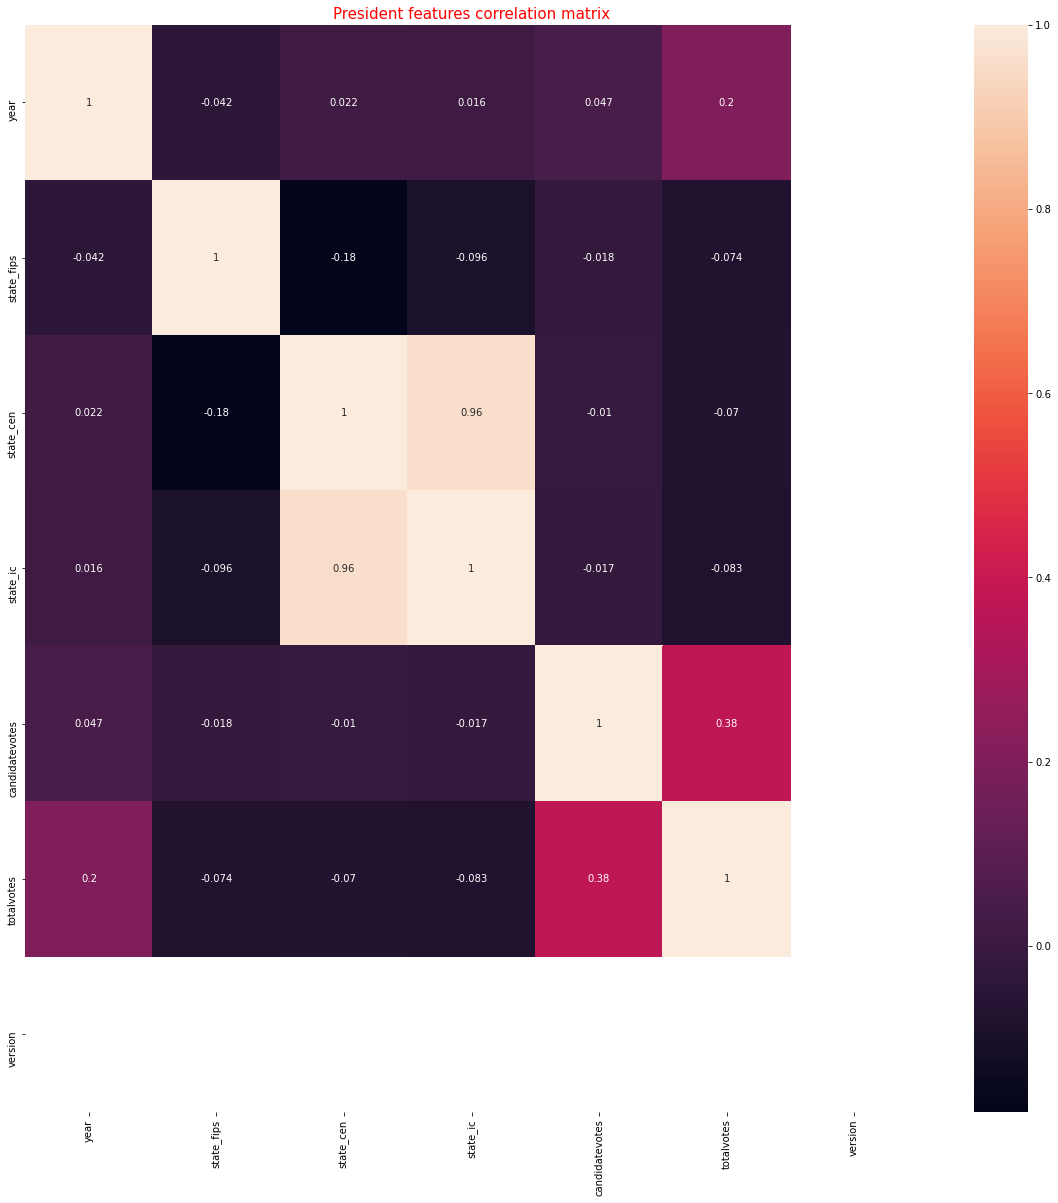

In [88]:
plt.figure(figsize=(20,20))
sns.heatmap(president.corr(), annot=True)
plt.title("President features correlation matrix", fontsize=15, color='red')
plt.xticks(rotation = 90)
plt.show()

<Figure size 1800x1800 with 0 Axes>

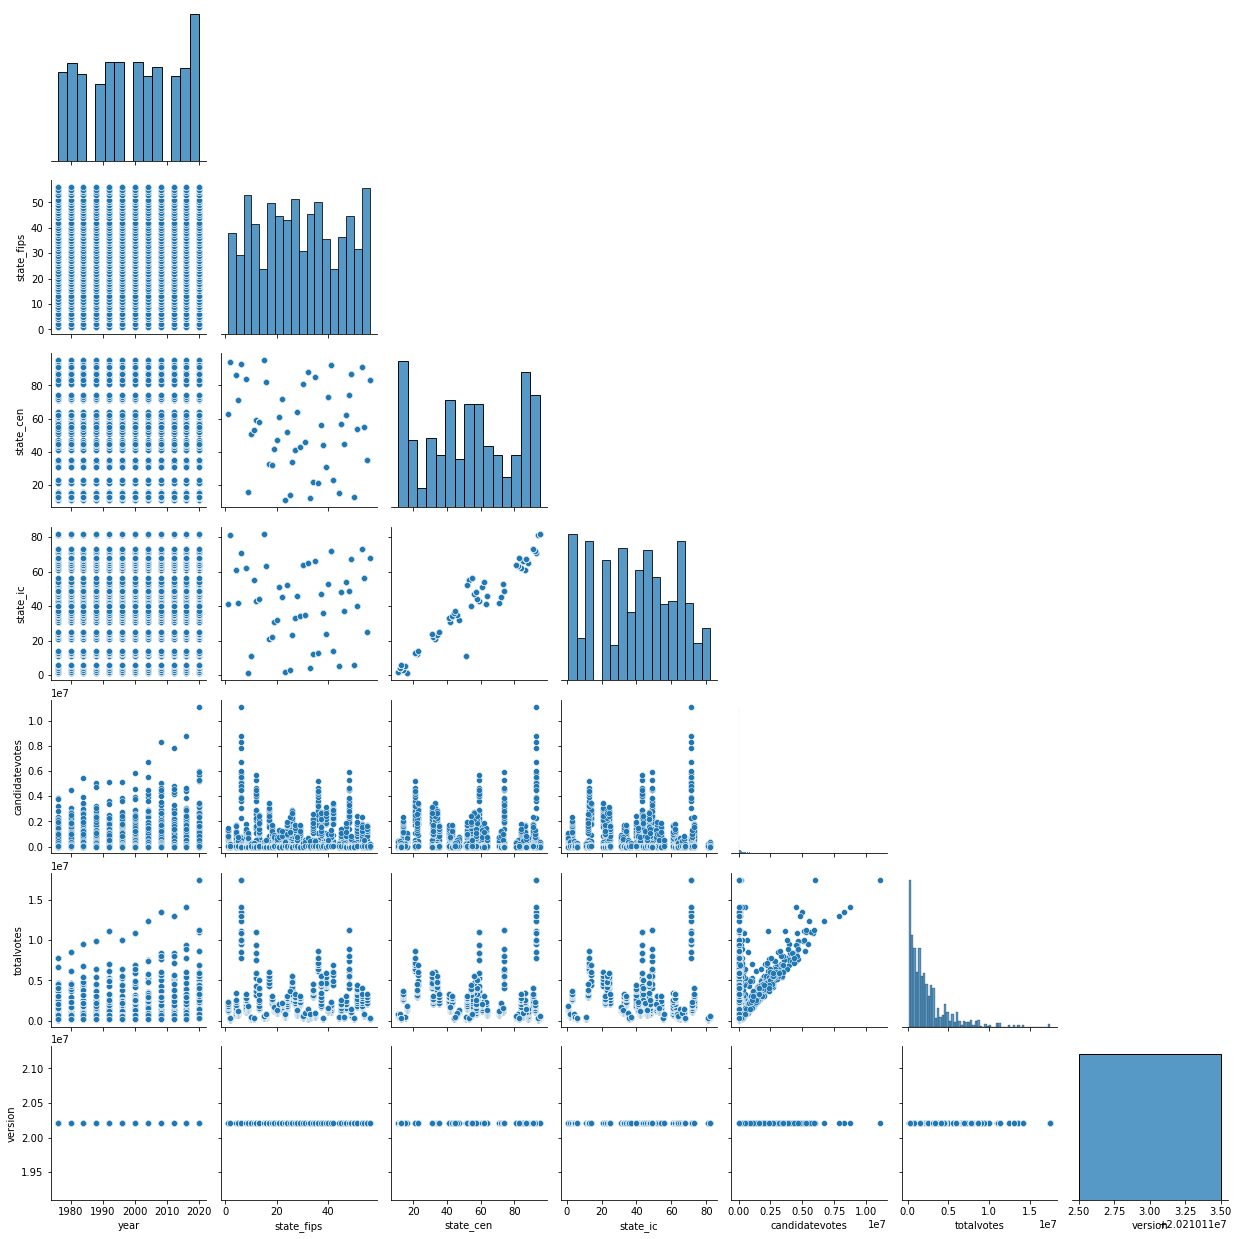

In [89]:
plt.figure(figsize=(25,25))
sns.pairplot(president, corner=True)
plt.show()

In [90]:
senate = pd.read_csv("data/USElectionResults19762020/1976-2020-senate.csv")
display(senate.info())
display(senate.isna().sum())
display(senate)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3629 entries, 0 to 3628
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              3629 non-null   int64 
 1   state             3629 non-null   object
 2   state_po          3629 non-null   object
 3   state_fips        3629 non-null   int64 
 4   state_cen         3629 non-null   int64 
 5   state_ic          3629 non-null   int64 
 6   office            3629 non-null   object
 7   district          3629 non-null   object
 8   stage             3629 non-null   object
 9   special           3629 non-null   bool  
 10  candidate         3206 non-null   object
 11  party_detailed    3030 non-null   object
 12  writein           3629 non-null   bool  
 13  mode              3629 non-null   object
 14  candidatevotes    3629 non-null   int64 
 15  totalvotes        3629 non-null   int64 
 16  unofficial        3629 non-null   bool  
 17  version       

None

year                  0
state                 0
state_po              0
state_fips            0
state_cen             0
state_ic              0
office                0
district              0
stage                 0
special               0
candidate           423
party_detailed      599
writein               0
mode                  0
candidatevotes        0
totalvotes            0
unofficial            0
version               0
party_simplified      0
dtype: int64

year    state state_po  state_fips  state_cen  state_ic     office  \
0     1976  ARIZONA       AZ           4         86        61  US SENATE   
1     1976  ARIZONA       AZ           4         86        61  US SENATE   
2     1976  ARIZONA       AZ           4         86        61  US SENATE   
3     1976  ARIZONA       AZ           4         86        61  US SENATE   
4     1976  ARIZONA       AZ           4         86        61  US SENATE   
...    ...      ...      ...         ...        ...       ...        ...   
3624  2020  WYOMING       WY          56         83        68  US SENATE   
3625  2021  GEORGIA       GA          13         58        44  US SENATE   
3626  2021  GEORGIA       GA          13         58        44  US SENATE   
3627  2021  GEORGIA       GA          13         58        44  US SENATE   
3628  2021  GEORGIA       GA          13         58        44  US SENATE   

       district   stage  special            candidate party_detailed  writein  \
0     statewide     gen    False          SAM STEIGER     REPUBLICAN    False   
1     statewide     gen    False  WM. MATHEWS FEIGHAN    INDEPENDENT    False   
2     statewide     gen    False     DENNIS DECONCINI       DEMOCRAT    False   
3     statewide     gen    False        ALLAN NORWITZ    LIBERTARIAN    False   
4     statewide     gen    False            BOB FIELD    INDEPENDENT    False   
...         ...     ...      ...                  ...            ...      ...   
3624  statewide     gen    False          UNDER VOTES            NaN    False   
3625  statewide  runoff     True       KELLY LOEFFLER     REPUBLICAN    False   
3626  statewide  runoff     True      RAPHAEL WARNOCK       DEMOCRAT    False   
3627  statewide  runoff    False      DAVID A. PERDUE     REPUBLICAN    False   
3628  statewide  runoff    False           JON OSSOFF       DEMOCRAT    False   

       mode  candidatevotes  totalvotes  unofficial   version party_simplified  
0     total          321236      741210       False  20210114       REPUBLICAN  
1     total            1565      741210       False  20210114            OTHER  
2     total          400334      741210       False  20210114         DEMOCRAT  
3     total            7310      741210       False  20210114      LIBERTARIAN  
4     total           10765      741210       False  20210114            OTHER  
...     ...             ...         ...         ...       ...              ...  
3624  total            6401      278503       False  20210114            OTHER  
3625  total         2194848     4483294        True  20210114       REPUBLICAN  
3626  total         2288446     4483294        True  20210114         DEMOCRAT  
3627  total         2213979     4483241        True  20210114       REPUBLICAN  
3628  total         2269262     4483241        True  20210114         DEMOCRAT  

[3629 rows x 19 columns]

In [93]:
senate.replace({np.nan:'unknown', '':'unknown'},regex=True, inplace=True)
senate.isna().sum()

year                0
state               0
state_po            0
state_fips          0
state_cen           0
state_ic            0
office              0
district            0
stage               0
special             0
candidate           0
party_detailed      0
writein             0
mode                0
candidatevotes      0
totalvotes          0
unofficial          0
version             0
party_simplified    0
dtype: int64

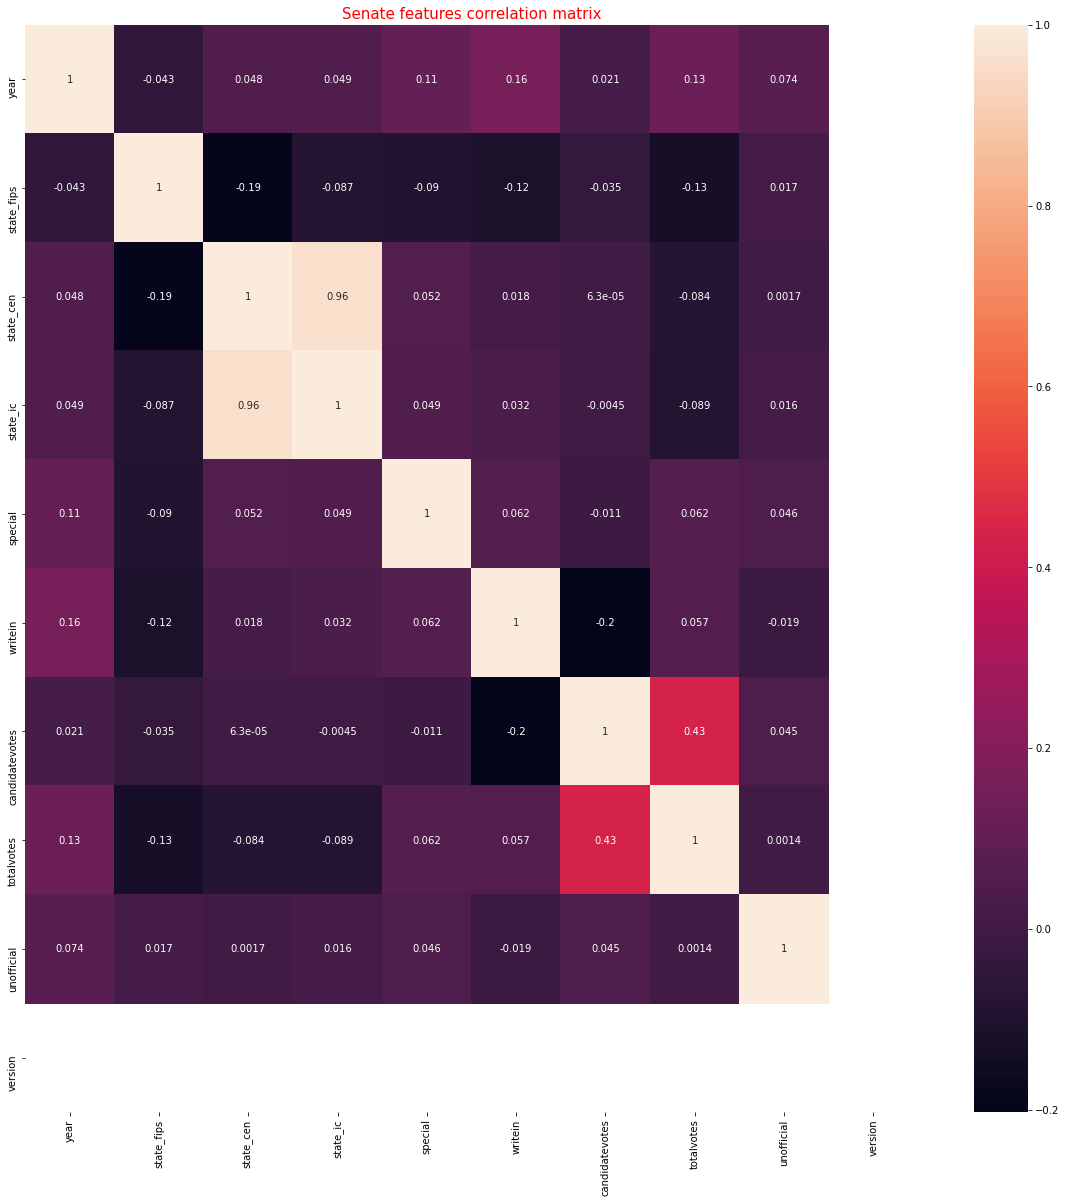

In [94]:
plt.figure(figsize=(20,20))
sns.heatmap(senate.corr(), annot=True)
plt.title("Senate features correlation matrix", fontsize=15, color='red')
plt.xticks(rotation = 90)
plt.show()

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<Figure size 1800x1800 with 0 Axes>

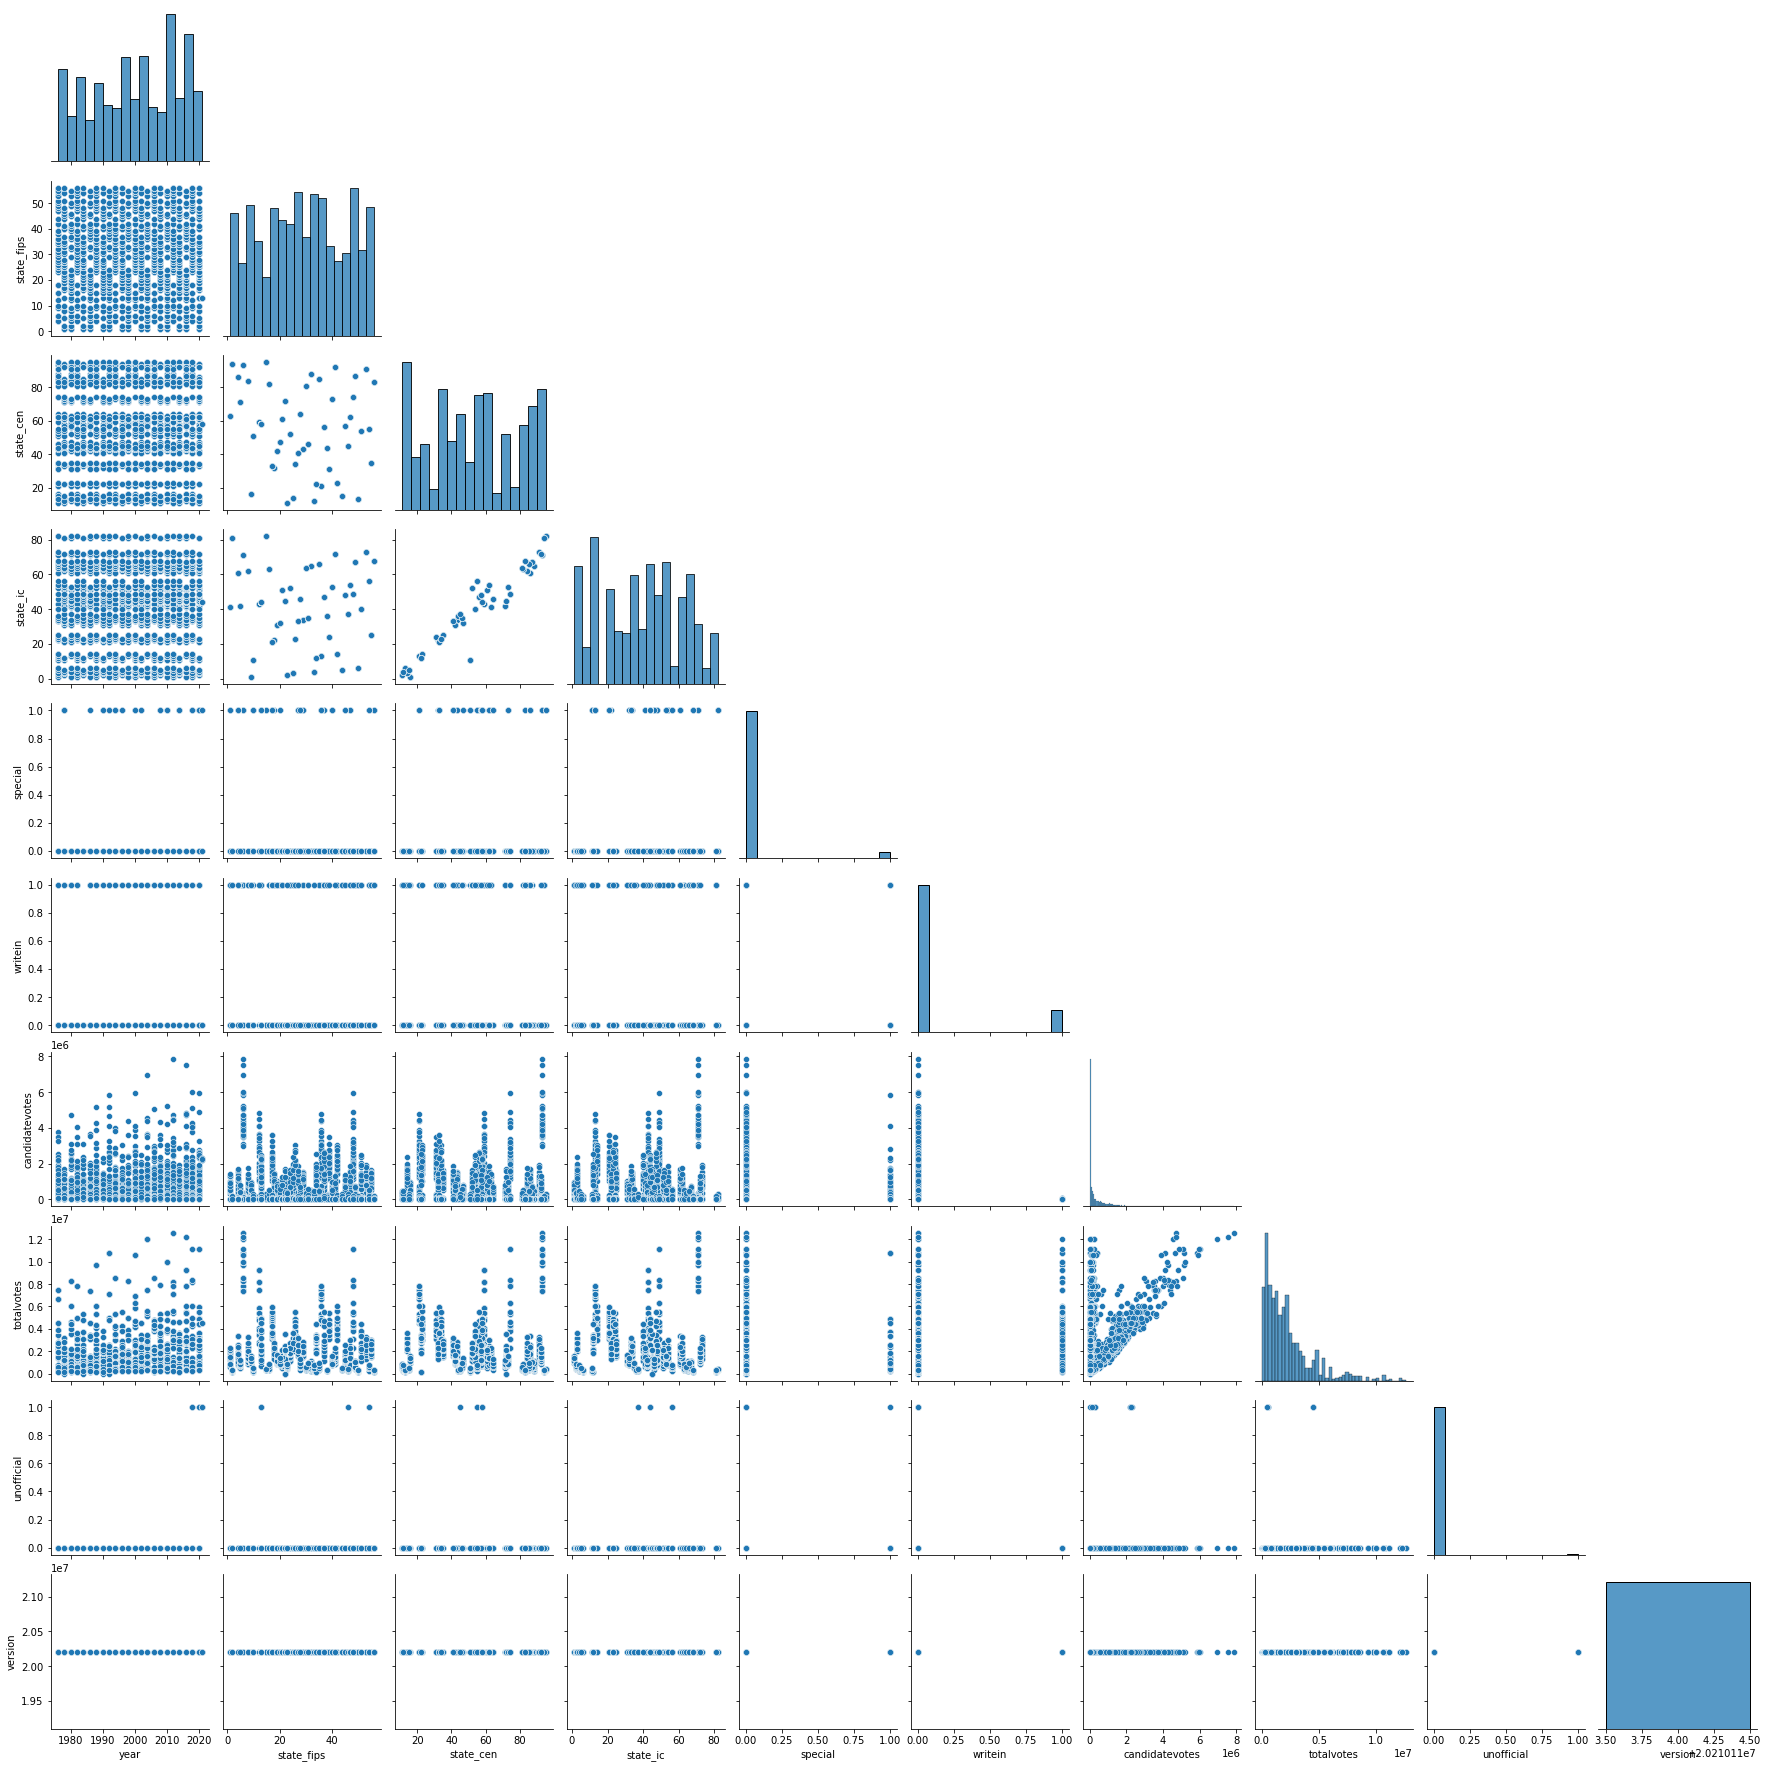

In [95]:
plt.figure(figsize=(25,25))
sns.pairplot(senate, corner=True)
plt.show()

## Summary of Section A:

1 - We explored the data and imported it in pandas dataframes, and check the info to see the data types, the isna.sum to check for missing values or nulls in each column and displayed data in table.

2- Missing values was imputed either by simply replace missing values with 0 if numeric, or with 'none' or 'unknown' if string.
Or we used KNNImputer to fill the missing gaps.

3- In order to fit KNN we used copies of the dataframe and factorized into numeric columns imputed the missing values and replaced the affected columns in place of the original ones.

4- Correlation matrix used to figure out highly correlated features to be dropped, we found in two dataframes that we had correlation of 1 or >0.95, there is no added benefit so in these cases we kept only one column of each group.

5- Visualized pairplot to see a more clear picture of distrubtion, and used scatterplot, countplot in addition to heatmap and tables.

6- Used groupby and displayed the mean of the numeric columns.

Now, all the data is preprocessed and ready for the next sections.

# Section B - Deminsional Reduction

In [96]:
# merge the three dataframes we were asked to use
sectionB = pd.merge(countyData, pd.merge(complete,life))
display(sectionB.info())
display(sectionB)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61110 entries, 0 to 61109
Columns: 214 entries, fips to female life expectancy change 1997 to 2007 (years)
dtypes: float64(198), int64(6), object(10)
memory usage: 100.2+ MB


None

fips    state   county  land area  water area  date  population  \
0       1001  alabama  autauga     1543.7        22.0  1990       34222   
1       1001  alabama  autauga     1543.7        22.0  1990       34222   
2       1001  alabama  autauga     1543.7        22.0  1990       34222   
3       1001  alabama  autauga     1543.7        22.0  1990       34222   
4       1001  alabama  autauga     1543.7        22.0  1990       34222   
...      ...      ...      ...        ...         ...   ...         ...   
61105  56045  wyoming   weston     6210.6         5.7  1990        6518   
61106  56045  wyoming   weston     6210.6         5.7  1990        6518   
61107  56045  wyoming   weston     6210.6         5.7  1990        6518   
61108  56045  wyoming   weston     6210.6         5.7  1990        6518   
61109  56045  wyoming   weston     6210.6         5.7  1990        6518   

                 name smoking_ban_2010  pop2000  ...  \
0      autauga county             none  43671.0  ...   
1      autauga county             none  43671.0  ...   
2      autauga county             none  43671.0  ...   
3      autauga county             none  43671.0  ...   
4      autauga county             none  43671.0  ...   
...               ...              ...      ...  ...   
61105   weston county             none   6644.0  ...   
61106   weston county             none   6644.0  ...   
61107   weston county             none   6644.0  ...   
61108   weston county             none   6644.0  ...   
61109   weston county             none   6644.0  ...   

       closest ranked countries for male life expectancy (lower)  \
0      albania,bahrain,guam,jamaica,macedonia, the fo...           
1      albania,jamaica,macedonia, the former yugoslav...           
2      albania,bahrain,guam,macedonia, the former yug...           
3      albania,french guiana,macedonia, the former yu...           
4      french guiana,macedonia, the former yugoslav r...           
...                                                  ...           
61105  brunei darussalam,chile,finland,korea, republi...           
61106  chile,denmark,finland,guadeloupe,virgin island...           
61107  brunei darussalam,chile,korea, republic of,por...           
61108  brunei darussalam,chile,korea, republic of,por...           
61109  brunei darussalam,chile,korea, republic of,por...           

       closest ranked countries for female life expectancy (lower)  \
0            guadeloupe,israel,malta,montenegro,portugal             
1                 barbados,cuba,mayotte,reunion,slovenia             
2            barbados,mayotte,reunion,singapore,slovenia             
3      barbados,mayotte,netherlands antilles,reunion,...             
4      barbados,kuwait,netherlands antilles,singapore...             
...                                                  ...             
61105                cuba,denmark,greece,mayotte,reunion             
61106                cuba,denmark,kuwait,mayotte,reunion             
61107         cuba,denmark,french guiana,mayotte,reunion             
61108                cuba,denmark,greece,mayotte,reunion             
61109  channel islands,greece,malta,united kingdom,un...             

       rank (male)  rank (female)  \
0             2684           2661   
1             2646           2691   
2             2522           2637   
3             2585           2590   
4             2534           2616   
...            ...            ...   
61105          957            749   
61106          779            808   
61107          883            742   
61108          843            563   
61109          727            393   

       male life expectancy change 1987 to 2007 (years)  \
0                                                   3.7   
1                                                   3.7   
2                                                   3.7   
3                                                   3.7   
4                                   

In [97]:
# We can use only : california, florida, south dakota and wyoming, so we will filter state to include only this states
sectionB = sectionB[sectionB['state'].isin(['california', 'florida', 'south dakota', 'wyoming'])]
display(sectionB.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4263 entries, 3276 to 61109
Columns: 214 entries, fips to female life expectancy change 1997 to 2007 (years)
dtypes: float64(198), int64(6), object(10)
memory usage: 7.0+ MB


None

## Preparations for dimensionality reduction

Create a copy dataframe with all string columns factorized into numeric values (needed in order to scale the data and to fit dimensionality reduction algorithms)

In [132]:
sectionBI = sectionB.reset_index(drop=True)
sectionBI

fips       state   county  land area  water area  date  population  \
0      6001  california  alameda     1910.1       216.0  1990     1279182   
1      6001  california  alameda     1910.1       216.0  1990     1279182   
2      6001  california  alameda     1910.1       216.0  1990     1279182   
3      6001  california  alameda     1910.1       216.0  1990     1279182   
4      6001  california  alameda     1910.1       216.0  1990     1279182   
...     ...         ...      ...        ...         ...   ...         ...   
4258  56045     wyoming   weston     6210.6         5.7  1990        6518   
4259  56045     wyoming   weston     6210.6         5.7  1990        6518   
4260  56045     wyoming   weston     6210.6         5.7  1990        6518   
4261  56045     wyoming   weston     6210.6         5.7  1990        6518   
4262  56045     wyoming   weston     6210.6         5.7  1990        6518   

                name smoking_ban_2010    pop2000  ...  \
0     alameda county             none  1443741.0  ...   
1     alameda county             none  1443741.0  ...   
2     alameda county             none  1443741.0  ...   
3     alameda county             none  1443741.0  ...   
4     alameda county             none  1443741.0  ...   
...              ...              ...        ...  ...   
4258   weston county             none     6644.0  ...   
4259   weston county             none     6644.0  ...   
4260   weston county             none     6644.0  ...   
4261   weston county             none     6644.0  ...   
4262   weston county             none     6644.0  ...   

      closest ranked countries for male life expectancy (lower)  \
0     barbados,germany,ireland,netherlands antilles,...           
1     aruba,austria,netherlands antilles,singapore,u...           
2     aruba,finland,guadeloupe,luxembourg,virgin isl...           
3     finland,guadeloupe,luxembourg,netherlands anti...           
4     barbados,guadeloupe,luxembourg,netherlands ant...           
...                                                 ...           
4258  brunei darussalam,chile,finland,korea, republi...           
4259  chile,denmark,finland,guadeloupe,virgin island...           
4260  brunei darussalam,chile,korea, republic of,por...           
4261  brunei darussalam,chile,korea, republic of,por...           
4262  brunei darussalam,chile,korea, republic of,por...           

      closest ranked countries for female life expectancy (lower)  \
0     austria,denmark,germany,united kingdom,virgin ...             
1     costa rica,denmark,montenegro,new zealand,virg...             
2     costa rica,denmark,guadeloupe,montenegro,new z...             
3     costa rica,israel,montenegro,new zealand,portugal             
4     costa rica,israel,montenegro,new zealand,unite...             
...                                                 ...             
4258                cuba,denmark,greece,mayotte,reunion             
4259                cuba,denmark,kuwait,mayotte,reunion             
4260         cuba,denmark,french guiana,mayotte,reunion             
4261                cuba,denmark,greece,mayotte,reunion             
4262  channel islands,greece,malta,united kingdom,un...             

      rank (male)  rank (female)  \
0            1444           2262   
1            1538           2310   
2            1709           2212   
3            1547           2186   
4            1515           2002   
...           ...            ...   
4258          957            749   
4259          779            808   
4260          883            742   
4261          843            563   
4262          727            393   

      male life expectancy change 1987 to 2007 (years)  \
0                                                  6.1   
1                                                  6.1   
2                                                  6.1   
3                                                  6.1   
4                                       

In [133]:
sectionBI['state'].unique()

array(['california', 'florida', 'south dakota', 'wyoming'], dtype=object)

In [135]:
nsectionBI = sectionBI.copy()
for col in nsectionBI.columns:
    if nsectionBI[col].dtype == 'object':
        nsectionBI[col] = pd.factorize(nsectionBI[col])[0]
nsectionBI

fips  state  county  land area  water area  date  population  name  \
0      6001      0       0     1910.1       216.0  1990     1279182     0   
1      6001      0       0     1910.1       216.0  1990     1279182     0   
2      6001      0       0     1910.1       216.0  1990     1279182     0   
3      6001      0       0     1910.1       216.0  1990     1279182     0   
4      6001      0       0     1910.1       216.0  1990     1279182     0   
...     ...    ...     ...        ...         ...   ...         ...   ...   
4258  56045      3     193     6210.6         5.7  1990        6518   193   
4259  56045      3     193     6210.6         5.7  1990        6518   193   
4260  56045      3     193     6210.6         5.7  1990        6518   193   
4261  56045      3     193     6210.6         5.7  1990        6518   193   
4262  56045      3     193     6210.6         5.7  1990        6518   193   

      smoking_ban_2010    pop2000  ...  \
0                    0  1443741.0  ...   
1                    0  1443741.0  ...   
2                    0  1443741.0  ...   
3                    0  1443741.0  ...   
4                    0  1443741.0  ...   
...                ...        ...  ...   
4258                 0     6644.0  ...   
4259                 0     6644.0  ...   
4260                 0     6644.0  ...   
4261                 0     6644.0  ...   
4262                 0     6644.0  ...   

      closest ranked countries for male life expectancy (lower)  \
0                                                     0           
1                                                     1           
2                                                     2           
3                                                     3           
4                                                     4           
...                                                 ...           
4258                                                293           
4259                                                324           
4260                                                204           
4261                                                204           
4262                                                566           

      closest ranked countries for female life expectancy (lower)  \
0                                                     0             
1                                                     1             
2                                                     2             
3                                                     3             
4                                                     4             
...                                                 ...             
4258                                                 42             
4259                                                 30             
4260                                                 31             
4261                                                 42             
4262                                                 69             

      rank (male)  rank (female)  \
0            1444           2262   
1            1538           2310   
2            1709           2212   
3            1547           2186   
4            1515           2002   
...           ...            ...   
4258          957            749   
4259          779            808   
4260          883            742   
4261          843            563   
4262          727            393   

      male life expectancy change 1987 to 2007 (years)  \
0                                                  6.1   
1                                                  6.1   
2                                                  6.1   
3                                                  6.1   
4                                                  6.1   
...                                                ...   
4258                                               3.5   
4259                                          

In [136]:
nsectionBI = pd.DataFrame(StandardScaler().fit_transform(nsectionBI), columns=nsectionBI.columns)
nsectionBI

fips     state    county  land area  water area  date  population  \
0    -0.994517 -1.292797 -1.695422  -0.542879    0.031266   0.0    1.557546   
1    -0.994517 -1.292797 -1.695422  -0.542879    0.031266   0.0    1.557546   
2    -0.994517 -1.292797 -1.695422  -0.542879    0.031266   0.0    1.557546   
3    -0.994517 -1.292797 -1.695422  -0.542879    0.031266   0.0    1.557546   
4    -0.994517 -1.292797 -1.695422  -0.542879    0.031266   0.0    1.557546   
...        ...       ...       ...        ...         ...   ...         ...   
4258  1.536376  1.782646  1.743077   0.390691   -0.354885   0.0   -0.266271   
4259  1.536376  1.782646  1.743077   0.390691   -0.354885   0.0   -0.266271   
4260  1.536376  1.782646  1.743077   0.390691   -0.354885   0.0   -0.266271   
4261  1.536376  1.782646  1.743077   0.390691   -0.354885   0.0   -0.266271   
4262  1.536376  1.782646  1.743077   0.390691   -0.354885   0.0   -0.266271   

          name  smoking_ban_2010   pop2000  ...  \
0    -1.695422         -0.932869  1.591993  ...   
1    -1.695422         -0.932869  1.591993  ...   
2    -1.695422         -0.932869  1.591993  ...   
3    -1.695422         -0.932869  1.591993  ...   
4    -1.695422         -0.932869  1.591993  ...   
...        ...               ...       ...  ...   
4258  1.743077         -0.932869 -0.284350  ...   
4259  1.743077         -0.932869 -0.284350  ...   
4260  1.743077         -0.932869 -0.284350  ...   
4261  1.743077         -0.932869 -0.284350  ...   
4262  1.743077         -0.932869 -0.284350  ...   

      closest ranked countries for male life expectancy (lower)  \
0                                             -1.283402           
1                                             -1.277623           
2                                             -1.271844           
3                                             -1.266065           
4                                             -1.260286           
...                                                 ...           
4258                                           0.409871           
4259                                           0.589022           
4260                                          -0.104468           
4261                                          -0.104468           
4262                                           1.987561           

      closest ranked countries for female life expectancy (lower)  \
0                                             -1.120590             
1                                             -1.113691             
2                                             -1.106792             
3                                             -1.099893             
4                                             -1.092995             
...                                                 ...             
4258                                          -0.830844             
4259                                          -0.913628             
4260                                          -0.906730             
4261                                          -0.830844             
4262                                          -0.644579             

      rank (male)  rank (female)  \
0        0.272777       1.270062   
1        0.383143       1.323672   
2        0.583915       1.214217   
3        0.393710       1.185178   
4        0.356139       0.979670   
...           ...            ...   
4258    -0.299011      -0.419794   
4259    -0.508001      -0.353897   
4260    -0.385895      -0.427612   
4261    -0.432859      -0.627536   
4262    -0.569055      -0.817407   

      male life expectancy change 1987 to 2007 (years)  \
0                                             2.108264   
1                                             2.108264   
2                                             2.108264   
3                                             2.108264   
4                                             2.108264   
...                              

### First Algorithm - PCA (Principal Components Analysis):

In [137]:
pca = PCA(n_components=20).fit(nsectionBI)
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals= 1)
labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]
npcaDF = pd.DataFrame(pca.transform(nsectionBI), columns=labels)

In [138]:
npcaDF

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     20.078847 -3.148031 -7.355897  3.444966 -6.396216 -1.810544  0.934945   
1     20.074478 -3.124059 -7.352466  3.415184 -6.431199 -1.832794  0.929761   
2     20.072625 -3.128731 -7.343302  3.419709 -6.435340 -1.811738  0.984852   
3     20.089584 -3.217743 -7.374150  3.470125 -6.394723 -1.738035  1.112069   
4     20.103518 -3.306641 -7.390837  3.543311 -6.314850 -1.647529  1.230007   
...         ...       ...       ...       ...       ...       ...       ...   
4258  -4.805125 -3.782610  3.450969  0.572084  1.286960 -0.693996 -0.752482   
4259  -4.818992 -3.815261  3.483526  0.621961  1.215029 -0.746443 -0.694070   
4260  -4.755571 -3.933844  3.348024  0.732584  1.637802 -0.449386 -0.769171   
4261  -4.739401 -4.045749  3.329472  0.813473  1.720586 -0.339760 -0.602255   
4262  -4.820685 -4.018260  3.511165  0.715126  1.138003 -0.639271 -0.186445   

           PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0     7.104521  0.704144  1.961503 -4.614112 -0.593923  1.856628  1.635280   
1     7.091101  0.701512  1.956618 -4.580999 -0.523129  1.788868  1.603075   
2     7.078249  0.701469  1.916766 -4.534777 -0.460299  1.735658  1.560922   
3     7.021074  0.719006  1.844027 -4.389529 -0.219927  1.653719  1.469248   
4     6.987476  0.741491  1.760574 -4.299363 -0.055473  1.647802  1.402108   
...        ...       ...       ...       ...       ...       ...       ...   
4258  0.088054 -2.284431  0.917229 -0.488780  2.353817 -0.026286  0.669192   
4259  0.096296 -2.408408  1.134688 -0.325914  2.369398 -0.125097  0.666340   
4260  0.156947 -2.161975  0.839664 -0.552770  2.368450  0.629596  0.629467   
4261  0.097849 -2.134566  0.721955 -0.426531  2.595002  0.581795  0.538655   
4262 -0.159633 -2.454920  0.907928  0.191974  3.150977 -0.891470  0.355781   

          PC15      PC16      PC17      PC18      PC19      PC20  
0     0.697579  0.692138 -0.352161 -0.810567  0.596144  1.046048  
1     0.658649  0.659437 -0.393194 -0.824488  0.557209  1.041088  
2     0.598274  0.617784 -0.408606 -0.847924  0.494980  1.062441  
3     0.446238  0.547608 -0.418714 -0.872242  0.425404  1.061322  
4     0.308695  0.496037 -0.384707 -0.886394  0.351279  1.077347  
...        ...       ...       ...       ...       ...       ...  
4258 -1.144722 -1.567654  1.161919  0.419524  0.434167 -0.147288  
4259 -1.406332 -1.959919  2.449471  0.366497 -0.412810  0.220758  
4260 -1.824425 -1.554066  0.974357  0.132866 -0.131789 -0.214248  
4261 -1.954174 -1.606795  0.977439  0.130973 -0.164600 -0.202732  
4262 -1.493693 -2.320315  3.009618  0.512628 -0.496973  0.465930  

[4263 rows x 20 columns]

In [140]:
npcaDF = pd.concat([sectionBI[['state']], npcaDF], axis = 1)
npcaDF

state        PC1       PC2       PC3       PC4       PC5       PC6  \
0     california  20.078847 -3.148031 -7.355897  3.444966 -6.396216 -1.810544   
1     california  20.074478 -3.124059 -7.352466  3.415184 -6.431199 -1.832794   
2     california  20.072625 -3.128731 -7.343302  3.419709 -6.435340 -1.811738   
3     california  20.089584 -3.217743 -7.374150  3.470125 -6.394723 -1.738035   
4     california  20.103518 -3.306641 -7.390837  3.543311 -6.314850 -1.647529   
...          ...        ...       ...       ...       ...       ...       ...   
4258     wyoming  -4.805125 -3.782610  3.450969  0.572084  1.286960 -0.693996   
4259     wyoming  -4.818992 -3.815261  3.483526  0.621961  1.215029 -0.746443   
4260     wyoming  -4.755571 -3.933844  3.348024  0.732584  1.637802 -0.449386   
4261     wyoming  -4.739401 -4.045749  3.329472  0.813473  1.720586 -0.339760   
4262     wyoming  -4.820685 -4.018260  3.511165  0.715126  1.138003 -0.639271   

           PC7       PC8       PC9  ...      PC11      PC12      PC13  \
0     0.934945  7.104521  0.704144  ... -4.614112 -0.593923  1.856628   
1     0.929761  7.091101  0.701512  ... -4.580999 -0.523129  1.788868   
2     0.984852  7.078249  0.701469  ... -4.534777 -0.460299  1.735658   
3     1.112069  7.021074  0.719006  ... -4.389529 -0.219927  1.653719   
4     1.230007  6.987476  0.741491  ... -4.299363 -0.055473  1.647802   
...        ...       ...       ...  ...       ...       ...       ...   
4258 -0.752482  0.088054 -2.284431  ... -0.488780  2.353817 -0.026286   
4259 -0.694070  0.096296 -2.408408  ... -0.325914  2.369398 -0.125097   
4260 -0.769171  0.156947 -2.161975  ... -0.552770  2.368450  0.629596   
4261 -0.602255  0.097849 -2.134566  ... -0.426531  2.595002  0.581795   
4262 -0.186445 -0.159633 -2.454920  ...  0.191974  3.150977 -0.891470   

          PC14      PC15      PC16      PC17      PC18      PC19      PC20  
0     1.635280  0.697579  0.692138 -0.352161 -0.810567  0.596144  1.046048  
1     1.603075  0.658649  0.659437 -0.393194 -0.824488  0.557209  1.041088  
2     1.560922  0.598274  0.617784 -0.408606 -0.847924  0.494980  1.062441  
3     1.469248  0.446238  0.547608 -0.418714 -0.872242  0.425404  1.061322  
4     1.402108  0.308695  0.496037 -0.384707 -0.886394  0.351279  1.077347  
...        ...       ...       ...       ...       ...       ...       ...  
4258  0.669192 -1.144722 -1.567654  1.161919  0.419524  0.434167 -0.147288  
4259  0.666340 -1.406332 -1.959919  2.449471  0.366497 -0.412810  0.220758  
4260  0.629467 -1.824425 -1.554066  0.974357  0.132866 -0.131789 -0.214248  
4261  0.538655 -1.954174 -1.606795  0.977439  0.130973 -0.164600 -0.202732  
4262  0.355781 -1.493693 -2.320315  3.009618  0.512628 -0.496973  0.465930  

[4263 rows x 21 columns]

PCA scatter plot graph by state:

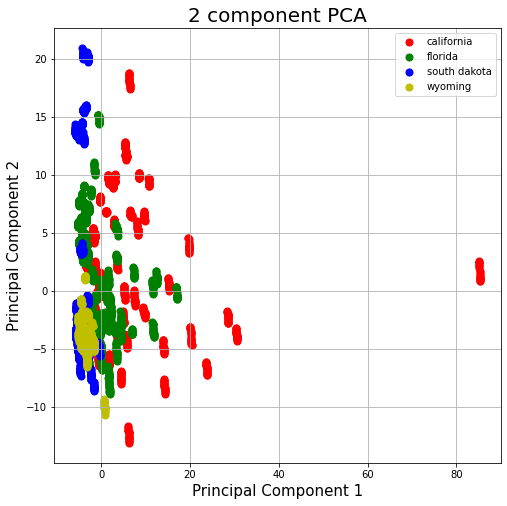

In [141]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['california', 'florida', 'south dakota', 'wyoming']
colors = ['r', 'g', 'b','y']
for target, color in zip(targets,colors):
    indicesToKeep = npcaDF['state'] == target
    ax.scatter(npcaDF.loc[indicesToKeep, 'PC1']
               , npcaDF.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Top features used in PCA :

In [142]:
loading_scores = pd.Series(pca.components_[0], index= sectionBI.columns)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top10Features = sorted_loading_scores[0:10].index.values
print(loading_scores[top10Features])

households_2019              0.112029
pop_2019                     0.112009
pop2017                      0.111987
households_2017              0.111973
pop2016                      0.111936
employed_2015                0.111926
civilian_labor_force_2016    0.111910
civilian_labor_force_2017    0.111897
civilian_labor_force_2015    0.111888
pop2015                      0.111882
dtype: float64


Least important features in PCA:

In [143]:
bottom10Features = sorted_loading_scores[-10:].index.values
print(loading_scores[bottom10Features])

poverty_2017                                     -5.193086e-03
years behind international frontier (male)       -4.596984e-03
percent_change_private_nonfarm_employment_2009   -4.361116e-03
age_under_5_2017                                  4.272801e-03
hispanic_owned_firms_2007                        -2.907996e-03
poverty_age_under_18_2017                        -1.610122e-03
age_under_5_2019                                  6.553234e-04
year                                              5.613648e-04
age_over_18_2019                                  3.424495e-04
date                                              2.019484e-28
dtype: float64


### PCA results overview:

As we had 214 columns, the top pcs covers only ~23% which means that is not good enough. So, we are going to analyze by PCA for each dataset alone figure out top features and create a new dataframe by merging only top features.


County_Complete:

In [144]:
complete

state               name smoking_ban_2010     fips   pop2000  \
0     alabama     autauga county             none   1001.0   43671.0   
1     alabama     baldwin county             none   1003.0  140415.0   
2     alabama     barbour county          partial   1005.0   29038.0   
3     alabama        bibb county             none   1007.0   20826.0   
4     alabama      blount county             none   1009.0   51024.0   
...       ...                ...              ...      ...       ...   
3137  wyoming  sweetwater county             none  56037.0   37613.0   
3138  wyoming       teton county          partial  56039.0   18251.0   
3139  wyoming       uinta county             none  56041.0   19742.0   
3140  wyoming    washakie county             none  56043.0    8289.0   
3141  wyoming      weston county             none  56045.0    6644.0   

       pop2010   pop2011   pop2012   pop2013   pop2014  ...  \
0      54571.0   55199.0   54927.0   54695.0   54864.0  ...   
1     182265.0  186534.0  190048.0  194736.0  199064.0  ...   
2      27457.0   27351.0   27175.0   26947.0   26749.0  ...   
3      22915.0   22745.0   22658.0   22503.0   22533.0  ...   
4      57322.0   57562.0   57595.0   57623.0   57546.0  ...   
...        ...       ...       ...       ...       ...  ...   
3137   43806.0   44013.0   45042.0   45145.0   44981.0  ...   
3138   21294.0   21476.0   21709.0   22326.0   22817.0  ...   
3139   21118.0   20899.0   20999.0   20960.0   20845.0  ...   
3140    8533.0    8460.0    8421.0    8427.0    8288.0  ...   
3141    7208.0    7141.0    7074.0    7136.0    7142.0  ...   

      poverty_under_18_2019  two_plus_races_2019  unemployment_rate_2019  \
0                 23.200000                  2.2                     3.5   
1                 13.400000                  1.7                     4.0   
2                 50.100000                  1.2                     9.4   
3                 34.113333                  0.6                     7.0   
4                 18.400000                  1.6                     3.1   
...                     ...                  ...                     ...   
3137              20.110000                  2.3                     5.7   
3138              20.320000                  0.7                     0.7   
3139              25.250000                  3.5                     5.5   
3140              33.856667                  3.8                     4.1   
3141              34.710000                  1.3                     4.0   

      uninsured_2019  uninsured_65_and_older_2019  uninsured_under_19_2019  \
0                7.1                          0.0                      1.7   
1                8.9                          0.3                      3.8   
2               11.3                          0.3                      3.3   
3               10.7                          0.0                      2.0   
4               10.8                          0.2                      5.9   
...              ...                          ...                      ...   
3137            11.3                          0.5                      9.2   
3138            12.7                          0.0                     10.1   
3139            11.2                          0.6                      6.8   
3140            15.0                          1.5                      7.0   
3141            11.8                          0.0                      8.6   

      uninsured_under_6_2019  veterans_2019  white_2019  \
0                        1.7           12.6        76.8   
1                        2.2           11.8        86.2   
2                        3.4            6.6        46.8   
3                        4.5            8.0        76.8   
4                        6.1            7.7        95.5   
...                      ...            ...         ...   
3137                    13.8            8.6        93.4   
3138                     5.9            5.3        89.3   
3139 

In [145]:
fcomplete = complete.copy()
fcomplete = fcomplete[fcomplete['state'].isin(['california', 'florida', 'south dakota', 'wyoming'])]
fcomplete

state               name smoking_ban_2010     fips    pop2000  \
186   california     alameda county             none   6001.0  1443741.0   
187   california      alpine county             none   6003.0     1208.0   
188   california      amador county             none   6005.0    35100.0   
189   california       butte county             none   6007.0   203171.0   
190   california   calaveras county             none   6009.0    40554.0   
...          ...                ...              ...      ...        ...   
3137     wyoming  sweetwater county             none  56037.0    37613.0   
3138     wyoming       teton county          partial  56039.0    18251.0   
3139     wyoming       uinta county             none  56041.0    19742.0   
3140     wyoming    washakie county             none  56043.0     8289.0   
3141     wyoming      weston county             none  56045.0     6644.0   

        pop2010    pop2011    pop2012    pop2013    pop2014  ...  \
186   1510271.0  1532215.0  1556648.0  1582936.0  1611572.0  ...   
187      1175.0     1093.0     1110.0     1127.0     1084.0  ...   
188     38091.0    37539.0    37112.0    36635.0    36748.0  ...   
189    220000.0   220003.0   220969.0   221768.0   223629.0  ...   
190     45578.0    45163.0    44826.0    44667.0    44677.0  ...   
...         ...        ...        ...        ...        ...  ...   
3137    43806.0    44013.0    45042.0    45145.0    44981.0  ...   
3138    21294.0    21476.0    21709.0    22326.0    22817.0  ...   
3139    21118.0    20899.0    20999.0    20960.0    20845.0  ...   
3140     8533.0     8460.0     8421.0     8427.0     8288.0  ...   
3141     7208.0     7141.0     7074.0     7136.0     7142.0  ...   

      poverty_under_18_2019  two_plus_races_2019  unemployment_rate_2019  \
186               11.300000                  6.5                     4.4   
187               25.233333                  5.1                    15.6   
188               16.486667                  4.8                     6.6   
189               19.600000                  6.1                     7.7   
190               23.593333                  5.2                     6.6   
...                     ...                  ...                     ...   
3137              20.110000                  2.3                     5.7   
3138              20.320000                  0.7                     0.7   
3139              25.250000                  3.5                     5.5   
3140              33.856667                  3.8                     4.1   
3141              34.710000                  1.3                     4.0   

      uninsured_2019  uninsured_65_and_older_2019  uninsured_under_19_2019  \
186              4.4                          1.0                      2.1   
187              8.9                          0.0                      3.7   
188              4.7                          0.0                      3.4   
189              6.2                          0.3                      3.2   
190              4.4                          0.1                      0.7   
...              ...                          ...                      ...   
3137            11.3                          0.5                      9.2   
3138            12.7                          0.0                     10.1   
3139            11.2                          0.6                      6.8   
3140            15.0                          1.5                      7.0   
3141            11.8                          0.0                      8.6   

      uninsured_under_6_2019  veterans_2019  white_2019  \
186                      1.9            3.7        40.5   
187                      0.0            9.4        57.7   
188                      5.1           11.7        86.7   
189                      3.3            7.9        81.6   
190                      0.0           11.9        90.5   
...                      ...            ...         ...   
3137              

In [146]:
fcomplete.reset_index(drop=True,inplace=True)
fcomplete

state               name smoking_ban_2010     fips    pop2000  \
0    california     alameda county             none   6001.0  1443741.0   
1    california      alpine county             none   6003.0     1208.0   
2    california      amador county             none   6005.0    35100.0   
3    california       butte county             none   6007.0   203171.0   
4    california   calaveras county             none   6009.0    40554.0   
..          ...                ...              ...      ...        ...   
209     wyoming  sweetwater county             none  56037.0    37613.0   
210     wyoming       teton county          partial  56039.0    18251.0   
211     wyoming       uinta county             none  56041.0    19742.0   
212     wyoming    washakie county             none  56043.0     8289.0   
213     wyoming      weston county             none  56045.0     6644.0   

       pop2010    pop2011    pop2012    pop2013    pop2014  ...  \
0    1510271.0  1532215.0  1556648.0  1582936.0  1611572.0  ...   
1       1175.0     1093.0     1110.0     1127.0     1084.0  ...   
2      38091.0    37539.0    37112.0    36635.0    36748.0  ...   
3     220000.0   220003.0   220969.0   221768.0   223629.0  ...   
4      45578.0    45163.0    44826.0    44667.0    44677.0  ...   
..         ...        ...        ...        ...        ...  ...   
209    43806.0    44013.0    45042.0    45145.0    44981.0  ...   
210    21294.0    21476.0    21709.0    22326.0    22817.0  ...   
211    21118.0    20899.0    20999.0    20960.0    20845.0  ...   
212     8533.0     8460.0     8421.0     8427.0     8288.0  ...   
213     7208.0     7141.0     7074.0     7136.0     7142.0  ...   

     poverty_under_18_2019  two_plus_races_2019  unemployment_rate_2019  \
0                11.300000                  6.5                     4.4   
1                25.233333                  5.1                    15.6   
2                16.486667                  4.8                     6.6   
3                19.600000                  6.1                     7.7   
4                23.593333                  5.2                     6.6   
..                     ...                  ...                     ...   
209              20.110000                  2.3                     5.7   
210              20.320000                  0.7                     0.7   
211              25.250000                  3.5                     5.5   
212              33.856667                  3.8                     4.1   
213              34.710000                  1.3                     4.0   

     uninsured_2019  uninsured_65_and_older_2019  uninsured_under_19_2019  \
0               4.4                          1.0                      2.1   
1               8.9                          0.0                      3.7   
2               4.7                          0.0                      3.4   
3               6.2                          0.3                      3.2   
4               4.4                          0.1                      0.7   
..              ...                          ...                      ...   
209            11.3                          0.5                      9.2   
210            12.7                          0.0                     10.1   
211            11.2                          0.6                      6.8   
212            15.0                          1.5                      7.0   
213            11.8                          0.0                      8.6   

     uninsured_under_6_2019  veterans_2019  white_2019  \
0                       1.9            3.7        40.5   
1                       0.0            9.4        57.7   
2                       5.1           11.7        86.7   
3                       3.3            7.9        81.6   
4                       0.0           11.9        90.5   
..                      ...            ...         ...   
209                    13.8            8.6        93.4   
210           

In [147]:
nfcomplete = fcomplete.copy()
for col in nfcomplete.columns:
    if nfcomplete[col].dtype == 'object':
        nfcomplete[col] = pd.factorize(nfcomplete[col])[0]
nfcomplete = pd.DataFrame(StandardScaler().fit_transform(nfcomplete), columns=nfcomplete.columns)
nfcomplete

state      name  smoking_ban_2010      fips   pop2000   pop2010  \
0   -1.287807 -1.696376         -0.929794 -0.995546  1.570722  1.527704   
1   -1.287807 -1.679521         -0.929794 -0.995445 -0.309713 -0.328699   
2   -1.287807 -1.662665         -0.929794 -0.995343 -0.265533 -0.283287   
3   -1.287807 -1.645809         -0.929794 -0.995242 -0.046441 -0.059513   
4   -1.287807 -1.628953         -0.929794 -0.995141 -0.258423 -0.274077   
..        ...       ...               ...       ...       ...       ...   
209  1.797163  1.674795         -0.929794  1.539707 -0.262257 -0.276257   
210  1.797163  1.691650          0.649380  1.539808 -0.287497 -0.303950   
211  1.797163  1.708506         -0.929794  1.539909 -0.285553 -0.304166   
212  1.797163  1.725362         -0.929794  1.540011 -0.300483 -0.319647   
213  1.797163  1.742218         -0.929794  1.540112 -0.302627 -0.321277   

      pop2011   pop2012   pop2013   pop2014  ...  poverty_under_18_2019  \
0    1.534377  1.546827  1.562521  1.580662  ...              -1.722633   
1   -0.329518 -0.330008 -0.330612 -0.331842  ...              -0.161885   
2   -0.285151 -0.286570 -0.288115 -0.289490  ...              -1.141647   
3   -0.063030 -0.064737 -0.066545 -0.067563  ...              -0.792905   
4   -0.275870 -0.277263 -0.278502 -0.280074  ...              -0.345590   
..        ...       ...       ...       ...  ...                    ...   
209 -0.277270 -0.277002 -0.277930 -0.279713  ...              -0.735777   
210 -0.304705 -0.305155 -0.305240 -0.306033  ...              -0.712254   
211 -0.305408 -0.306011 -0.306875 -0.308375  ...              -0.160018   
212 -0.320550 -0.321187 -0.321875 -0.323287  ...               0.804061   
213 -0.322156 -0.322812 -0.323420 -0.324648  ...               0.899648   

     two_plus_races_2019  unemployment_rate_2019  uninsured_2019  \
0               2.095480               -0.232816       -1.072087   
1               1.283942                2.746433       -0.294662   
2               1.110041                0.352394       -1.020259   
3               1.863612                0.644998       -0.761117   
4               1.341909                0.352394       -1.072087   
..                   ...                     ...             ...   
209            -0.339134                0.112990        0.119964   
210            -1.266606               -1.217032        0.361829   
211             0.356470                0.059789        0.102688   
212             0.530371               -0.312617        0.759180   
213            -0.918804               -0.339218        0.206344   

     uninsured_65_and_older_2019  uninsured_under_19_2019  \
0                       0.319348                -0.963705   
1                      -0.685660                -0.621729   
2                      -0.685660                -0.685850   
3                      -0.384157                -0.728597   
4                      -0.585159                -1.262934   
..                           ...                      ...   
209                    -0.183156                 0.553813   
210                    -0.685660                 0.746175   
211                    -0.082655                 0.040849   
212                     0.821852                 0.083596   
213                    -0.685660                 0.425572   

     uninsured_under_6_2019  veterans_2019  white_2019  \
0                 -0.782206      -1.726782   -2.245111   
1                 -1.181409       0.138051   -1.257090   
2                 -0.109864       0.890527    0.408758   
3                 -0.488056      -0.352695    0.115799   
4                 -1.181409       0.955960    0.627042   
..                      ...            ...         ...   
209                1.718065      -0.123680    0.793627   
210                0.058221      -1.203320    0.558110   
211               -0.803217      -0.516276    0.793627   
212                0.457424       0.955960    0.581087   
213               

In [149]:
compPCA = PCA(n_components=5).fit(nfcomplete)
per_var = np.round(compPCA.explained_variance_ratio_ * 100, decimals= 1)
labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]
compDF = pd.DataFrame(compPCA.transform(nfcomplete), columns=labels)
compDF

PC1       PC2       PC3       PC4       PC5
0    18.511053 -4.096958 -7.312470  5.184999 -4.413267
1    -1.298175  0.098800 -4.032665 -1.131603 -1.959474
2    -1.566966 -3.647765 -4.036988 -4.664941 -0.265970
3     1.083668  0.507101 -4.206530 -1.225903  0.238068
4    -1.816774 -2.437155 -3.264555 -5.044697  0.212645
..         ...       ...       ...       ...       ...
209  -2.038192 -2.857448 -1.047730  4.271761  2.177875
210  -0.402166 -8.248352 -4.227338  5.941364  0.131405
211  -3.093857 -1.825476  0.275134  3.270018  2.639168
212  -4.158668 -1.832448  2.339907  1.233536  2.383258
213  -4.906390 -3.313210  3.311019  0.166198  1.086813

[214 rows x 5 columns]

In [150]:
comp_loading_scores = pd.Series(compPCA.components_[0], index= nfcomplete.columns)
sorted_comp_loading_scores = comp_loading_scores.abs().sort_values(ascending=False)
top10Features = sorted_comp_loading_scores[0:10].index.values
print(comp_loading_scores[top10Features])

households_2019              0.114686
employed_2015                0.114685
civilian_labor_force_2016    0.114678
civilian_labor_force_2017    0.114664
civilian_labor_force_2015    0.114659
pop_2019                     0.114658
pop2017                      0.114644
employed_2017                0.114639
households_2017              0.114638
employed_2016                0.114635
dtype: float64


In [151]:
bottom10Features = sorted_comp_loading_scores[-10:].index.values
print(comp_loading_scores[bottom10Features])

poverty_2016                                     -0.006072
age_under_5_2017                                  0.005694
households_speak_other_2019                      -0.005034
percent_change_private_nonfarm_employment_2009   -0.004929
poverty_age_under_5_2017                         -0.003414
uninsured_2017                                   -0.003142
age_under_5_2019                                  0.001684
poverty_age_under_18_2017                         0.001509
poverty_2017                                     -0.001373
age_over_18_2019                                  0.000339
dtype: float64


In [152]:
compDF = pd.concat([fcomplete[['state']], compDF], axis = 1)
compDF

state        PC1       PC2       PC3       PC4       PC5
0    california  18.511053 -4.096958 -7.312470  5.184999 -4.413267
1    california  -1.298175  0.098800 -4.032665 -1.131603 -1.959474
2    california  -1.566966 -3.647765 -4.036988 -4.664941 -0.265970
3    california   1.083668  0.507101 -4.206530 -1.225903  0.238068
4    california  -1.816774 -2.437155 -3.264555 -5.044697  0.212645
..          ...        ...       ...       ...       ...       ...
209     wyoming  -2.038192 -2.857448 -1.047730  4.271761  2.177875
210     wyoming  -0.402166 -8.248352 -4.227338  5.941364  0.131405
211     wyoming  -3.093857 -1.825476  0.275134  3.270018  2.639168
212     wyoming  -4.158668 -1.832448  2.339907  1.233536  2.383258
213     wyoming  -4.906390 -3.313210  3.311019  0.166198  1.086813

[214 rows x 6 columns]

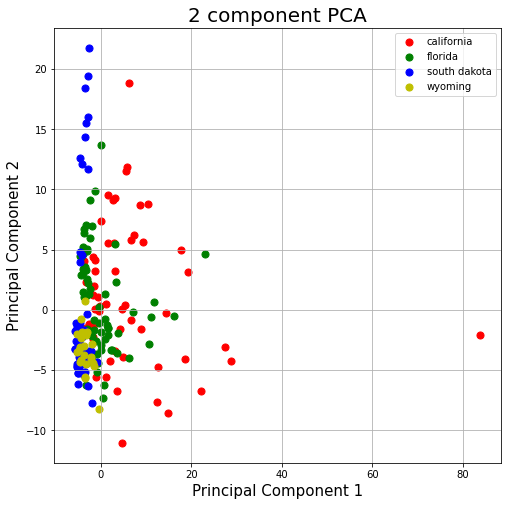

In [153]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA - County Complete', fontsize = 20)
targets = ['california', 'florida', 'south dakota', 'wyoming']
colors = ['r', 'g', 'b','y']
for target, color in zip(targets,colors):
    indicesToKeep = compDF['state'] == target
    ax.scatter(compDF.loc[indicesToKeep, 'PC1']
               , compDF.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

CountyData : 

In [154]:
countyData

fips    state      county  land area  water area  date  population
0      1001  alabama     autauga     1543.7        22.0  1990       34222
1      1003  alabama     baldwin     4135.0      1115.1  1990       98280
2      1005  alabama     barbour     2292.1        50.7  1990       25417
3      1007  alabama        bibb     1611.9         8.1  1990       16576
4      1009  alabama      blount     1672.3        12.9  1990       39248
...     ...      ...         ...        ...         ...   ...         ...
2936  56037  wyoming  sweetwater    27003.0       170.0  1990       38823
2937  56039  wyoming       teton    10380.6       554.3  1990       11172
2938  56041  wyoming       uinta     5391.7        15.3  1990       18705
2939  56043  wyoming    washakie     5802.0         7.0  1990        8388
2940  56045  wyoming      weston     6210.6         5.7  1990        6518

[2941 rows x 7 columns]

In [156]:
ncd = countyData.copy()
ncd = ncd[ncd['state'].isin(['california', 'florida', 'south dakota', 'wyoming'])]
ncd.reset_index(drop=True,inplace=True)

In [157]:
ncd = countyData.copy()
for col in ncd.columns:
    if ncd[col].dtype == 'object':
        ncd[col] = pd.factorize(ncd[col])[0]
ncd = pd.DataFrame(StandardScaler().fit_transform(ncd), columns=ncd.columns)
ncd

fips     state    county  land area  water area  date  population
0    -1.942674 -1.698598 -1.246086  -0.290689   -0.188071   0.0   -0.158631
1    -1.942541 -1.698598 -1.244089   0.489865    2.430236   0.0    0.082336
2    -1.942407 -1.698598 -1.242093  -0.065255   -0.119325   0.0   -0.191753
3    -1.942274 -1.698598 -1.240097  -0.270145   -0.221365   0.0   -0.225010
4    -1.942141 -1.698598 -1.238100  -0.251952   -0.209868   0.0   -0.139725
...        ...       ...       ...        ...         ...   ...         ...
2936  1.730594  1.734236  2.139931   7.378187    0.166434   0.0   -0.141324
2937  1.730728  1.734236 -0.363645   2.371171    1.086949   0.0   -0.245339
2938  1.730861  1.734236  2.141928   0.868410   -0.204119   0.0   -0.217002
2939  1.730995  1.734236  2.143924   0.992001   -0.224000   0.0   -0.255811
2940  1.731128  1.734236  2.145921   1.115080   -0.227114   0.0   -0.262846

[2941 rows x 7 columns]

In [159]:
cdpca = PCA(n_components=7).fit(ncd)
per_var2 = np.round(cdpca.explained_variance_ratio_ * 100, decimals= 1)
labels2 = ['PC' + str(x) for x in range(1,len(per_var2)+1)]
ncdDF = pd.DataFrame(cdpca.transform(ncd), columns = labels2)
ncdDF

PC1       PC2       PC3       PC4       PC5       PC6  PC7
0     2.851242 -0.381841 -0.029324 -0.091771 -0.204587  0.174538  0.0
1     2.827894  1.749168 -0.538437 -1.727197  0.012878  0.171434  0.0
2     2.839862 -0.257559  0.144689 -0.194737 -0.190478  0.173063  0.0
3     2.844112 -0.435015  0.016563 -0.122713 -0.210183  0.174337  0.0
4     2.846768 -0.365216  0.010291 -0.069592 -0.210832  0.173827  0.0
...        ...       ...       ...       ...       ...       ...  ...
2936 -3.428057  3.458611  6.311159 -1.210326 -0.236897 -0.043185  0.0
2937 -2.042035  1.531687  1.546166 -1.062887  1.721279 -0.014380  0.0
2938 -3.220436  0.220521  0.788318 -0.053591 -0.624537 -0.000281  0.0
2939 -3.227423  0.239826  0.913031 -0.088046 -0.620369 -0.001072  0.0
2940 -3.232830  0.289512  1.023572 -0.109695 -0.615370 -0.001957  0.0

[2941 rows x 7 columns]

In [164]:
states = countyData[countyData['state'].isin(['california', 'florida', 'south dakota', 'wyoming'])]
states.reset_index(drop=True,inplace=True)
ncdDF2 = pd.concat([states[['state']], ncdDF], axis = 1)
ncdDF2

state       PC1       PC2       PC3       PC4       PC5       PC6  \
0     california  2.851242 -0.381841 -0.029324 -0.091771 -0.204587  0.174538   
1     california  2.827894  1.749168 -0.538437 -1.727197  0.012878  0.171434   
2     california  2.839862 -0.257559  0.144689 -0.194737 -0.190478  0.173063   
3     california  2.844112 -0.435015  0.016563 -0.122713 -0.210183  0.174337   
4     california  2.846768 -0.365216  0.010291 -0.069592 -0.210832  0.173827   
...          ...       ...       ...       ...       ...       ...       ...   
2936         NaN -3.428057  3.458611  6.311159 -1.210326 -0.236897 -0.043185   
2937         NaN -2.042035  1.531687  1.546166 -1.062887  1.721279 -0.014380   
2938         NaN -3.220436  0.220521  0.788318 -0.053591 -0.624537 -0.000281   
2939         NaN -3.227423  0.239826  0.913031 -0.088046 -0.620369 -0.001072   
2940         NaN -3.232830  0.289512  1.023572 -0.109695 -0.615370 -0.001957   

      PC7  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  
...   ...  
2936  0.0  
2937  0.0  
2938  0.0  
2939  0.0  
2940  0.0  

[2941 rows x 8 columns]

In [165]:
ncdDF2.state.unique()

array(['california', 'florida', 'south dakota', 'wyoming', nan],
      dtype=object)

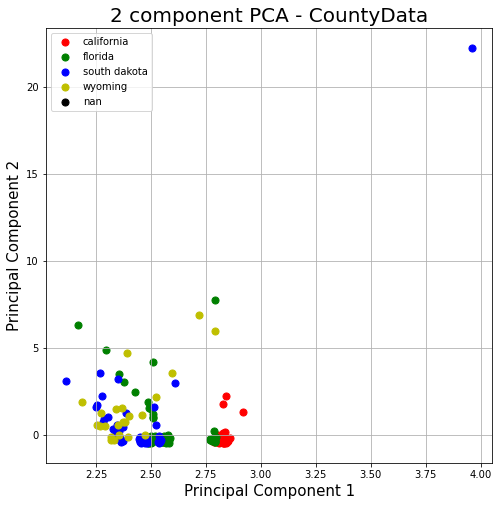

In [166]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA - CountyData', fontsize = 20)
targets = ['california', 'florida', 'south dakota', 'wyoming', np.nan]
colors = ['r', 'g', 'b','y', 'black']
for target, color in zip(targets,colors):
    indicesToKeep = ncdDF2['state'] == target
    ax.scatter(ncdDF2.loc[indicesToKeep, 'PC1']
               , ncdDF2.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [169]:
loading_scores3 = pd.Series(cdpca.components_[0], index= ncd.columns)
sorted_loading_scores3 = loading_scores3.abs().sort_values(ascending=False)
top10Features3 = sorted_loading_scores3[0:10].index.values
print(loading_scores3[top10Features3])

fips         -0.614235
state        -0.613872
county       -0.492145
population    0.051024
land area    -0.032462
water area   -0.003529
date         -0.000000
dtype: float64


Life Expectancy : 

In [170]:
life

fips    state   county  year  male life expectancy (years)  \
0       1001  alabama  autauga  1987                          69.2   
1       1001  alabama  autauga  1988                          69.3   
2       1001  alabama  autauga  1989                          69.8   
3       1001  alabama  autauga  1990                          69.7   
4       1001  alabama  autauga  1991                          70.0   
...      ...      ...      ...   ...                           ...   
66082  56045  wyoming   weston  2003                          75.0   
66083  56045  wyoming   weston  2004                          75.4   
66084  56045  wyoming   weston  2005                          75.4   
66085  56045  wyoming   weston  2006                          75.6   
66086  56045  wyoming   weston  2007                          75.9   

      years behind international frontier (male)  \
0                                             32   
1                                             32   
2                                             25   
3                                             27   
4                                             25   
...                                          ...   
66082                                         12   
66083                                         11   
66084                                         12   
66085                                         12   
66086                                         12   

       female life expectancy (years)  \
0                                77.4   
1                                77.3   
2                                77.5   
3                                77.7   
4                                77.7   
...                               ...   
66082                            80.5   
66083                            80.6   
66084                            80.7   
66085                            81.1   
66086                            81.5   

      years behind international frontier (female)  \
0                                               12   
1                                               14   
2                                               14   
3                                               14   
4                                               15   
...                                            ...   
66082                                           14   
66083                                           15   
66084                                           15   
66085                                           14   
66086                                           13   

       white male life expectancy (years)  \
0                                    70.3   
1                                    70.5   
2                                    71.0   
3                                    71.0   
4                                    71.2   
...                                   ...   
66082                                74.9   
66083                                75.4   
66084                                75.4   
66085                                75.6   
66086                                75.9   

       white female life expectancy (years)  ...  \
0                                      78.5  ...   
1                                      78.4  ...   
2                                      78.6  ...   
3                                      78.7  ...   
4                                      78.8  ...   
...                                     ...  ...   
66082                                  80.5  ...   
66083                                  80.5  ...   
66084                                  80.7  ...   
66085                                  81.1  ...   
66086                                  81.5  ...   

       closest ranked countries for male life expectancy (lower)  \
0      albania,bahrain,guam,jamaica,macedonia, the fo...           
1      albania,jamaica,macedonia, the former yugoslav...           
2      albania,bahrain,guam,ma

In [171]:
nlife = life.copy()
nlife = nlife[nlife['state'].isin(['california', 'florida', 'south dakota', 'wyoming'])]
nlife.reset_index(drop=True,inplace=True)
nlife

fips       state   county  year  male life expectancy (years)  \
0      6001  california  alameda  1987                          71.6   
1      6001  california  alameda  1988                          71.6   
2      6001  california  alameda  1989                          71.5   
3      6001  california  alameda  1990                          71.9   
4      6001  california  alameda  1991                          72.1   
...     ...         ...      ...   ...                           ...   
4489  56045     wyoming   weston  2003                          75.0   
4490  56045     wyoming   weston  2004                          75.4   
4491  56045     wyoming   weston  2005                          75.4   
4492  56045     wyoming   weston  2006                          75.6   
4493  56045     wyoming   weston  2007                          75.9   

     years behind international frontier (male)  \
0                                            12   
1                                            12   
2                                            14   
3                                            13   
4                                            13   
...                                         ...   
4489                                         12   
4490                                         11   
4491                                         12   
4492                                         12   
4493                                         12   

      female life expectancy (years)  \
0                               78.1   
1                               78.0   
2                               78.2   
3                               78.4   
4                               78.7   
...                              ...   
4489                            80.5   
4490                            80.6   
4491                            80.7   
4492                            81.1   
4493                            81.5   

     years behind international frontier (female)  \
0                                              10   
1                                              11   
2                                              11   
3                                              12   
4                                              11   
...                                           ...   
4489                                           14   
4490                                           15   
4491                                           15   
4492                                           14   
4493                                           13   

      white male life expectancy (years)  \
0                                   72.1   
1                                   72.2   
2                                   72.1   
3                                   72.5   
4                                   72.7   
...                                  ...   
4489                                74.9   
4490                                75.4   
4491                                75.4   
4492                                75.6   
4493                                75.9   

      white female life expectancy (years)  ...  \
0                                     78.6  ...   
1                                     78.6  ...   
2                                     78.8  ...   
3                                     79.0  ...   
4                                     79.2  ...   
...                                    ...  ...   
4489                                  80.5  ...   
4490                                  80.5  ...   
4491                                  80.7  ...   
4492                                  81.1  ...   
4493                                  81.5  ...   

      closest ranked countries for male life expectancy (lower)  \
0     barbados,germany,ireland,netherlands antilles,...           
1     aruba,austria,netherlands antilles,singapore,u...           
2     aruba,finland,guadeloupe,luxembourg,virgin isl...           
3

In [174]:
nnlife = nlife.copy()
for col in nnlife.columns:
    if nnlife[col].dtype == 'object':
        nnlife[col] = pd.factorize(nnlife[col])[0]

In [175]:
lfscaled = pd.DataFrame(StandardScaler().fit_transform(nnlife), columns= nlife.columns)

In [176]:
lifepca = PCA(n_components=5).fit(lfscaled)
per_var4 = np.round(lifepca.explained_variance_ratio_ * 100, decimals= 1)
labels4 = ['PC' + str(x) for x in range(1,len(per_var4)+1)]
lifePcaDF = pd.DataFrame(lifepca.transform(lfscaled), columns = labels4)
lifePcaDF

PC1       PC2       PC3       PC4       PC5
0     2.235689  4.434735 -3.614656  2.422027  1.385105
1     2.177542  4.482998 -3.527317  2.328437  1.334714
2     2.205513  4.462234 -3.426428  2.250725  1.289718
3     2.455822  4.392868 -3.207508  2.035737  1.182018
4     2.711721  4.260365 -3.095504  1.891819  1.123355
...        ...       ...       ...       ...       ...
4489  0.728112 -3.026469  1.222870  0.334806  0.131530
4490  0.702903 -3.162869  1.527003  0.855603 -1.138693
4491  1.269618 -3.301538  0.467839 -0.173868 -0.053236
4492  1.585737 -3.449993  0.673219 -0.356272 -0.075756
4493  1.173348 -3.379952  2.879027  0.645889 -1.646874

[4494 rows x 5 columns]

In [177]:
lifePcaDF = pd.concat([nlife[['state']], lifePcaDF], axis = 1)
lifePcaDF

state       PC1       PC2       PC3       PC4       PC5
0     california  2.235689  4.434735 -3.614656  2.422027  1.385105
1     california  2.177542  4.482998 -3.527317  2.328437  1.334714
2     california  2.205513  4.462234 -3.426428  2.250725  1.289718
3     california  2.455822  4.392868 -3.207508  2.035737  1.182018
4     california  2.711721  4.260365 -3.095504  1.891819  1.123355
...          ...       ...       ...       ...       ...       ...
4489     wyoming  0.728112 -3.026469  1.222870  0.334806  0.131530
4490     wyoming  0.702903 -3.162869  1.527003  0.855603 -1.138693
4491     wyoming  1.269618 -3.301538  0.467839 -0.173868 -0.053236
4492     wyoming  1.585737 -3.449993  0.673219 -0.356272 -0.075756
4493     wyoming  1.173348 -3.379952  2.879027  0.645889 -1.646874

[4494 rows x 6 columns]

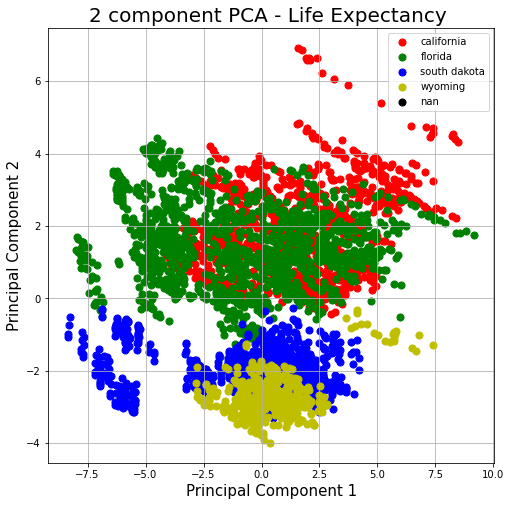

In [178]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA - Life Expectancy ', fontsize = 20)
targets = ['california', 'florida', 'south dakota', 'wyoming', np.nan]
colors = ['r', 'g', 'b','y', 'black']
for target, color in zip(targets,colors):
    indicesToKeep = lifePcaDF['state'] == target
    ax.scatter(lifePcaDF.loc[indicesToKeep, 'PC1']
               , lifePcaDF.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [180]:
loading_scores5 = pd.Series(lifepca.components_[0], index= nlife.columns)
sorted_loading_scores5 = loading_scores5.abs().sort_values(ascending=False)
top10Features5 = sorted_loading_scores5[0:10].index.values
print(loading_scores5[top10Features5])

rank (male)                                          -0.301151
white female life expectancy (years)                  0.298200
male life expectancy (years)                          0.292480
white male life expectancy (years)                    0.289211
female life expectancy change 1987 to 2007 (years)    0.288658
female life expectancy (years)                        0.286506
rank (female)                                        -0.271495
male life expectancy change 1987 to 2007 (years)      0.268578
female life expectancy change 1987 to 1997 (years)    0.251781
female life expectancy change 1997 to 2007 (years)    0.246571
dtype: float64


In [182]:
topDF = pd.merge(states[['fips', 'state', 'county']],
                 pd.merge(nlife[['fips', 'county', 'state', 'rank (male)', 'white female life expectancy (years)', 'male life expectancy (years)', 'white male life expectancy (years)', 'female life expectancy change 1987 to 2007 (years)']],
                         fcomplete[['fips', 'state', 'households_2019', 'employed_2015','civilian_labor_force_2016', 'civilian_labor_force_2017', 'civilian_labor_force_2015']]))
topDF

fips       state   county  rank (male)  \
0      6001  california  alameda         1444   
1      6001  california  alameda         1538   
2      6001  california  alameda         1709   
3      6001  california  alameda         1547   
4      6001  california  alameda         1515   
...     ...         ...      ...          ...   
4258  56045     wyoming   weston          957   
4259  56045     wyoming   weston          779   
4260  56045     wyoming   weston          883   
4261  56045     wyoming   weston          843   
4262  56045     wyoming   weston          727   

      white female life expectancy (years)  male life expectancy (years)  \
0                                     78.6                          71.6   
1                                     78.6                          71.6   
2                                     78.8                          71.5   
3                                     79.0                          71.9   
4                                     79.2                          72.1   
...                                    ...                           ...   
4258                                  80.5                          75.0   
4259                                  80.5                          75.4   
4260                                  80.7                          75.4   
4261                                  81.1                          75.6   
4262                                  81.5                          75.9   

      white male life expectancy (years)  \
0                                   72.1   
1                                   72.2   
2                                   72.1   
3                                   72.5   
4                                   72.7   
...                                  ...   
4258                                74.9   
4259                                75.4   
4260                                75.4   
4261                                75.6   
4262                                75.9   

      female life expectancy change 1987 to 2007 (years)  households_2019  \
0                                                   4.2          577177.0   
1                                                   4.2          577177.0   
2                                                   4.2          577177.0   
3                                                   4.2          577177.0   
4                                                   4.2          577177.0   
...                                                 ...               ...   
4258                                                1.7            2891.0   
4259                                                1.7            2891.0   
4260                                                1.7            2891.0   
4261                                                1.7            2891.0   
4262                                                1.7            2891.0   

      employed_2015  civilian_labor_force_2016  civilian_labor_force_2017  \
0          784217.0                   837583.0                   848335.0   
1          784217.0                   837583.0                   848335.0   
2          784217.0                   837583.0                   848335.0   
3          784217.0                   837583.0                   848335.0   
4          784217.0                   837583.0                   848335.0   
...             ...                        ...                        ...   
4258         3834.0                     3965.0                     3771.0   
4259         3834.0                     3965.0                     3771.0   
4260         3834.0                     3965.0                     3771.0   
4261         3834.0                     3965.0                     3771.0   
4262         3834.0                     3965.0                     3771.0   

      civilian_labor_force_2015  
0                      823130.0  
1                      823130.0  
2                      8

In [183]:
ntopDF = topDF.copy()
for col in ntopDF.columns:
    if ntopDF[col].dtype == 'object':
        ntopDF[col] = pd.factorize(ntopDF[col])[0]
ntopDF = pd.DataFrame(StandardScaler().fit_transform(ntopDF), columns=ntopDF.columns)
ntopDF

fips     state    county  rank (male)  \
0    -0.994517 -1.292797 -1.695422     0.272777   
1    -0.994517 -1.292797 -1.695422     0.383143   
2    -0.994517 -1.292797 -1.695422     0.583915   
3    -0.994517 -1.292797 -1.695422     0.393710   
4    -0.994517 -1.292797 -1.695422     0.356139   
...        ...       ...       ...          ...   
4258  1.536376  1.782646  1.743077    -0.299011   
4259  1.536376  1.782646  1.743077    -0.508001   
4260  1.536376  1.782646  1.743077    -0.385895   
4261  1.536376  1.782646  1.743077    -0.432859   
4262  1.536376  1.782646  1.743077    -0.569055   

      white female life expectancy (years)  male life expectancy (years)  \
0                                -1.089796                     -0.889447   
1                                -1.089796                     -0.889447   
2                                -0.923744                     -0.937327   
3                                -0.757692                     -0.745809   
4                                -0.591640                     -0.650050   
...                                    ...                           ...   
4258                              0.487697                      0.738453   
4259                              0.487697                      0.929970   
4260                              0.653749                      0.929970   
4261                              0.985853                      1.025729   
4262                              1.317957                      1.169367   

      white male life expectancy (years)  \
0                              -0.748580   
1                              -0.699014   
2                              -0.748580   
3                              -0.550317   
4                              -0.451185   
...                                  ...   
4258                            0.639263   
4259                            0.887092   
4260                            0.887092   
4261                            0.986224   
4262                            1.134921   

      female life expectancy change 1987 to 2007 (years)  households_2019  \
0                                              2.168689          1.722256   
1                                              2.168689          1.722256   
2                                              2.168689          1.722256   
3                                              2.168689          1.722256   
4                                              2.168689          1.722256   
...                                                 ...               ...   
4258                                          -0.034734         -0.326247   
4259                                          -0.034734         -0.326247   
4260                                          -0.034734         -0.326247   
4261                                          -0.034734         -0.326247   
4262                                          -0.034734         -0.326247   

      employed_2015  civilian_labor_force_2016  civilian_labor_force_2017  \
0          1.704367                   1.685187                   1.682577   
1          1.704367                   1.685187                   1.682577   
2          1.704367                   1.685187                   1.682577   
3          1.704367                   1.685187                   1.682577   
4          1.704367                   1.685187                   1.682577   
...             ...                        ...                        ...   
4258      -0.300324                  -0.300688                  -0.301444   
4259      -0.300324                  -0.300688                  -0.301444   
4260      -0.300324                  -0.300688                  -0.301444   
4261      -0.300324                  -0.300688                  -0.301444   
4262      -0.300324                  -0.300688                  -0.301444   

      civilian_labor_force_2015  
0                      1.674377  
1                      1.674377  
2  

In [184]:
toppca = PCA(n_components=10).fit(ntopDF)
per_var6 = np.round(toppca.explained_variance_ratio_ * 100, decimals= 1)
labels6 = ['PC' + str(x) for x in range(1,len(per_var6)+1)]
topPcaDF = pd.DataFrame(toppca.transform(ntopDF), columns = labels6)
topPcaDF

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     4.082790  2.473945 -0.324879  1.912858 -0.478343  0.427408  0.456770   
1     4.076047  2.501004 -0.326608  1.887398 -0.388557  0.480950  0.496473   
2     4.057014  2.557305 -0.312479  1.884809 -0.176302  0.383997  0.584514   
3     4.167776  2.239772 -0.404217  1.761155 -0.204045  0.361948  0.555267   
4     4.227130  2.070157 -0.453873  1.686301 -0.138405  0.308802  0.571605   
...        ...       ...       ...       ...       ...       ...       ...   
4258 -1.176240 -2.244319  1.894844 -0.126827  0.340810  0.420539  0.014152   
4259 -1.078254 -2.519153  1.807959 -0.248485  0.234020  0.532016 -0.042302   
4260 -1.071265 -2.537821  1.800882 -0.275240  0.397949  0.449902  0.022114   
4261 -0.987083 -2.782662  1.734909 -0.363761  0.535986  0.274890  0.056303   
4262 -0.875445 -3.107016  1.646988 -0.475398  0.618340  0.111523  0.063126   

           PC8       PC9      PC10  
0     0.047968  0.123221  0.069004  
1     0.054592  0.148776  0.071614  
2     0.136168  0.153301  0.067797  
3     0.107815  0.149130  0.065696  
4     0.122374  0.148324  0.062881  
...        ...       ...       ...  
4258 -0.021307 -0.077132 -0.013028  
4259 -0.104481 -0.058733 -0.009092  
4260 -0.045023 -0.055961 -0.012570  
4261 -0.008086 -0.057960 -0.019833  
4262  0.003752 -0.062031 -0.026834  

[4263 rows x 10 columns]

In [185]:
topPcaDF = pd.concat([topDF[['state']], topPcaDF], axis = 1)
topPcaDF

state       PC1       PC2       PC3       PC4       PC5       PC6  \
0     california  4.082790  2.473945 -0.324879  1.912858 -0.478343  0.427408   
1     california  4.076047  2.501004 -0.326608  1.887398 -0.388557  0.480950   
2     california  4.057014  2.557305 -0.312479  1.884809 -0.176302  0.383997   
3     california  4.167776  2.239772 -0.404217  1.761155 -0.204045  0.361948   
4     california  4.227130  2.070157 -0.453873  1.686301 -0.138405  0.308802   
...          ...       ...       ...       ...       ...       ...       ...   
4258     wyoming -1.176240 -2.244319  1.894844 -0.126827  0.340810  0.420539   
4259     wyoming -1.078254 -2.519153  1.807959 -0.248485  0.234020  0.532016   
4260     wyoming -1.071265 -2.537821  1.800882 -0.275240  0.397949  0.449902   
4261     wyoming -0.987083 -2.782662  1.734909 -0.363761  0.535986  0.274890   
4262     wyoming -0.875445 -3.107016  1.646988 -0.475398  0.618340  0.111523   

           PC7       PC8       PC9      PC10  
0     0.456770  0.047968  0.123221  0.069004  
1     0.496473  0.054592  0.148776  0.071614  
2     0.584514  0.136168  0.153301  0.067797  
3     0.555267  0.107815  0.149130  0.065696  
4     0.571605  0.122374  0.148324  0.062881  
...        ...       ...       ...       ...  
4258  0.014152 -0.021307 -0.077132 -0.013028  
4259 -0.042302 -0.104481 -0.058733 -0.009092  
4260  0.022114 -0.045023 -0.055961 -0.012570  
4261  0.056303 -0.008086 -0.057960 -0.019833  
4262  0.063126  0.003752 -0.062031 -0.026834  

[4263 rows x 11 columns]

In [187]:
loading_scores6 = pd.Series(toppca.components_[0], index= topDF.columns)
sorted_loading_scores6 = loading_scores6.abs().sort_values(ascending=False)
top10Features6 = sorted_loading_scores6[0:10].index.values
print(loading_scores6[top10Features6])

households_2019                                       0.390954
employed_2015                                         0.389889
civilian_labor_force_2016                             0.389676
civilian_labor_force_2017                             0.389675
civilian_labor_force_2015                             0.389549
female life expectancy change 1987 to 2007 (years)    0.239753
state                                                -0.182816
county                                               -0.180209
fips                                                 -0.167646
white male life expectancy (years)                    0.166015
dtype: float64


In [188]:
bottom10Features2 = sorted_loading_scores6[-10:].index.values
print(loading_scores6[bottom10Features2])

civilian_labor_force_2017                             0.389675
civilian_labor_force_2015                             0.389549
female life expectancy change 1987 to 2007 (years)    0.239753
state                                                -0.182816
county                                               -0.180209
fips                                                 -0.167646
white male life expectancy (years)                    0.166015
male life expectancy (years)                          0.148770
white female life expectancy (years)                  0.141845
rank (male)                                          -0.135653
dtype: float64


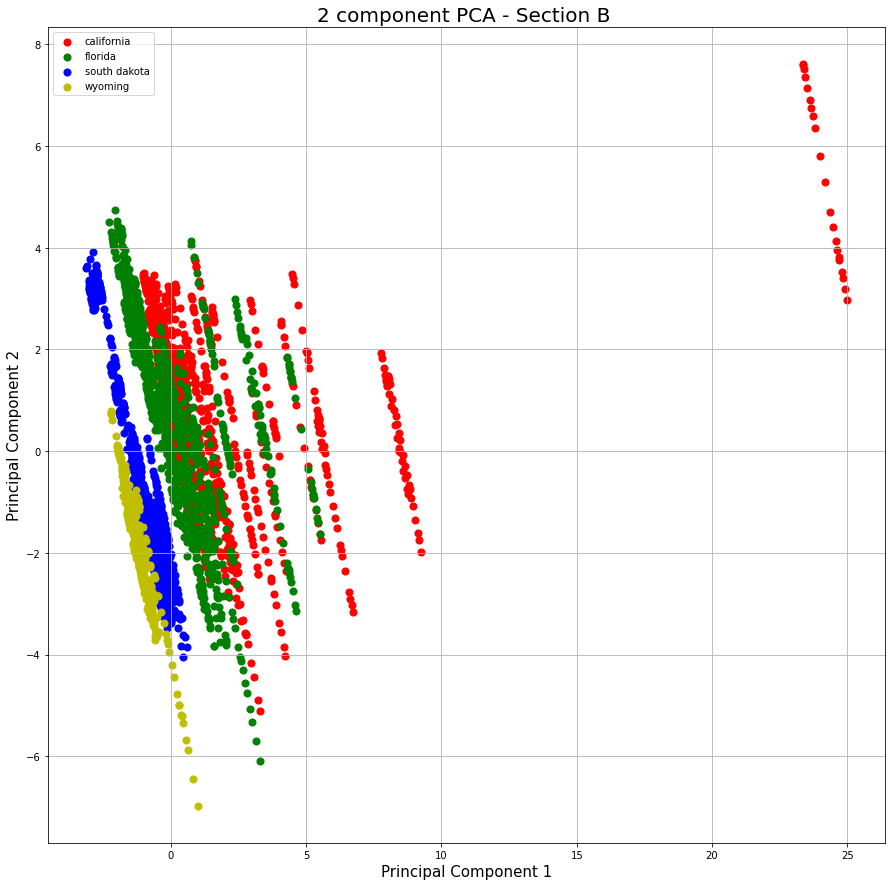

In [189]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA - Section B ', fontsize = 20)
targets = ['california', 'florida', 'south dakota', 'wyoming']
colors = ['r', 'g', 'b','y']
for target, color in zip(targets,colors):
    indicesToKeep = topPcaDF['state'] == target
    ax.scatter(topPcaDF.loc[indicesToKeep, 'PC1']
               , topPcaDF.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### PCA overview :

Now that we merged only top features from each dataframe, we already reduced from 214 to 13 features and that improved the result, now top 2 pcs covers ~78% in compare with before (~23%).

We can notice that wyoming and south dakota form a cluster, and california with florida make another cluster.

Califorina have some outlayer counties which differs by folds from the rest of california counties (on top right of the graph).

Though the two principal component used covers ~78%, the spearation between the 4 states is not that significant.

### Second Algorithm T-SNE

In [190]:
tsne = TSNE()
stsne = tsne.fit_transform(ntopDF)
stsne

C:\Users\lover\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\lover\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


array([[ 58.56721 , -34.618355],
       [ 58.568516, -34.62335 ],
       [ 58.570873, -34.63745 ],
       ...,
       [-27.063814,  66.90498 ],
       [-27.859016,  65.35779 ],
       [-29.66391 ,  62.852104]], dtype=float32)

In [192]:
stsne = pd.DataFrame(stsne, columns=['PC1', 'PC2'])
stsne = pd.concat([stsne,topDF[['state']]], axis = 1)
stsne

PC1        PC2       state
0     58.567211 -34.618355  california
1     58.568516 -34.623348  california
2     58.570873 -34.637451  california
3     58.289040 -34.690372  california
4     58.094250 -34.738884  california
...         ...        ...         ...
4258 -24.568171  69.119446     wyoming
4259 -27.116047  67.679237     wyoming
4260 -27.063814  66.904984     wyoming
4261 -27.859016  65.357788     wyoming
4262 -29.663910  62.852104     wyoming

[4263 rows x 3 columns]

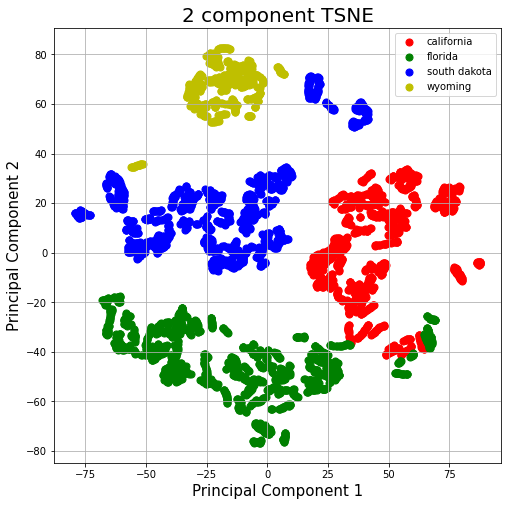

In [193]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component TSNE', fontsize = 20)
targets = ['california', 'florida', 'south dakota', 'wyoming']
colors = ['r', 'g', 'b','y']
for target, color in zip(targets,colors):
    indicesToKeep = stsne['state'] == target
    ax.scatter(stsne.loc[indicesToKeep, 'PC1']
               , stsne.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### TSNE overview:

TSNE doesn't support explained_variance_ratio_ so we cannot tell which features are used, more important or less important. But surprisngly enough we can see a way better sepearation between the 4 states.

Less outlayer counties in california, some outlayers in south dakota and wyoming.

Still we can see wyoming is more similiar to south dakota, florida more similiar to california.

# Section C - Regression:

In [194]:
# show the us election results dataframes
print("House")
display(house.head())
print("President")
display(president.head())
print("Senate")
display(senate.head())

House


year    state state_po  state_fips  state_cen  state_ic    office  \
0  1976  alabama       al           1         63        41  us house   
1  1976  alabama       al           1         63        41  us house   
2  1976  alabama       al           1         63        41  us house   
3  1976  alabama       al           1         63        41  us house   
4  1976  alabama       al           1         63        41  us house   

   district stage runoff  special                   candidate       party  \
0         1   gen  False    False              bill davenport    democrat   
1         1   gen  False    False                jack edwards  republican   
2         1   gen  False    False                     writein     unknown   
3         2   gen  False    False             j carole keahey    democrat   
4         2   gen  False    False  william l "bill" dickinson  republican   

   writein   mode  candidatevotes  totalvotes  unofficial   version  \
0    False  total           58906      157170       False  20220331   
1    False  total           98257      157170       False  20220331   
2     True  total               7      157170       False  20220331   
3    False  total           66288      156362       False  20220331   
4    False  total           90069      156362       False  20220331   

   fusion_ticket  
0          False  
1          False  
2          False  
3          False  
4          False

President


year    state state_po  state_fips  state_cen  state_ic        office  \
0  1976  alabama       al           1         63        41  us president   
1  1976  alabama       al           1         63        41  us president   
2  1976  alabama       al           1         63        41  us president   
3  1976  alabama       al           1         63        41  us president   
4  1976  alabama       al           1         63        41  us president   

                 candidate              party_detailed writein  \
0            carter, jimmy                    democrat   False   
1             ford, gerald                  republican   False   
2           maddox, lester  american independent party   False   
3  bubar, benjamin ""ben""                 prohibition   False   
4                hall, gus         communist party use   False   

   candidatevotes  totalvotes   version party_simplified  
0          659170     1182850  20210113         democrat  
1          504070     1182850  20210113       republican  
2            9198     1182850  20210113            other  
3            6669     1182850  20210113            other  
4            1954     1182850  20210113            other

Senate


year    state state_po  state_fips  state_cen  state_ic     office  \
0  1976  ARIZONA       AZ           4         86        61  US SENATE   
1  1976  ARIZONA       AZ           4         86        61  US SENATE   
2  1976  ARIZONA       AZ           4         86        61  US SENATE   
3  1976  ARIZONA       AZ           4         86        61  US SENATE   
4  1976  ARIZONA       AZ           4         86        61  US SENATE   

    district stage  special            candidate party_detailed  writein  \
0  statewide   gen    False          SAM STEIGER     REPUBLICAN    False   
1  statewide   gen    False  WM. MATHEWS FEIGHAN    INDEPENDENT    False   
2  statewide   gen    False     DENNIS DECONCINI       DEMOCRAT    False   
3  statewide   gen    False        ALLAN NORWITZ    LIBERTARIAN    False   
4  statewide   gen    False            BOB FIELD    INDEPENDENT    False   

    mode  candidatevotes  totalvotes  unofficial   version party_simplified  
0  total          321236      741210       False  20210114       REPUBLICAN  
1  total            1565      741210       False  20210114            OTHER  
2  total          400334      741210       False  20210114         DEMOCRAT  
3  total            7310      741210       False  20210114      LIBERTARIAN  
4  total           10765      741210       False  20210114            OTHER

In [383]:
houseg = house.groupby(['state', 'year'], as_index=False).sum()
houseg

state  year  state_fips  state_cen  state_ic  district  special  \
0     alabama  1976          19       1197       779        72        0   
1     alabama  1978          16       1008       656        68        0   
2     alabama  1980          23       1449       943        98        0   
3     alabama  1982          19       1197       779        80        0   
4     alabama  1984          16       1008       656        66        0   
...       ...   ...         ...        ...       ...       ...      ...   
1146  wyoming  2012         448        664       544         0        0   
1147  wyoming  2014         392        581       476         0        0   
1148  wyoming  2016         392        581       476         0        0   
1149  wyoming  2018         280        415       340         0        0   
1150  wyoming  2020         392        581       476         0        0   

      writein  candidatevotes  totalvotes  unofficial    version  \
0           6          984181     2728482           0  384186289   
1           3          642279     1438662           0  323525296   
2           3         1013626     3517307           0  465067613   
3           3          961019     2629352           0  384186289   
4           0         1148574     2812277           0  323525296   
...       ...             ...         ...         ...        ...   
1146        1          250700     2005600           0  161762648   
1147        1          171153     1198071           0  141542317   
1148        1          258788     1811516           0  141542317   
1149        1          201245     1006225           0  101101655   
1150        1          278503     1949521           0  141542317   

      fusion_ticket  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
1146              0  
1147              0  
1148              0  
1149              0  
1150              0  

[1151 rows x 13 columns]

In [384]:
houseg.head(20)

state  year  state_fips  state_cen  state_ic  district  special  \
0   alabama  1976          19       1197       779        72        0   
1   alabama  1978          16       1008       656        68        0   
2   alabama  1980          23       1449       943        98        0   
3   alabama  1982          19       1197       779        80        0   
4   alabama  1984          16       1008       656        66        0   
5   alabama  1986          14        882       574        61        0   
6   alabama  1988          25       1575      1025       103        0   
7   alabama  1990          19       1197       779        79        0   
8   alabama  1992          34       2142      1394       143        0   
9   alabama  1994          20       1260       820        80        0   
10  alabama  1996          31       1953      1271       126        0   
11  alabama  1998          19       1197       779        76        0   
12  alabama  2000          24       1512       984        97        0   
13  alabama  2002          25       1575      1025        95        0   
14  alabama  2004          20       1260       820        78        0   
15  alabama  2006          19       1197       779        69        0   
16  alabama  2008          18       1134       738        70        0   
17  alabama  2010          19       1197       779        74        0   
18  alabama  2012          20       1260       820        83        0   
19  alabama  2014          19       1197       779        73        0   

    writein  candidatevotes  totalvotes  unofficial    version  fusion_ticket  
0         6          984181     2728482           0  384186289              0  
1         3          642279     1438662           0  323525296              0  
2         3         1013626     3517307           0  465067613              0  
3         3          961019     2629352           0  384186289              0  
4         0         1148574     2812277           0  323525296              0  
5         0         1115517     2326541           0  283084634              0  
6         7         1178298     4325872           0  505508275              0  
7         6         1015869     2834865           0  384186289              0  
8         7         1602536     7769922           0  687491254              0  
9         7         1115019     3223795           0  404406620              0  
10        7         1468693     6530225           0  626830261              0  
11        7         1215179     3392792           0  384186289              0  
12        7         1438994     4969357           0  485287944              0  
13        7         1268802     4549452           0  505508275              0  
14        7         1792759     5110234           0  404406620              0  
15        7         1140152     3138738           0  384186289              0  
16        7         1855268     4832499           0  363965958              0  
17        7         1367747     3724156           0  384186289              0  
18        7         1933630     5600214           0  404406620              0  
19        7         1080880     2971989           0  384186289              0

In [385]:
houseg.columns

Index(['state', 'year', 'state_fips', 'state_cen', 'state_ic', 'district',
       'special', 'writein', 'candidatevotes', 'totalvotes', 'unofficial',
       'version', 'fusion_ticket'],
      dtype='object')

In [386]:
houseg = houseg[['state', 'candidatevotes']]
houseg

state  candidatevotes
0     alabama          984181
1     alabama          642279
2     alabama         1013626
3     alabama          961019
4     alabama         1148574
...       ...             ...
1146  wyoming          250700
1147  wyoming          171153
1148  wyoming          258788
1149  wyoming          201245
1150  wyoming          278503

[1151 rows x 2 columns]

In [387]:
print(type(houseg))

<class 'pandas.core.frame.DataFrame'>


In [388]:
compg = complete.groupby(['state'], as_index=False).agg({'pop2010': 'sum', 'age_under_18_2010': 'mean'})
compg

state     pop2010  age_under_18_2010
0                alabama   4779736.0          23.479104
1                 alaska    710231.0          25.493103
2                arizona   6392017.0          25.306667
3               arkansas   2915918.0          23.542667
4             california  37253956.0          23.658621
5               colorado   5029196.0          22.057813
6            connecticut   3574097.0          22.125000
7               delaware    897934.0          22.833333
8   district of columbia    601723.0          16.800000
9                florida  18801310.0          20.776119
10               georgia   9687653.0          24.550314
11                hawaii   1360301.0          18.140000
12                 idaho   1567582.0          26.511364
13              illinois  12830632.0          22.741176
14               indiana   6483802.0          24.410870
15                  iowa   3046355.0          23.644444
16                kansas   2853118.0          24.143810
17              kentucky   4339367.0          23.425833
18             louisiana   4533372.0          24.717188
19                 maine   1328361.0          20.337500
20              maryland   5773552.0          22.825000
21         massachusetts   6547629.0          20.821429
22              michigan   9883640.0          21.756627
23             minnesota   5303925.0          23.708046
24           mississippi   2967297.0          25.182927
25              missouri   5988927.0          23.580870
26               montana    989415.0          22.301786
27              nebraska   1826341.0          23.709677
28                nevada   2700551.0          22.952941
29         new hampshire   1316470.0          20.600000
30            new jersey   8791894.0          23.428571
31            new mexico   2059179.0          23.624242
32              new york  19378102.0          21.903226
33        north carolina   9535483.0          22.575000
34          north dakota    672591.0          21.805660
35                  ohio  11536504.0          23.939773
36              oklahoma   3751351.0          24.337662
37                oregon   3831074.0          21.869444
38          pennsylvania  12702379.0          21.217910
39          rhode island   1052567.0          20.580000
40        south carolina   4625364.0          23.213043
41          south dakota    814180.0          25.281818
42             tennessee   6346105.0          22.808421
43                 texas  25145561.0          25.064173
44                  utah   2763885.0          31.079310
45               vermont    625741.0          20.785714
46              virginia   7994802.0          21.342105
47            washington   6724540.0          22.794872
48         west virginia   1852994.0          20.760000
49             wisconsin   5686986.0          22.684722
50               wyoming    563626.0          23.382609

In [389]:
compg['can_vote_2010'] = compg['pop2010'] * (1 -compg['age_under_18_2010']/100)
compg

state     pop2010  age_under_18_2010  can_vote_2010
0                alabama   4779736.0          23.479104   3.657497e+06
1                 alaska    710231.0          25.493103   5.291711e+05
2                arizona   6392017.0          25.306667   4.774411e+06
3               arkansas   2915918.0          23.542667   2.229433e+06
4             california  37253956.0          23.658621   2.844018e+07
5               colorado   5029196.0          22.057813   3.919865e+06
6            connecticut   3574097.0          22.125000   2.783328e+06
7               delaware    897934.0          22.833333   6.929057e+05
8   district of columbia    601723.0          16.800000   5.006335e+05
9                florida  18801310.0          20.776119   1.489513e+07
10               georgia   9687653.0          24.550314   7.309304e+06
11                hawaii   1360301.0          18.140000   1.113542e+06
12                 idaho   1567582.0          26.511364   1.151995e+06
13              illinois  12830632.0          22.741176   9.912795e+06
14               indiana   6483802.0          24.410870   4.901050e+06
15                  iowa   3046355.0          23.644444   2.326061e+06
16                kansas   2853118.0          24.143810   2.164267e+06
17              kentucky   4339367.0          23.425833   3.322834e+06
18             louisiana   4533372.0          24.717188   3.412850e+06
19                 maine   1328361.0          20.337500   1.058206e+06
20              maryland   5773552.0          22.825000   4.455739e+06
21         massachusetts   6547629.0          20.821429   5.184319e+06
22              michigan   9883640.0          21.756627   7.733293e+06
23             minnesota   5303925.0          23.708046   4.046468e+06
24           mississippi   2967297.0          25.182927   2.220045e+06
25              missouri   5988927.0          23.580870   4.576686e+06
26               montana    989415.0          22.301786   7.687578e+05
27              nebraska   1826341.0          23.709677   1.393321e+06
28                nevada   2700551.0          22.952941   2.080695e+06
29         new hampshire   1316470.0          20.600000   1.045277e+06
30            new jersey   8791894.0          23.428571   6.732079e+06
31            new mexico   2059179.0          23.624242   1.572714e+06
32              new york  19378102.0          21.903226   1.513367e+07
33        north carolina   9535483.0          22.575000   7.382848e+06
34          north dakota    672591.0          21.805660   5.259281e+05
35                  ohio  11536504.0          23.939773   8.774691e+06
36              oklahoma   3751351.0          24.337662   2.838360e+06
37                oregon   3831074.0          21.869444   2.993239e+06
38          pennsylvania  12702379.0          21.217910   1.000720e+07
39          rhode island   1052567.0          20.580000   8.359487e+05
40        south carolina   4625364.0          23.213043   3.551676e+06
41          south dakota    814180.0          25.281818   6.083405e+05
42             tennessee   6346105.0          22.808421   4.898659e+06
43                 texas  25145561.0          25.064173   1.884303e+07
44                  utah   2763885.0          31.079310   1.904889e+06
45               vermont    625741.0          20.785714   4.956763e+05
46              virginia   7994802.0          21.342105   6.288543e+06
47            washington   6724540.0          22.794872   5.191690e+06
48         west virginia   1852994.0          20.760000   1.468312e+06
49             wisconsin   5686986.0          22.684722   4.396909e+06
50               wyoming    563626.0          23.382609   4.318355e+05

In [390]:
print(type(compg))

<class 'pandas.core.frame.DataFrame'>


In [391]:
newtest = house.groupby(['state','year'], as_index=False).agg({'candidatevotes': 'sum'})
newtest = newtest.groupby('year').get_group((2010))
newtest

state  year  candidatevotes
17           alabama  2010         1367747
40            alaska  2010          254335
63           arizona  2010         1698145
86          arkansas  2010          774125
109       california  2010         9648096
132         colorado  2010         1763152
155      connecticut  2010         1138202
178         delaware  2010          305636
202          florida  2010         5117811
225          georgia  2010         2468680
248           hawaii  2010          360121
271            idaho  2010          447144
294         illinois  2010         3696159
317          indiana  2010         1747720
340             iowa  2010         1106591
363           kansas  2010          835529
386         kentucky  2010         1354298
409        louisiana  2010         1035948
432            maine  2010          564368
455         maryland  2010         1825472
478    massachusetts  2010         2224255
501         michigan  2010         3194901
524        minnesota  2010         2090701
547      mississippi  2010          788549
570         missouri  2010         1920675
593          montana  2010          360341
616         nebraska  2010          485546
639           nevada  2010          702788
662    new hampshire  2010          449787
685       new jersey  2010         2121584
708       new mexico  2010          596651
731         new york  2010         4753783
754   north carolina  2010         2662549
777     north dakota  2010          236344
800             ohio  2010         3825274
823         oklahoma  2010          792980
846           oregon  2010         1429356
869     pennsylvania  2010         3956401
892     rhode island  2010          335484
915   south carolina  2010         1340189
938     south dakota  2010          319426
961        tennessee  2010         1559129
984            texas  2010         4745545
1007            utah  2010          640495
1030         vermont  2010          238521
1053        virginia  2010         2189841
1076      washington  2010         2479409
1099   west virginia  2010          514373
1122       wisconsin  2010         2140482
1145         wyoming  2010          190822

In [392]:
fullh = pd.merge(compg, newtest, on=['state'], how='outer')
fullh

state     pop2010  age_under_18_2010  can_vote_2010  \
0                alabama   4779736.0          23.479104   3.657497e+06   
1                 alaska    710231.0          25.493103   5.291711e+05   
2                arizona   6392017.0          25.306667   4.774411e+06   
3               arkansas   2915918.0          23.542667   2.229433e+06   
4             california  37253956.0          23.658621   2.844018e+07   
5               colorado   5029196.0          22.057813   3.919865e+06   
6            connecticut   3574097.0          22.125000   2.783328e+06   
7               delaware    897934.0          22.833333   6.929057e+05   
8   district of columbia    601723.0          16.800000   5.006335e+05   
9                florida  18801310.0          20.776119   1.489513e+07   
10               georgia   9687653.0          24.550314   7.309304e+06   
11                hawaii   1360301.0          18.140000   1.113542e+06   
12                 idaho   1567582.0          26.511364   1.151995e+06   
13              illinois  12830632.0          22.741176   9.912795e+06   
14               indiana   6483802.0          24.410870   4.901050e+06   
15                  iowa   3046355.0          23.644444   2.326061e+06   
16                kansas   2853118.0          24.143810   2.164267e+06   
17              kentucky   4339367.0          23.425833   3.322834e+06   
18             louisiana   4533372.0          24.717188   3.412850e+06   
19                 maine   1328361.0          20.337500   1.058206e+06   
20              maryland   5773552.0          22.825000   4.455739e+06   
21         massachusetts   6547629.0          20.821429   5.184319e+06   
22              michigan   9883640.0          21.756627   7.733293e+06   
23             minnesota   5303925.0          23.708046   4.046468e+06   
24           mississippi   2967297.0          25.182927   2.220045e+06   
25              missouri   5988927.0          23.580870   4.576686e+06   
26               montana    989415.0          22.301786   7.687578e+05   
27              nebraska   1826341.0          23.709677   1.393321e+06   
28                nevada   2700551.0          22.952941   2.080695e+06   
29         new hampshire   1316470.0          20.600000   1.045277e+06   
30            new jersey   8791894.0          23.428571   6.732079e+06   
31            new mexico   2059179.0          23.624242   1.572714e+06   
32              new york  19378102.0          21.903226   1.513367e+07   
33        north carolina   9535483.0          22.575000   7.382848e+06   
34          north dakota    672591.0          21.805660   5.259281e+05   
35                  ohio  11536504.0          23.939773   8.774691e+06   
36              oklahoma   3751351.0          24.337662   2.838360e+06   
37                oregon   3831074.0          21.869444   2.993239e+06   
38          pennsylvania  12702379.0          21.217910   1.000720e+07   
39          rhode island   1052567.0          20.580000   8.359487e+05   
40        south carolina   4625364.0          23.213043   3.551676e+06   
41          south dakota    814180.0          25.281818   6.083405e+05   
42             tennessee   6346105.0          22.808421   4.898659e+06   
43                 texas  25145561.0          25.064173   1.884303e+07   
44                  utah   2763885.0          31.079310   1.904889e+06   
45               vermont    625741.0          20.785714   4.956763e+05   
46              virginia   7994802.0          21.342105   6.288543e+06   
47            washington   6724540.0          22.794872   5.191690e+06   
48         west virginia   1852994.0          20.760000   1.468312e+06   
49             wisconsin   5686986.0          22.684722   4.396909e+06   
50               wyoming    563626.0          23.382609   4.318355e+05   

      year  candidatevotes  
0   2010.0       1367747.0  
1   2010.0        254335.0  
2   2010.0       1698145.0  
3   2010.0        774125.0  
4   2010.0       9648096.

In [393]:
fullh.head(20)

state     pop2010  age_under_18_2010  can_vote_2010  \
0                alabama   4779736.0          23.479104   3.657497e+06   
1                 alaska    710231.0          25.493103   5.291711e+05   
2                arizona   6392017.0          25.306667   4.774411e+06   
3               arkansas   2915918.0          23.542667   2.229433e+06   
4             california  37253956.0          23.658621   2.844018e+07   
5               colorado   5029196.0          22.057813   3.919865e+06   
6            connecticut   3574097.0          22.125000   2.783328e+06   
7               delaware    897934.0          22.833333   6.929057e+05   
8   district of columbia    601723.0          16.800000   5.006335e+05   
9                florida  18801310.0          20.776119   1.489513e+07   
10               georgia   9687653.0          24.550314   7.309304e+06   
11                hawaii   1360301.0          18.140000   1.113542e+06   
12                 idaho   1567582.0          26.511364   1.151995e+06   
13              illinois  12830632.0          22.741176   9.912795e+06   
14               indiana   6483802.0          24.410870   4.901050e+06   
15                  iowa   3046355.0          23.644444   2.326061e+06   
16                kansas   2853118.0          24.143810   2.164267e+06   
17              kentucky   4339367.0          23.425833   3.322834e+06   
18             louisiana   4533372.0          24.717188   3.412850e+06   
19                 maine   1328361.0          20.337500   1.058206e+06   

      year  candidatevotes  
0   2010.0       1367747.0  
1   2010.0        254335.0  
2   2010.0       1698145.0  
3   2010.0        774125.0  
4   2010.0       9648096.0  
5   2010.0       1763152.0  
6   2010.0       1138202.0  
7   2010.0        305636.0  
8      NaN             NaN  
9   2010.0       5117811.0  
10  2010.0       2468680.0  
11  2010.0        360121.0  
12  2010.0        447144.0  
13  2010.0       3696159.0  
14  2010.0       1747720.0  
15  2010.0       1106591.0  
16  2010.0        835529.0  
17  2010.0       1354298.0  
18  2010.0       1035948.0  
19  2010.0        564368.0

 turn out for year 2010 is candidatevotes sum from all counties and districts in the state that election cycle (column : candidatevotes) divided by column (can_vote_2010) which was extracted from county complete pop2010 indicating the population in each county in the year 2010 times (1-age_under_18_2010/100).
 
Ages under 18 cannot vote so dropped them.

In [394]:
fullh['voter_turnout_2010'] = fullh['candidatevotes']/fullh['can_vote_2010']
fullh

state     pop2010  age_under_18_2010  can_vote_2010  \
0                alabama   4779736.0          23.479104   3.657497e+06   
1                 alaska    710231.0          25.493103   5.291711e+05   
2                arizona   6392017.0          25.306667   4.774411e+06   
3               arkansas   2915918.0          23.542667   2.229433e+06   
4             california  37253956.0          23.658621   2.844018e+07   
5               colorado   5029196.0          22.057813   3.919865e+06   
6            connecticut   3574097.0          22.125000   2.783328e+06   
7               delaware    897934.0          22.833333   6.929057e+05   
8   district of columbia    601723.0          16.800000   5.006335e+05   
9                florida  18801310.0          20.776119   1.489513e+07   
10               georgia   9687653.0          24.550314   7.309304e+06   
11                hawaii   1360301.0          18.140000   1.113542e+06   
12                 idaho   1567582.0          26.511364   1.151995e+06   
13              illinois  12830632.0          22.741176   9.912795e+06   
14               indiana   6483802.0          24.410870   4.901050e+06   
15                  iowa   3046355.0          23.644444   2.326061e+06   
16                kansas   2853118.0          24.143810   2.164267e+06   
17              kentucky   4339367.0          23.425833   3.322834e+06   
18             louisiana   4533372.0          24.717188   3.412850e+06   
19                 maine   1328361.0          20.337500   1.058206e+06   
20              maryland   5773552.0          22.825000   4.455739e+06   
21         massachusetts   6547629.0          20.821429   5.184319e+06   
22              michigan   9883640.0          21.756627   7.733293e+06   
23             minnesota   5303925.0          23.708046   4.046468e+06   
24           mississippi   2967297.0          25.182927   2.220045e+06   
25              missouri   5988927.0          23.580870   4.576686e+06   
26               montana    989415.0          22.301786   7.687578e+05   
27              nebraska   1826341.0          23.709677   1.393321e+06   
28                nevada   2700551.0          22.952941   2.080695e+06   
29         new hampshire   1316470.0          20.600000   1.045277e+06   
30            new jersey   8791894.0          23.428571   6.732079e+06   
31            new mexico   2059179.0          23.624242   1.572714e+06   
32              new york  19378102.0          21.903226   1.513367e+07   
33        north carolina   9535483.0          22.575000   7.382848e+06   
34          north dakota    672591.0          21.805660   5.259281e+05   
35                  ohio  11536504.0          23.939773   8.774691e+06   
36              oklahoma   3751351.0          24.337662   2.838360e+06   
37                oregon   3831074.0          21.869444   2.993239e+06   
38          pennsylvania  12702379.0          21.217910   1.000720e+07   
39          rhode island   1052567.0          20.580000   8.359487e+05   
40        south carolina   4625364.0          23.213043   3.551676e+06   
41          south dakota    814180.0          25.281818   6.083405e+05   
42             tennessee   6346105.0          22.808421   4.898659e+06   
43                 texas  25145561.0          25.064173   1.884303e+07   
44                  utah   2763885.0          31.079310   1.904889e+06   
45               vermont    625741.0          20.785714   4.956763e+05   
46              virginia   7994802.0          21.342105   6.288543e+06   
47            washington   6724540.0          22.794872   5.191690e+06   
48         west virginia   1852994.0          20.760000   1.468312e+06   
49             wisconsin   5686986.0          22.684722   4.396909e+06   
50               wyoming    563626.0          23.382609   4.318355e+05   

      year  candidatevotes  voter_turnout_2010  
0   2010.0       1367747.0            0.373957  
1   2010.0        254335.0            0.480629  
2   2010.0       169814

In [398]:
x = fullh.drop(columns=['voter_turnout_2010'])
y = fullh[['state', 'voter_turnout_2010']]
display(x)
display(y)

state     pop2010  age_under_18_2010  can_vote_2010  \
0                alabama   4779736.0          23.479104   3.657497e+06   
1                 alaska    710231.0          25.493103   5.291711e+05   
2                arizona   6392017.0          25.306667   4.774411e+06   
3               arkansas   2915918.0          23.542667   2.229433e+06   
4             california  37253956.0          23.658621   2.844018e+07   
5               colorado   5029196.0          22.057813   3.919865e+06   
6            connecticut   3574097.0          22.125000   2.783328e+06   
7               delaware    897934.0          22.833333   6.929057e+05   
8   district of columbia    601723.0          16.800000   5.006335e+05   
9                florida  18801310.0          20.776119   1.489513e+07   
10               georgia   9687653.0          24.550314   7.309304e+06   
11                hawaii   1360301.0          18.140000   1.113542e+06   
12                 idaho   1567582.0          26.511364   1.151995e+06   
13              illinois  12830632.0          22.741176   9.912795e+06   
14               indiana   6483802.0          24.410870   4.901050e+06   
15                  iowa   3046355.0          23.644444   2.326061e+06   
16                kansas   2853118.0          24.143810   2.164267e+06   
17              kentucky   4339367.0          23.425833   3.322834e+06   
18             louisiana   4533372.0          24.717188   3.412850e+06   
19                 maine   1328361.0          20.337500   1.058206e+06   
20              maryland   5773552.0          22.825000   4.455739e+06   
21         massachusetts   6547629.0          20.821429   5.184319e+06   
22              michigan   9883640.0          21.756627   7.733293e+06   
23             minnesota   5303925.0          23.708046   4.046468e+06   
24           mississippi   2967297.0          25.182927   2.220045e+06   
25              missouri   5988927.0          23.580870   4.576686e+06   
26               montana    989415.0          22.301786   7.687578e+05   
27              nebraska   1826341.0          23.709677   1.393321e+06   
28                nevada   2700551.0          22.952941   2.080695e+06   
29         new hampshire   1316470.0          20.600000   1.045277e+06   
30            new jersey   8791894.0          23.428571   6.732079e+06   
31            new mexico   2059179.0          23.624242   1.572714e+06   
32              new york  19378102.0          21.903226   1.513367e+07   
33        north carolina   9535483.0          22.575000   7.382848e+06   
34          north dakota    672591.0          21.805660   5.259281e+05   
35                  ohio  11536504.0          23.939773   8.774691e+06   
36              oklahoma   3751351.0          24.337662   2.838360e+06   
37                oregon   3831074.0          21.869444   2.993239e+06   
38          pennsylvania  12702379.0          21.217910   1.000720e+07   
39          rhode island   1052567.0          20.580000   8.359487e+05   
40        south carolina   4625364.0          23.213043   3.551676e+06   
41          south dakota    814180.0          25.281818   6.083405e+05   
42             tennessee   6346105.0          22.808421   4.898659e+06   
43                 texas  25145561.0          25.064173   1.884303e+07   
44                  utah   2763885.0          31.079310   1.904889e+06   
45               vermont    625741.0          20.785714   4.956763e+05   
46              virginia   7994802.0          21.342105   6.288543e+06   
47            washington   6724540.0          22.794872   5.191690e+06   
48         west virginia   1852994.0          20.760000   1.468312e+06   
49             wisconsin   5686986.0          22.684722   4.396909e+06   
50               wyoming    563626.0          23.382609   4.318355e+05   

      year  candidatevotes  
0   2010.0       1367747.0  
1   2010.0        254335.0  
2   2010.0       1698145.0  
3   2010.0        774125.0  
4   2010.0       9648096.

state  voter_turnout_2010
0                alabama            0.373957
1                 alaska            0.480629
2                arizona            0.355676
3               arkansas            0.347230
4             california            0.339242
5               colorado            0.449799
6            connecticut            0.408936
7               delaware            0.441093
8   district of columbia                 NaN
9                florida            0.343590
10               georgia            0.337745
11                hawaii            0.323401
12                 idaho            0.388148
13              illinois            0.372867
14               indiana            0.356601
15                  iowa            0.475736
16                kansas            0.386056
17              kentucky            0.407573
18             louisiana            0.303543
19                 maine            0.533325
20              maryland            0.409690
21         massachusetts            0.429035
22              michigan            0.413136
23             minnesota            0.516673
24           mississippi            0.355195
25              missouri            0.419665
26               montana            0.468732
27              nebraska            0.348481
28                nevada            0.337766
29         new hampshire            0.430304
30            new jersey            0.315145
31            new mexico            0.379377
32              new york            0.314120
33        north carolina            0.360640
34          north dakota            0.449385
35                  ohio            0.435944
36              oklahoma            0.279380
37                oregon            0.477528
38          pennsylvania            0.395355
39          rhode island            0.401321
40        south carolina            0.377340
41          south dakota            0.525078
42             tennessee            0.318277
43                 texas            0.251846
44                  utah            0.336238
45               vermont            0.481203
46              virginia            0.348227
47            washington            0.477573
48         west virginia            0.350316
49             wisconsin            0.486815
50               wyoming            0.441886

In [400]:
x_test = x[x['state'].isin(['california', 'florida', 'south dakota', 'wyoming'])]
y_test = y[y['state'].isin(['california', 'florida', 'south dakota', 'wyoming'])]
x_train = x[~x['state'].isin(['california', 'florida', 'south dakota', 'wyoming'])]
y_train = y[~y['state'].isin(['california', 'florida', 'south dakota', 'wyoming'])]
display(x_train)
display(y_train)
'''
x_test = x.get(x['state'].isin(['california', 'florida', 'south dakota', 'wyoming']))
x_test
'''

state     pop2010  age_under_18_2010  can_vote_2010  \
0                alabama   4779736.0          23.479104   3.657497e+06   
1                 alaska    710231.0          25.493103   5.291711e+05   
2                arizona   6392017.0          25.306667   4.774411e+06   
3               arkansas   2915918.0          23.542667   2.229433e+06   
5               colorado   5029196.0          22.057813   3.919865e+06   
6            connecticut   3574097.0          22.125000   2.783328e+06   
7               delaware    897934.0          22.833333   6.929057e+05   
8   district of columbia    601723.0          16.800000   5.006335e+05   
10               georgia   9687653.0          24.550314   7.309304e+06   
11                hawaii   1360301.0          18.140000   1.113542e+06   
12                 idaho   1567582.0          26.511364   1.151995e+06   
13              illinois  12830632.0          22.741176   9.912795e+06   
14               indiana   6483802.0          24.410870   4.901050e+06   
15                  iowa   3046355.0          23.644444   2.326061e+06   
16                kansas   2853118.0          24.143810   2.164267e+06   
17              kentucky   4339367.0          23.425833   3.322834e+06   
18             louisiana   4533372.0          24.717188   3.412850e+06   
19                 maine   1328361.0          20.337500   1.058206e+06   
20              maryland   5773552.0          22.825000   4.455739e+06   
21         massachusetts   6547629.0          20.821429   5.184319e+06   
22              michigan   9883640.0          21.756627   7.733293e+06   
23             minnesota   5303925.0          23.708046   4.046468e+06   
24           mississippi   2967297.0          25.182927   2.220045e+06   
25              missouri   5988927.0          23.580870   4.576686e+06   
26               montana    989415.0          22.301786   7.687578e+05   
27              nebraska   1826341.0          23.709677   1.393321e+06   
28                nevada   2700551.0          22.952941   2.080695e+06   
29         new hampshire   1316470.0          20.600000   1.045277e+06   
30            new jersey   8791894.0          23.428571   6.732079e+06   
31            new mexico   2059179.0          23.624242   1.572714e+06   
32              new york  19378102.0          21.903226   1.513367e+07   
33        north carolina   9535483.0          22.575000   7.382848e+06   
34          north dakota    672591.0          21.805660   5.259281e+05   
35                  ohio  11536504.0          23.939773   8.774691e+06   
36              oklahoma   3751351.0          24.337662   2.838360e+06   
37                oregon   3831074.0          21.869444   2.993239e+06   
38          pennsylvania  12702379.0          21.217910   1.000720e+07   
39          rhode island   1052567.0          20.580000   8.359487e+05   
40        south carolina   4625364.0          23.213043   3.551676e+06   
42             tennessee   6346105.0          22.808421   4.898659e+06   
43                 texas  25145561.0          25.064173   1.884303e+07   
44                  utah   2763885.0          31.079310   1.904889e+06   
45               vermont    625741.0          20.785714   4.956763e+05   
46              virginia   7994802.0          21.342105   6.288543e+06   
47            washington   6724540.0          22.794872   5.191690e+06   
48         west virginia   1852994.0          20.760000   1.468312e+06   
49             wisconsin   5686986.0          22.684722   4.396909e+06   

      year  candidatevotes  
0   2010.0       1367747.0  
1   2010.0        254335.0  
2   2010.0       1698145.0  
3   2010.0        774125.0  
5   2010.0       1763152.0  
6   2010.0       1138202.0  
7   2010.0        305636.0  
8      NaN             NaN  
10  2010.0       2468680.0  
11  2010.0        360121.0  
12  2010.0        447144.0  
13  2010.0       3696159.0  
14  2010.0       1747720.0  
15  2010.0       1106591.0  
16  2010.0        835529.0  
17

state  voter_turnout_2010
0                alabama            0.373957
1                 alaska            0.480629
2                arizona            0.355676
3               arkansas            0.347230
5               colorado            0.449799
6            connecticut            0.408936
7               delaware            0.441093
8   district of columbia                 NaN
10               georgia            0.337745
11                hawaii            0.323401
12                 idaho            0.388148
13              illinois            0.372867
14               indiana            0.356601
15                  iowa            0.475736
16                kansas            0.386056
17              kentucky            0.407573
18             louisiana            0.303543
19                 maine            0.533325
20              maryland            0.409690
21         massachusetts            0.429035
22              michigan            0.413136
23             minnesota            0.516673
24           mississippi            0.355195
25              missouri            0.419665
26               montana            0.468732
27              nebraska            0.348481
28                nevada            0.337766
29         new hampshire            0.430304
30            new jersey            0.315145
31            new mexico            0.379377
32              new york            0.314120
33        north carolina            0.360640
34          north dakota            0.449385
35                  ohio            0.435944
36              oklahoma            0.279380
37                oregon            0.477528
38          pennsylvania            0.395355
39          rhode island            0.401321
40        south carolina            0.377340
42             tennessee            0.318277
43                 texas            0.251846
44                  utah            0.336238
45               vermont            0.481203
46              virginia            0.348227
47            washington            0.477573
48         west virginia            0.350316
49             wisconsin            0.486815

"\nx_test = x.get(x['state'].isin(['california', 'florida', 'south dakota', 'wyoming']))\nx_test\n"

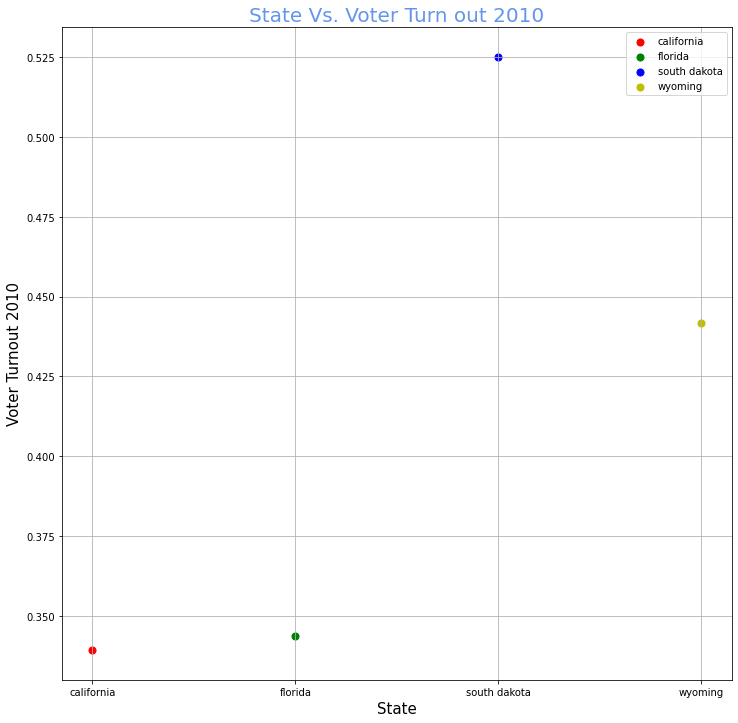

In [401]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('State', fontsize = 15)
ax.set_ylabel('Voter Turnout 2010', fontsize = 15)
ax.set_title('State Vs. Voter Turn out 2010', fontsize = 20, color='cornflowerblue')
targets = ['california', 'florida', 'south dakota', 'wyoming']
colors = ['r', 'g', 'b','y']
for target, color in zip(targets,colors):
    indicesToKeep = fullh['state'] == target
    ax.scatter(fullh.loc[indicesToKeep, 'state']
               , fullh.loc[indicesToKeep, 'voter_turnout_2010']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [408]:
for col in x_train.columns:
    if x_train[col].dtype == 'object':
        x_train[col] = pd.factorize(x_train[col])[0]
        x_test[col] = pd.factorize(x_test[col])[0]
x_train.dropna(inplace=True)
x_test.dropna(inplace=True)
for col in y_train.columns:
    if y_train[col].dtype == 'object':
        y_train[col] = pd.factorize(y_train[col])[0]
        y_test[col] = pd.factorize(y_test[col])[0]
y_test.dropna(inplace=True)
y_train.dropna(inplace=True)
display(x_test)
display(y_train)

C:\Users\lover\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


state     pop2010  age_under_18_2010  can_vote_2010    year  \
4       0  37253956.0          23.658621   2.844018e+07  2010.0   
9       1  18801310.0          20.776119   1.489513e+07  2010.0   
41      2    814180.0          25.281818   6.083405e+05  2010.0   
50      3    563626.0          23.382609   4.318355e+05  2010.0   

    candidatevotes  
4        9648096.0  
9        5117811.0  
41        319426.0  
50        190822.0

state  voter_turnout_2010
0       0            0.373957
1       1            0.480629
2       2            0.355676
3       3            0.347230
5       4            0.449799
6       5            0.408936
7       6            0.441093
10      8            0.337745
11      9            0.323401
12     10            0.388148
13     11            0.372867
14     12            0.356601
15     13            0.475736
16     14            0.386056
17     15            0.407573
18     16            0.303543
19     17            0.533325
20     18            0.409690
21     19            0.429035
22     20            0.413136
23     21            0.516673
24     22            0.355195
25     23            0.419665
26     24            0.468732
27     25            0.348481
28     26            0.337766
29     27            0.430304
30     28            0.315145
31     29            0.379377
32     30            0.314120
33     31            0.360640
34     32            0.449385
35     33            0.435944
36     34            0.279380
37     35            0.477528
38     36            0.395355
39     37            0.401321
40     38            0.377340
42     39            0.318277
43     40            0.251846
44     41            0.336238
45     42            0.481203
46     43            0.348227
47     44            0.477573
48     45            0.350316
49     46            0.486815

In [411]:
import time
start = time.time()
dtreg = DecisionTreeRegressor(max_depth=10)
dtreg.fit(x_train, y_train['voter_turnout_2010'])
dtrPreds = dtreg.predict(x_test)
mse = mean_squared_error(y_test['voter_turnout_2010'], dtrPreds)
print("Decision Tree Regressor MSE:",mse," with a run time of ", time.time()-start,' seconds')


Decision Tree Regressor MSE: 0.0018329825128221636  with a run time of  0.007996082305908203  seconds


In [413]:
start = time.time()
adreg = AdaBoostRegressor(n_estimators=200,random_state=20)
adreg.fit(x_train, y_train['voter_turnout_2010'])
adrPreds = adreg.predict(x_test)
mse = mean_squared_error(y_test['voter_turnout_2010'], adrPreds)
print("Adaboost Regressor MSE:",mse," with a run time of ", time.time()-start,' seconds')

Adaboost Regressor MSE: 0.0014155571564051278  with a run time of  0.5939323902130127  seconds


In [414]:
start = time.time()
rfreg = RandomForestRegressor(n_estimators=200,random_state=20)
rfreg.fit(x_train, y_train['voter_turnout_2010'])
rfrPreds = rfreg.predict(x_test)
mse = mean_squared_error(y_test['voter_turnout_2010'], rfrPreds)
print("Random Forest Regressor MSE:",mse," with a run time of ", time.time()-start,' seconds')

Random Forest Regressor MSE: 0.001843402735859305  with a run time of  0.6360979080200195  seconds


In [415]:
start = time.time()
gbreg = GradientBoostingRegressor(n_estimators=200,random_state=20)
gbreg.fit(x_train, y_train['voter_turnout_2010'])
gbrPreds = gbreg.predict(x_test)
mse = mean_squared_error(y_test['voter_turnout_2010'], gbrPreds)
print("Gradientboost Regressor MSE:",mse," with a run time of ", time.time()-start,' seconds')

Gradientboost Regressor MSE: 0.0012963654826801318  with a run time of  0.13191962242126465  seconds


In [417]:
houseg12 = house.groupby(['state', 'year'], as_index=False).agg({'candidatevotes':'sum'})
houseg12 = houseg12.groupby('year').get_group((2012))
houseg12

state  year  candidatevotes
18           alabama  2012         1933630
41            alaska  2012          289804
64           arizona  2012         2173317
87          arkansas  2012         1038054
110       california  2012        12204357
133         colorado  2012         2450488
156      connecticut  2012         1465510
179         delaware  2012          388059
203          florida  2012         7513536
226          georgia  2012         3552967
249           hawaii  2012          437159
272            idaho  2012          635218
295         illinois  2012         5058133
318          indiana  2012         2553746
341             iowa  2012         1536849
364           kansas  2012         1057739
387         kentucky  2012         1745377
410        louisiana  2012         1705617
433            maine  2012          724623
456         maryland  2012         2585514
479    massachusetts  2012         3184196
502         michigan  2012         4574632
525        minnesota  2012         2813383
548      mississippi  2012         1208175
571         missouri  2012         2675900
594          montana  2012          479740
617         nebraska  2012          772515
640           nevada  2012          973742
663    new hampshire  2012          682416
686       new jersey  2012         3281778
709       new mexico  2012          766090
732         new york  2012         7116336
755   north carolina  2012         4384112
778     north dakota  2012          316224
801             ohio  2012         5142126
824         oklahoma  2012         1325935
847           oregon  2012         1708168
870     pennsylvania  2012         5556330
893     rhode island  2012          427775
916   south carolina  2012         1802734
939     south dakota  2012          361429
962        tennessee  2012         2283727
985            texas  2012         7664208
1008            utah  2012          998897
1031         vermont  2012          289931
1054        virginia  2012         3740455
1077      washington  2012         3006266
1100   west virginia  2012          641354
1123       wisconsin  2012         2866050
1146         wyoming  2012          250700

In [423]:
for col in complete.columns:
    if str(2010) in col or str(2012) in col or str(2008) in col :
        print(col)

smoking_ban_2010
pop2010
pop2012
age_under_5_2010
age_under_18_2010
age_over_65_2010
female_2010
white_2010
black_2010
native_2010
asian_2010
pac_isl_2010
two_plus_races_2010
hispanic_2010
white_not_hispanic_2010
no_move_in_one_plus_year_2010
foreign_born_2010
foreign_spoken_at_home_2010
hs_grad_2010
bachelors_2010
veterans_2010
mean_work_travel_2010
housing_units_2010
homeownership_2010
housing_multi_unit_2010
median_val_owner_occupied_2010
households_2010
persons_per_household_2010
per_capita_income_2010
median_household_income_2010
building_permits_2010
area_2010
density_2010
poverty_2010
civilian_labor_force_2008
employed_2008
unemployed_2008
unemployment_rate_2008
civilian_labor_force_2010
employed_2010
unemployed_2010
unemployment_rate_2010
civilian_labor_force_2012
employed_2012
unemployed_2012
unemployment_rate_2012


In [420]:
for col in life.columns:
    print(col)

fips
state
county
year
male life expectancy (years)
years behind international frontier (male)
female life expectancy (years)
years behind international frontier (female)
white male life expectancy (years)
white female life expectancy (years)
black male life expectancy (years)
black female life expectancy (years)
closest ranked countries for male life expectancy (higher)
closest ranked countries for female life expectancy (higher)
closest ranked countries for male life expectancy (lower)
closest ranked countries for female life expectancy (lower)
rank (male)
rank (female)
male life expectancy change 1987 to 2007 (years)
female life expectancy change 1987 to 2007 (years)
male life expectancy change 1987 to 1997 (years)
female life expectancy change 1987 to 1997 (years)
male life expectancy change 1997 to 2007 (years)
female life expectancy change 1997 to 2007 (years)


In [441]:
compg12 = complete.groupby(['state'], as_index=False).agg({'pop2010':'sum', 'pop2012':'sum', 'age_under_18_2010': 'mean',
                                                          'hs_grad_2010': 'mean', 'age_over_65_2010':'mean'})
#compg12 = compg12[['state', 'pop2010', 'age_under_18_2010', 'hs_grad_2010', 'age_over_65_2010', 'pop2012']]
compg12.head(40)

state     pop2010       pop2012  age_under_18_2010  \
0                alabama   4779736.0  4.813946e+06          23.479104   
1                 alaska    710231.0  7.425877e+05          25.493103   
2                arizona   6392017.0  6.544211e+06          25.306667   
3               arkansas   2915918.0  2.949208e+06          23.542667   
4             california  37253956.0  3.801901e+07          23.658621   
5               colorado   5029196.0  5.186330e+06          22.057813   
6            connecticut   3574097.0  3.597705e+06          22.125000   
7               delaware    897934.0  9.168680e+05          22.833333   
8   district of columbia    601723.0  6.356300e+05          16.800000   
9                florida  18801310.0  1.934133e+07          20.776119   
10               georgia   9687653.0  9.911171e+06          24.550314   
11                hawaii   1360301.0  1.392772e+06          18.140000   
12                 idaho   1567582.0  1.594673e+06          26.511364   
13              illinois  12830632.0  1.287849e+07          22.741176   
14               indiana   6483802.0  6.535665e+06          24.410870   
15                  iowa   3046355.0  3.074386e+06          23.644444   
16                kansas   2853118.0  2.885316e+06          24.143810   
17              kentucky   4339367.0  4.383673e+06          23.425833   
18             louisiana   4533372.0  4.602681e+06          24.717188   
19                 maine   1328361.0  1.328101e+06          20.337500   
20              maryland   5773552.0  5.891680e+06          22.825000   
21         massachusetts   6547629.0  6.659627e+06          20.821429   
22              michigan   9883640.0  9.886610e+06          21.756627   
23             minnesota   5303925.0  5.377695e+06          23.708046   
24           mississippi   2967297.0  2.982963e+06          25.182927   
25              missouri   5988927.0  6.023267e+06          23.580870   
26               montana    989415.0  1.003522e+06          22.301786   
27              nebraska   1826341.0  1.854862e+06          23.709677   
28                nevada   2700551.0  2.752410e+06          22.952941   
29         new hampshire   1316470.0  1.320923e+06          20.600000   
30            new jersey   8791894.0  8.882095e+06          23.428571   
31            new mexico   2059179.0  2.083590e+06          23.624242   
32              new york  19378102.0  1.962541e+07          21.903226   
33        north carolina   9535483.0  9.755299e+06          22.575000   
34          north dakota    672591.0  7.013800e+05          21.805660   
35                  ohio  11536504.0  1.154697e+07          23.939773   
36              oklahoma   3751351.0  3.815298e+06          24.337662   
37                oregon   3831074.0  3.893920e+06          21.869444   
38          pennsylvania  12702379.0  1.276803e+07          21.217910   
39          rhode island   1052567.0  1.052761e+06          20.580000   

    hs_grad_2010  age_over_65_2010  
0      76.782090         15.119403  
1      86.593103          8.572414  
2      81.820000         16.526667  
3      78.864000         16.686667  
4      82.458621         13.724138  
5      88.139062         14.396875  
6      89.100000         14.112500  
7      86.166667         15.533333  
8      86.500000         11.400000  
9      82.226866         18.074627  
10     77.172956         13.527673  
11     87.420000         17.120000  
12     85.722727         14.915909  
13     86.344118         16.320588  
14     84.958696         14.528261  
15     88.998990         17.966667  
16     87.784762         18.093333  
17     75.736667         14.533333  
18     77.126563         13.215625  
19     88.981250         17.143750  
20     87.091667         14.158333  
21     89.642857         14.800000  
22     87.491566         17.484337  
23     88.998851         17.018391  
24     75.954878         13.862195  
25     82.482609         16.790435  
26     88.460714         1

In [442]:
popg = countyData.groupby(['state'], as_index=False).agg({'population': 'sum'})
popg


state  population
0          alabama     4040587
1          arizona     3665228
2         arkansas     2350725
3       california    27030912
4         colorado     3294394
5      connecticut     3287116
6         delaware      666168
7          florida    12937926
8          georgia     6478216
9            idaho     1006749
10        illinois    11430602
11         indiana     5544159
12            iowa     2776755
13          kansas     2477574
14        kentucky     3685296
15       louisiana     3727191
16           maine     1227928
17        maryland     3316186
18   massachusetts     3429715
19        michigan     9231024
20       minnesota     4350415
21     mississippi     2505241
22        missouri     4642718
23         montana      751518
24        nebraska     1578385
25          nevada     1201833
26   new hampshire      303096
27      new jersey     7730188
28      new mexico     1515069
29        new york    17990455
30  north carolina     3636663
31    north dakota      566009
32            ohio    10847115
33        oklahoma     3145585
34          oregon     2842321
35    pennsylvania     7969652
36    rhode island      297188
37  south carolina      975853
38    south dakota      589915
39       tennessee     4877185
40           texas    16986510
41            utah     1722850
42         vermont      562758
43        virginia     3738146
44      washington     4793602
45   west virginia     1599249
46       wisconsin     4891769
47         wyoming      453588

In [443]:
fullh12 = pd.merge(popg, compg12)
fullh12

state  population     pop2010     pop2012  age_under_18_2010  \
0          alabama     4040587   4779736.0   4813946.0          23.479104   
1          arizona     3665228   6392017.0   6544211.0          25.306667   
2         arkansas     2350725   2915918.0   2949208.0          23.542667   
3       california    27030912  37253956.0  38019006.0          23.658621   
4         colorado     3294394   5029196.0   5186330.0          22.057813   
5      connecticut     3287116   3574097.0   3597705.0          22.125000   
6         delaware      666168    897934.0    916868.0          22.833333   
7          florida    12937926  18801310.0  19341327.0          20.776119   
8          georgia     6478216   9687653.0   9911171.0          24.550314   
9            idaho     1006749   1567582.0   1594673.0          26.511364   
10        illinois    11430602  12830632.0  12878494.0          22.741176   
11         indiana     5544159   6483802.0   6535665.0          24.410870   
12            iowa     2776755   3046355.0   3074386.0          23.644444   
13          kansas     2477574   2853118.0   2885316.0          24.143810   
14        kentucky     3685296   4339367.0   4383673.0          23.425833   
15       louisiana     3727191   4533372.0   4602681.0          24.717188   
16           maine     1227928   1328361.0   1328101.0          20.337500   
17        maryland     3316186   5773552.0   5891680.0          22.825000   
18   massachusetts     3429715   6547629.0   6659627.0          20.821429   
19        michigan     9231024   9883640.0   9886610.0          21.756627   
20       minnesota     4350415   5303925.0   5377695.0          23.708046   
21     mississippi     2505241   2967297.0   2982963.0          25.182927   
22        missouri     4642718   5988927.0   6023267.0          23.580870   
23         montana      751518    989415.0   1003522.0          22.301786   
24        nebraska     1578385   1826341.0   1854862.0          23.709677   
25          nevada     1201833   2700551.0   2752410.0          22.952941   
26   new hampshire      303096   1316470.0   1320923.0          20.600000   
27      new jersey     7730188   8791894.0   8882095.0          23.428571   
28      new mexico     1515069   2059179.0   2083590.0          23.624242   
29        new york    17990455  19378102.0  19625409.0          21.903226   
30  north carolina     3636663   9535483.0   9755299.0          22.575000   
31    north dakota      566009    672591.0    701380.0          21.805660   
32            ohio    10847115  11536504.0  11546969.0          23.939773   
33        oklahoma     3145585   3751351.0   3815298.0          24.337662   
34          oregon     2842321   3831074.0   3893920.0          21.869444   
35    pennsylvania     7969652  12702379.0  12768034.0          21.217910   
36    rhode island      297188   1052567.0   1052761.0          20.580000   
37  south carolina      975853   4625364.0   4719009.0          23.213043   
38    south dakota      589915    814180.0    832576.0          25.281818   
39       tennessee     4877185   6346105.0   6450632.0          22.808421   
40           texas    16986510  25145561.0  26078327.0          25.064173   
41            utah     1722850   2763885.0   2854222.0          31.079310   
42         vermont      562758    625741.0    625606.0          20.785714   
43        virginia     3738146   7994802.0   8188656.0          21.342105   
44      washington     4793602   6724540.0   6890899.0          22.794872   
45   west virginia     1599249   1852994.0   1855360.0          20.760000   
46       wisconsin     4891769   5686986.0   5721075.0          22.684722   
47         wyoming      453588    563626.0    576608.0          23.382609   

    hs_grad_2010  age_over_65_2010  
0      76.782090         15.119403  
1      81.820000         16.526667  
2      78.864000         16.686667  
3      82.458621         13.724138  
4      88.139062         14.396875  
5      89.100000 

In [444]:
fullh12 = pd.concat([fullh12, fullh[['candidatevotes', 'can_vote_2010', 'voter_turnout_2010']]], axis = 1)
fullh12.rename(columns={'population':'pop1990'}, inplace=True)
fullh12.dropna(inplace=True)
fullh12.reset_index(drop=True, inplace=True)
fullh12

state     pop1990     pop2010     pop2012  age_under_18_2010  \
0          alabama   4040587.0   4779736.0   4813946.0          23.479104   
1          arizona   3665228.0   6392017.0   6544211.0          25.306667   
2         arkansas   2350725.0   2915918.0   2949208.0          23.542667   
3       california  27030912.0  37253956.0  38019006.0          23.658621   
4         colorado   3294394.0   5029196.0   5186330.0          22.057813   
5      connecticut   3287116.0   3574097.0   3597705.0          22.125000   
6         delaware    666168.0    897934.0    916868.0          22.833333   
7          florida  12937926.0  18801310.0  19341327.0          20.776119   
8            idaho   1006749.0   1567582.0   1594673.0          26.511364   
9         illinois  11430602.0  12830632.0  12878494.0          22.741176   
10         indiana   5544159.0   6483802.0   6535665.0          24.410870   
11            iowa   2776755.0   3046355.0   3074386.0          23.644444   
12          kansas   2477574.0   2853118.0   2885316.0          24.143810   
13        kentucky   3685296.0   4339367.0   4383673.0          23.425833   
14       louisiana   3727191.0   4533372.0   4602681.0          24.717188   
15           maine   1227928.0   1328361.0   1328101.0          20.337500   
16        maryland   3316186.0   5773552.0   5891680.0          22.825000   
17   massachusetts   3429715.0   6547629.0   6659627.0          20.821429   
18        michigan   9231024.0   9883640.0   9886610.0          21.756627   
19       minnesota   4350415.0   5303925.0   5377695.0          23.708046   
20     mississippi   2505241.0   2967297.0   2982963.0          25.182927   
21        missouri   4642718.0   5988927.0   6023267.0          23.580870   
22         montana    751518.0    989415.0   1003522.0          22.301786   
23        nebraska   1578385.0   1826341.0   1854862.0          23.709677   
24          nevada   1201833.0   2700551.0   2752410.0          22.952941   
25   new hampshire    303096.0   1316470.0   1320923.0          20.600000   
26      new jersey   7730188.0   8791894.0   8882095.0          23.428571   
27      new mexico   1515069.0   2059179.0   2083590.0          23.624242   
28        new york  17990455.0  19378102.0  19625409.0          21.903226   
29  north carolina   3636663.0   9535483.0   9755299.0          22.575000   
30    north dakota    566009.0    672591.0    701380.0          21.805660   
31            ohio  10847115.0  11536504.0  11546969.0          23.939773   
32        oklahoma   3145585.0   3751351.0   3815298.0          24.337662   
33          oregon   2842321.0   3831074.0   3893920.0          21.869444   
34    pennsylvania   7969652.0  12702379.0  12768034.0          21.217910   
35    rhode island    297188.0   1052567.0   1052761.0          20.580000   
36  south carolina    975853.0   4625364.0   4719009.0          23.213043   
37    south dakota    589915.0    814180.0    832576.0          25.281818   
38       tennessee   4877185.0   6346105.0   6450632.0          22.808421   
39           texas  16986510.0  25145561.0  26078327.0          25.064173   
40            utah   1722850.0   2763885.0   2854222.0          31.079310   
41         vermont    562758.0    625741.0    625606.0          20.785714   
42        virginia   3738146.0   7994802.0   8188656.0          21.342105   
43      washington   4793602.0   6724540.0   6890899.0          22.794872   
44   west virginia   1599249.0   1852994.0   1855360.0          20.760000   
45       wisconsin   4891769.0   5686986.0   5721075.0          22.684722   
46         wyoming    453588.0    563626.0    576608.0          23.382609   

    hs_grad_2010  age_over_65_2010  candidatevotes  can_vote_2010  \
0      76.782090         15.119403       1367747.0   3.657497e+06   
1      81.820000         16.526667        254335.0   5.291711e+05   
2      78.864000         16.686667       1698145.0   4.774411e+06   
3      82.458621         13.724138      

In [445]:
newtest12 = house.groupby(['state','year'], as_index=False).agg({'candidatevotes': 'sum'})
newtest12 = newtest12.groupby('year').get_group((2012))
newtest12

state  year  candidatevotes
18           alabama  2012         1933630
41            alaska  2012          289804
64           arizona  2012         2173317
87          arkansas  2012         1038054
110       california  2012        12204357
133         colorado  2012         2450488
156      connecticut  2012         1465510
179         delaware  2012          388059
203          florida  2012         7513536
226          georgia  2012         3552967
249           hawaii  2012          437159
272            idaho  2012          635218
295         illinois  2012         5058133
318          indiana  2012         2553746
341             iowa  2012         1536849
364           kansas  2012         1057739
387         kentucky  2012         1745377
410        louisiana  2012         1705617
433            maine  2012          724623
456         maryland  2012         2585514
479    massachusetts  2012         3184196
502         michigan  2012         4574632
525        minnesota  2012         2813383
548      mississippi  2012         1208175
571         missouri  2012         2675900
594          montana  2012          479740
617         nebraska  2012          772515
640           nevada  2012          973742
663    new hampshire  2012          682416
686       new jersey  2012         3281778
709       new mexico  2012          766090
732         new york  2012         7116336
755   north carolina  2012         4384112
778     north dakota  2012          316224
801             ohio  2012         5142126
824         oklahoma  2012         1325935
847           oregon  2012         1708168
870     pennsylvania  2012         5556330
893     rhode island  2012          427775
916   south carolina  2012         1802734
939     south dakota  2012          361429
962        tennessee  2012         2283727
985            texas  2012         7664208
1008            utah  2012          998897
1031         vermont  2012          289931
1054        virginia  2012         3740455
1077      washington  2012         3006266
1100   west virginia  2012          641354
1123       wisconsin  2012         2866050
1146         wyoming  2012          250700

In [456]:
newtest12.reset_index(drop=True, inplace=True)
newtest12.rename(columns={'candidatevotes': 'candidatevotes_2012'}, inplace=True)
fullh12.rename(columns={'candidatevotes': 'candidatevotes_2010'},inplace=True)
fullh12 = pd.concat([fullh12, newtest12[['candidatevotes_2012']]], axis = 1)
fullh12

state     pop1990     pop2010     pop2012  age_under_18_2010  \
0          alabama   4040587.0   4779736.0   4813946.0          23.479104   
1          arizona   3665228.0   6392017.0   6544211.0          25.306667   
2         arkansas   2350725.0   2915918.0   2949208.0          23.542667   
3       california  27030912.0  37253956.0  38019006.0          23.658621   
4         colorado   3294394.0   5029196.0   5186330.0          22.057813   
5      connecticut   3287116.0   3574097.0   3597705.0          22.125000   
6         delaware    666168.0    897934.0    916868.0          22.833333   
7          florida  12937926.0  18801310.0  19341327.0          20.776119   
8            idaho   1006749.0   1567582.0   1594673.0          26.511364   
9         illinois  11430602.0  12830632.0  12878494.0          22.741176   
10         indiana   5544159.0   6483802.0   6535665.0          24.410870   
11            iowa   2776755.0   3046355.0   3074386.0          23.644444   
12          kansas   2477574.0   2853118.0   2885316.0          24.143810   
13        kentucky   3685296.0   4339367.0   4383673.0          23.425833   
14       louisiana   3727191.0   4533372.0   4602681.0          24.717188   
15           maine   1227928.0   1328361.0   1328101.0          20.337500   
16        maryland   3316186.0   5773552.0   5891680.0          22.825000   
17   massachusetts   3429715.0   6547629.0   6659627.0          20.821429   
18        michigan   9231024.0   9883640.0   9886610.0          21.756627   
19       minnesota   4350415.0   5303925.0   5377695.0          23.708046   
20     mississippi   2505241.0   2967297.0   2982963.0          25.182927   
21        missouri   4642718.0   5988927.0   6023267.0          23.580870   
22         montana    751518.0    989415.0   1003522.0          22.301786   
23        nebraska   1578385.0   1826341.0   1854862.0          23.709677   
24          nevada   1201833.0   2700551.0   2752410.0          22.952941   
25   new hampshire    303096.0   1316470.0   1320923.0          20.600000   
26      new jersey   7730188.0   8791894.0   8882095.0          23.428571   
27      new mexico   1515069.0   2059179.0   2083590.0          23.624242   
28        new york  17990455.0  19378102.0  19625409.0          21.903226   
29  north carolina   3636663.0   9535483.0   9755299.0          22.575000   
30    north dakota    566009.0    672591.0    701380.0          21.805660   
31            ohio  10847115.0  11536504.0  11546969.0          23.939773   
32        oklahoma   3145585.0   3751351.0   3815298.0          24.337662   
33          oregon   2842321.0   3831074.0   3893920.0          21.869444   
34    pennsylvania   7969652.0  12702379.0  12768034.0          21.217910   
35    rhode island    297188.0   1052567.0   1052761.0          20.580000   
36  south carolina    975853.0   4625364.0   4719009.0          23.213043   
37    south dakota    589915.0    814180.0    832576.0          25.281818   
38       tennessee   4877185.0   6346105.0   6450632.0          22.808421   
39           texas  16986510.0  25145561.0  26078327.0          25.064173   
40            utah   1722850.0   2763885.0   2854222.0          31.079310   
41         vermont    562758.0    625741.0    625606.0          20.785714   
42        virginia   3738146.0   7994802.0   8188656.0          21.342105   
43      washington   4793602.0   6724540.0   6890899.0          22.794872   
44   west virginia   1599249.0   1852994.0   1855360.0          20.760000   
45       wisconsin   4891769.0   5686986.0   5721075.0          22.684722   
46         wyoming    453588.0    563626.0    576608.0          23.382609   
47             NaN         NaN         NaN         NaN                NaN   
48             NaN         NaN         NaN         NaN                NaN   
49             NaN         NaN         NaN         NaN                NaN   

    hs_grad_2010  age_over_65_2010  candidatevotes_2010  can_vote_2010  \
0      76.7

As we can notice, the population is rising, and the life expectancy as well, so we can expect a minor increase in the number of possible voters. as hs_grad_2010 who will turn 18 and will be able to vote in 2012 are more than who die among them or among age_over_65_2010.

1 - hs_grad_2010 is the mean percentage in state among age_under_18 (which represents the mean perecentage in the state).

2- age_under_18_2010 is calculated by mean in state and represents percentage.

3- age_over_65_2010 also is the mean perecentage in a state which are of age 65 or older.

4- voters are aged 18 and older, so we calculate them by dividing the percentage by 100 and get the complementary to 1 and mutliply by pop2010. so we got number of voters in 2010.

5- candidatevotes , is the sum in the given year of all votes in a state, so the voter_turnout is candidatevotes/can_vote.

Now for 2010 we had the numbers, for 2012 we will check the ratio of hs_grad_2010/age_over_65_2010 and multiply with pop2012, and we already got the number of candidatevotes_2012.

In [457]:
fullh12.dropna(inplace=True)
fullh12

state     pop1990     pop2010     pop2012  age_under_18_2010  \
0          alabama   4040587.0   4779736.0   4813946.0          23.479104   
1          arizona   3665228.0   6392017.0   6544211.0          25.306667   
2         arkansas   2350725.0   2915918.0   2949208.0          23.542667   
3       california  27030912.0  37253956.0  38019006.0          23.658621   
4         colorado   3294394.0   5029196.0   5186330.0          22.057813   
5      connecticut   3287116.0   3574097.0   3597705.0          22.125000   
6         delaware    666168.0    897934.0    916868.0          22.833333   
7          florida  12937926.0  18801310.0  19341327.0          20.776119   
8            idaho   1006749.0   1567582.0   1594673.0          26.511364   
9         illinois  11430602.0  12830632.0  12878494.0          22.741176   
10         indiana   5544159.0   6483802.0   6535665.0          24.410870   
11            iowa   2776755.0   3046355.0   3074386.0          23.644444   
12          kansas   2477574.0   2853118.0   2885316.0          24.143810   
13        kentucky   3685296.0   4339367.0   4383673.0          23.425833   
14       louisiana   3727191.0   4533372.0   4602681.0          24.717188   
15           maine   1227928.0   1328361.0   1328101.0          20.337500   
16        maryland   3316186.0   5773552.0   5891680.0          22.825000   
17   massachusetts   3429715.0   6547629.0   6659627.0          20.821429   
18        michigan   9231024.0   9883640.0   9886610.0          21.756627   
19       minnesota   4350415.0   5303925.0   5377695.0          23.708046   
20     mississippi   2505241.0   2967297.0   2982963.0          25.182927   
21        missouri   4642718.0   5988927.0   6023267.0          23.580870   
22         montana    751518.0    989415.0   1003522.0          22.301786   
23        nebraska   1578385.0   1826341.0   1854862.0          23.709677   
24          nevada   1201833.0   2700551.0   2752410.0          22.952941   
25   new hampshire    303096.0   1316470.0   1320923.0          20.600000   
26      new jersey   7730188.0   8791894.0   8882095.0          23.428571   
27      new mexico   1515069.0   2059179.0   2083590.0          23.624242   
28        new york  17990455.0  19378102.0  19625409.0          21.903226   
29  north carolina   3636663.0   9535483.0   9755299.0          22.575000   
30    north dakota    566009.0    672591.0    701380.0          21.805660   
31            ohio  10847115.0  11536504.0  11546969.0          23.939773   
32        oklahoma   3145585.0   3751351.0   3815298.0          24.337662   
33          oregon   2842321.0   3831074.0   3893920.0          21.869444   
34    pennsylvania   7969652.0  12702379.0  12768034.0          21.217910   
35    rhode island    297188.0   1052567.0   1052761.0          20.580000   
36  south carolina    975853.0   4625364.0   4719009.0          23.213043   
37    south dakota    589915.0    814180.0    832576.0          25.281818   
38       tennessee   4877185.0   6346105.0   6450632.0          22.808421   
39           texas  16986510.0  25145561.0  26078327.0          25.064173   
40            utah   1722850.0   2763885.0   2854222.0          31.079310   
41         vermont    562758.0    625741.0    625606.0          20.785714   
42        virginia   3738146.0   7994802.0   8188656.0          21.342105   
43      washington   4793602.0   6724540.0   6890899.0          22.794872   
44   west virginia   1599249.0   1852994.0   1855360.0          20.760000   
45       wisconsin   4891769.0   5686986.0   5721075.0          22.684722   
46         wyoming    453588.0    563626.0    576608.0          23.382609   

    hs_grad_2010  age_over_65_2010  candidatevotes_2010  can_vote_2010  \
0      76.782090         15.119403            1367747.0   3.657497e+06   
1      81.820000         16.526667             254335.0   5.291711e+05   
2      78.864000         16.686667            1698145.0   4.774411e+06   
3      82.458621    

In [460]:
fullh12['multi_ratio'] = (fullh12['hs_grad_2010']/100 * fullh12['age_under_18_2010']/100) / fullh12['age_over_65_2010'] + 1
fullh12

state     pop1990     pop2010     pop2012  age_under_18_2010  \
0          alabama   4040587.0   4779736.0   4813946.0          23.479104   
1          arizona   3665228.0   6392017.0   6544211.0          25.306667   
2         arkansas   2350725.0   2915918.0   2949208.0          23.542667   
3       california  27030912.0  37253956.0  38019006.0          23.658621   
4         colorado   3294394.0   5029196.0   5186330.0          22.057813   
5      connecticut   3287116.0   3574097.0   3597705.0          22.125000   
6         delaware    666168.0    897934.0    916868.0          22.833333   
7          florida  12937926.0  18801310.0  19341327.0          20.776119   
8            idaho   1006749.0   1567582.0   1594673.0          26.511364   
9         illinois  11430602.0  12830632.0  12878494.0          22.741176   
10         indiana   5544159.0   6483802.0   6535665.0          24.410870   
11            iowa   2776755.0   3046355.0   3074386.0          23.644444   
12          kansas   2477574.0   2853118.0   2885316.0          24.143810   
13        kentucky   3685296.0   4339367.0   4383673.0          23.425833   
14       louisiana   3727191.0   4533372.0   4602681.0          24.717188   
15           maine   1227928.0   1328361.0   1328101.0          20.337500   
16        maryland   3316186.0   5773552.0   5891680.0          22.825000   
17   massachusetts   3429715.0   6547629.0   6659627.0          20.821429   
18        michigan   9231024.0   9883640.0   9886610.0          21.756627   
19       minnesota   4350415.0   5303925.0   5377695.0          23.708046   
20     mississippi   2505241.0   2967297.0   2982963.0          25.182927   
21        missouri   4642718.0   5988927.0   6023267.0          23.580870   
22         montana    751518.0    989415.0   1003522.0          22.301786   
23        nebraska   1578385.0   1826341.0   1854862.0          23.709677   
24          nevada   1201833.0   2700551.0   2752410.0          22.952941   
25   new hampshire    303096.0   1316470.0   1320923.0          20.600000   
26      new jersey   7730188.0   8791894.0   8882095.0          23.428571   
27      new mexico   1515069.0   2059179.0   2083590.0          23.624242   
28        new york  17990455.0  19378102.0  19625409.0          21.903226   
29  north carolina   3636663.0   9535483.0   9755299.0          22.575000   
30    north dakota    566009.0    672591.0    701380.0          21.805660   
31            ohio  10847115.0  11536504.0  11546969.0          23.939773   
32        oklahoma   3145585.0   3751351.0   3815298.0          24.337662   
33          oregon   2842321.0   3831074.0   3893920.0          21.869444   
34    pennsylvania   7969652.0  12702379.0  12768034.0          21.217910   
35    rhode island    297188.0   1052567.0   1052761.0          20.580000   
36  south carolina    975853.0   4625364.0   4719009.0          23.213043   
37    south dakota    589915.0    814180.0    832576.0          25.281818   
38       tennessee   4877185.0   6346105.0   6450632.0          22.808421   
39           texas  16986510.0  25145561.0  26078327.0          25.064173   
40            utah   1722850.0   2763885.0   2854222.0          31.079310   
41         vermont    562758.0    625741.0    625606.0          20.785714   
42        virginia   3738146.0   7994802.0   8188656.0          21.342105   
43      washington   4793602.0   6724540.0   6890899.0          22.794872   
44   west virginia   1599249.0   1852994.0   1855360.0          20.760000   
45       wisconsin   4891769.0   5686986.0   5721075.0          22.684722   
46         wyoming    453588.0    563626.0    576608.0          23.382609   

    hs_grad_2010  age_over_65_2010  candidatevotes_2010  can_vote_2010  \
0      76.782090         15.119403            1367747.0   3.657497e+06   
1      81.820000         16.526667             254335.0   5.291711e+05   
2      78.864000         16.686667            1698145.0   4.774411e+06   
3      82.458621    

In [461]:
fullh12['can_vote_2012'] = fullh12['multi_ratio'] * fullh12['can_vote_2010']
fullh12['voter_turnout_2012'] = fullh12['candidatevotes_2012'] / fullh12['can_vote_2012']
fullh12

state     pop1990     pop2010     pop2012  age_under_18_2010  \
0          alabama   4040587.0   4779736.0   4813946.0          23.479104   
1          arizona   3665228.0   6392017.0   6544211.0          25.306667   
2         arkansas   2350725.0   2915918.0   2949208.0          23.542667   
3       california  27030912.0  37253956.0  38019006.0          23.658621   
4         colorado   3294394.0   5029196.0   5186330.0          22.057813   
5      connecticut   3287116.0   3574097.0   3597705.0          22.125000   
6         delaware    666168.0    897934.0    916868.0          22.833333   
7          florida  12937926.0  18801310.0  19341327.0          20.776119   
8            idaho   1006749.0   1567582.0   1594673.0          26.511364   
9         illinois  11430602.0  12830632.0  12878494.0          22.741176   
10         indiana   5544159.0   6483802.0   6535665.0          24.410870   
11            iowa   2776755.0   3046355.0   3074386.0          23.644444   
12          kansas   2477574.0   2853118.0   2885316.0          24.143810   
13        kentucky   3685296.0   4339367.0   4383673.0          23.425833   
14       louisiana   3727191.0   4533372.0   4602681.0          24.717188   
15           maine   1227928.0   1328361.0   1328101.0          20.337500   
16        maryland   3316186.0   5773552.0   5891680.0          22.825000   
17   massachusetts   3429715.0   6547629.0   6659627.0          20.821429   
18        michigan   9231024.0   9883640.0   9886610.0          21.756627   
19       minnesota   4350415.0   5303925.0   5377695.0          23.708046   
20     mississippi   2505241.0   2967297.0   2982963.0          25.182927   
21        missouri   4642718.0   5988927.0   6023267.0          23.580870   
22         montana    751518.0    989415.0   1003522.0          22.301786   
23        nebraska   1578385.0   1826341.0   1854862.0          23.709677   
24          nevada   1201833.0   2700551.0   2752410.0          22.952941   
25   new hampshire    303096.0   1316470.0   1320923.0          20.600000   
26      new jersey   7730188.0   8791894.0   8882095.0          23.428571   
27      new mexico   1515069.0   2059179.0   2083590.0          23.624242   
28        new york  17990455.0  19378102.0  19625409.0          21.903226   
29  north carolina   3636663.0   9535483.0   9755299.0          22.575000   
30    north dakota    566009.0    672591.0    701380.0          21.805660   
31            ohio  10847115.0  11536504.0  11546969.0          23.939773   
32        oklahoma   3145585.0   3751351.0   3815298.0          24.337662   
33          oregon   2842321.0   3831074.0   3893920.0          21.869444   
34    pennsylvania   7969652.0  12702379.0  12768034.0          21.217910   
35    rhode island    297188.0   1052567.0   1052761.0          20.580000   
36  south carolina    975853.0   4625364.0   4719009.0          23.213043   
37    south dakota    589915.0    814180.0    832576.0          25.281818   
38       tennessee   4877185.0   6346105.0   6450632.0          22.808421   
39           texas  16986510.0  25145561.0  26078327.0          25.064173   
40            utah   1722850.0   2763885.0   2854222.0          31.079310   
41         vermont    562758.0    625741.0    625606.0          20.785714   
42        virginia   3738146.0   7994802.0   8188656.0          21.342105   
43      washington   4793602.0   6724540.0   6890899.0          22.794872   
44   west virginia   1599249.0   1852994.0   1855360.0          20.760000   
45       wisconsin   4891769.0   5686986.0   5721075.0          22.684722   
46         wyoming    453588.0    563626.0    576608.0          23.382609   

    hs_grad_2010  age_over_65_2010  candidatevotes_2010  can_vote_2010  \
0      76.782090         15.119403            1367747.0   3.657497e+06   
1      81.820000         16.526667             254335.0   5.291711e+05   
2      78.864000         16.686667            1698145.0   4.774411e+06   
3      82.458621    

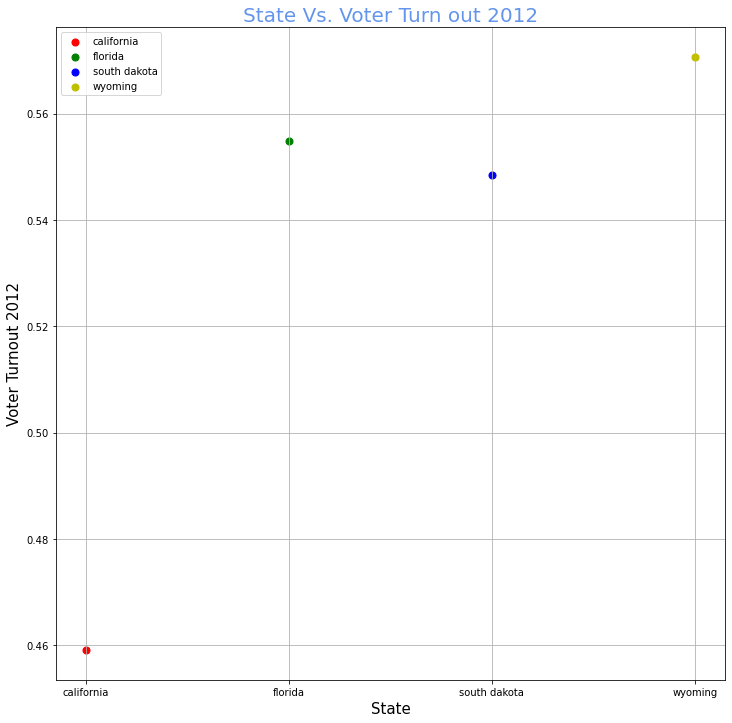

In [462]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('State', fontsize = 15)
ax.set_ylabel('Voter Turnout 2012', fontsize = 15)
ax.set_title('State Vs. Voter Turn out 2012', fontsize = 20, color='cornflowerblue')
targets = ['california', 'florida', 'south dakota', 'wyoming']
colors = ['r', 'g', 'b','y']
for target, color in zip(targets,colors):
    indicesToKeep = fullh12['state'] == target
    ax.scatter(fullh12.loc[indicesToKeep, 'state']
               , fullh12.loc[indicesToKeep, 'voter_turnout_2012']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

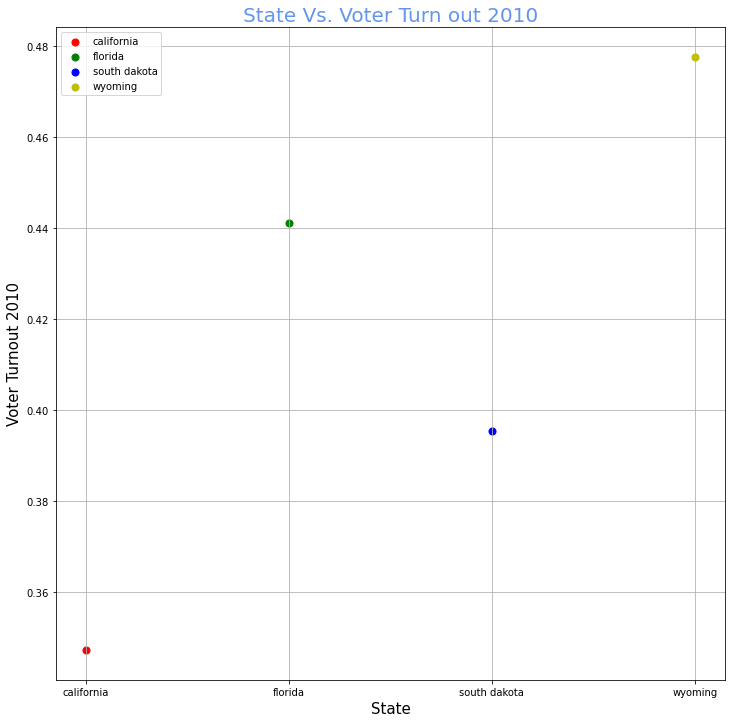

In [463]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('State', fontsize = 15)
ax.set_ylabel('Voter Turnout 2010', fontsize = 15)
ax.set_title('State Vs. Voter Turn out 2010', fontsize = 20, color='cornflowerblue')
targets = ['california', 'florida', 'south dakota', 'wyoming']
colors = ['r', 'g', 'b','y']
for target, color in zip(targets,colors):
    indicesToKeep = fullh12['state'] == target
    ax.scatter(fullh12.loc[indicesToKeep, 'state']
               , fullh12.loc[indicesToKeep, 'voter_turnout_2010']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [468]:
nfullh12 = fullh12.copy()
nfullh12['state'] = pd.factorize(nfullh12['state'])[0]

In [492]:
nfullh12

state     pop1990     pop2010     pop2012  age_under_18_2010  \
0       0   4040587.0   4779736.0   4813946.0          23.479104   
1       1   3665228.0   6392017.0   6544211.0          25.306667   
2       2   2350725.0   2915918.0   2949208.0          23.542667   
3       3  27030912.0  37253956.0  38019006.0          23.658621   
4       4   3294394.0   5029196.0   5186330.0          22.057813   
5       5   3287116.0   3574097.0   3597705.0          22.125000   
6       6    666168.0    897934.0    916868.0          22.833333   
7       7  12937926.0  18801310.0  19341327.0          20.776119   
8       8   1006749.0   1567582.0   1594673.0          26.511364   
9       9  11430602.0  12830632.0  12878494.0          22.741176   
10     10   5544159.0   6483802.0   6535665.0          24.410870   
11     11   2776755.0   3046355.0   3074386.0          23.644444   
12     12   2477574.0   2853118.0   2885316.0          24.143810   
13     13   3685296.0   4339367.0   4383673.0          23.425833   
14     14   3727191.0   4533372.0   4602681.0          24.717188   
15     15   1227928.0   1328361.0   1328101.0          20.337500   
16     16   3316186.0   5773552.0   5891680.0          22.825000   
17     17   3429715.0   6547629.0   6659627.0          20.821429   
18     18   9231024.0   9883640.0   9886610.0          21.756627   
19     19   4350415.0   5303925.0   5377695.0          23.708046   
20     20   2505241.0   2967297.0   2982963.0          25.182927   
21     21   4642718.0   5988927.0   6023267.0          23.580870   
22     22    751518.0    989415.0   1003522.0          22.301786   
23     23   1578385.0   1826341.0   1854862.0          23.709677   
24     24   1201833.0   2700551.0   2752410.0          22.952941   
25     25    303096.0   1316470.0   1320923.0          20.600000   
26     26   7730188.0   8791894.0   8882095.0          23.428571   
27     27   1515069.0   2059179.0   2083590.0          23.624242   
28     28  17990455.0  19378102.0  19625409.0          21.903226   
29     29   3636663.0   9535483.0   9755299.0          22.575000   
30     30    566009.0    672591.0    701380.0          21.805660   
31     31  10847115.0  11536504.0  11546969.0          23.939773   
32     32   3145585.0   3751351.0   3815298.0          24.337662   
33     33   2842321.0   3831074.0   3893920.0          21.869444   
34     34   7969652.0  12702379.0  12768034.0          21.217910   
35     35    297188.0   1052567.0   1052761.0          20.580000   
36     36    975853.0   4625364.0   4719009.0          23.213043   
37     37    589915.0    814180.0    832576.0          25.281818   
38     38   4877185.0   6346105.0   6450632.0          22.808421   
39     39  16986510.0  25145561.0  26078327.0          25.064173   
40     40   1722850.0   2763885.0   2854222.0          31.079310   
41     41    562758.0    625741.0    625606.0          20.785714   
42     42   3738146.0   7994802.0   8188656.0          21.342105   
43     43   4793602.0   6724540.0   6890899.0          22.794872   
44     44   1599249.0   1852994.0   1855360.0          20.760000   
45     45   4891769.0   5686986.0   5721075.0          22.684722   
46     46    453588.0    563626.0    576608.0          23.382609   

    hs_grad_2010  age_over_65_2010  candidatevotes_2010  can_vote_2010  \
0      76.782090         15.119403            1367747.0   3.657497e+06   
1      81.820000         16.526667             254335.0   5.291711e+05   
2      78.864000         16.686667            1698145.0   4.774411e+06   
3      82.458621         13.724138             774125.0   2.229433e+06   
4      88.139062         14.396875            9648096.0   2.844018e+07   
5      89.100000         14.112500            1763152.0   3.919865e+06   
6      86.166667         15.533333            1138202.0   2.783328e+06   
7      82.226866         18.074627             305636.0   6.929057e+05   
8      85.722727         14.915909            5117811.0   1.489513e+07   

In [469]:
x10 = nfullh12.drop(columns=['voter_turnout_2010'])
x12 = nfullh12.drop(columns=['voter_turnout_2012'])
y10 = nfullh12['voter_turnout_2010']
y12 = nfullh12['voter_turnout_2012']


In [470]:
x10_train, x10_test, y10_train, y10_test = train_test_split(x10, y10, test_size=0.2, random_state=20)
x12_train, x12_test, y12_train, y12_test = train_test_split(x12, y12, test_size=0.2, random_state=20)

### 1- Decision Tree Regressor :

In [490]:
start = time.time()
dtr10 = DecisionTreeRegressor(random_state=40)
# define parameter grid
parameters_grid = {
    'max_depth': [7, 10, 12],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [2, 8]
}

# define grid search
grid_search = GridSearchCV(estimator=dtr10, param_grid=parameters_grid, cv=10)

# fit estimator
grid_search.fit(x10_train, y10_train)

# get best estimator
best = grid_search.best_estimator_
print(best)

# print best parameters
print(pd.DataFrame.from_dict(grid_search.best_params_, orient='index', columns=['Selected Value']).T)

dtr10preds = best.predict(x10_test)
mse10 = mean_squared_error(y10_test, dtr10preds)
run10 = time.time()-start
print("Decision Tree Regressor for 2010 cycle, MSE: ", mse10, "with run time of ",run10, ' seconds.')

DecisionTreeRegressor(max_depth=7, min_samples_leaf=8, random_state=40)
                max_depth  min_samples_leaf  min_samples_split
Selected Value          7                 8                  2
Decision Tree Regressor for 2010 cycle, MSE:  0.001800649267498328 with run time of  1.0939931869506836  seconds.


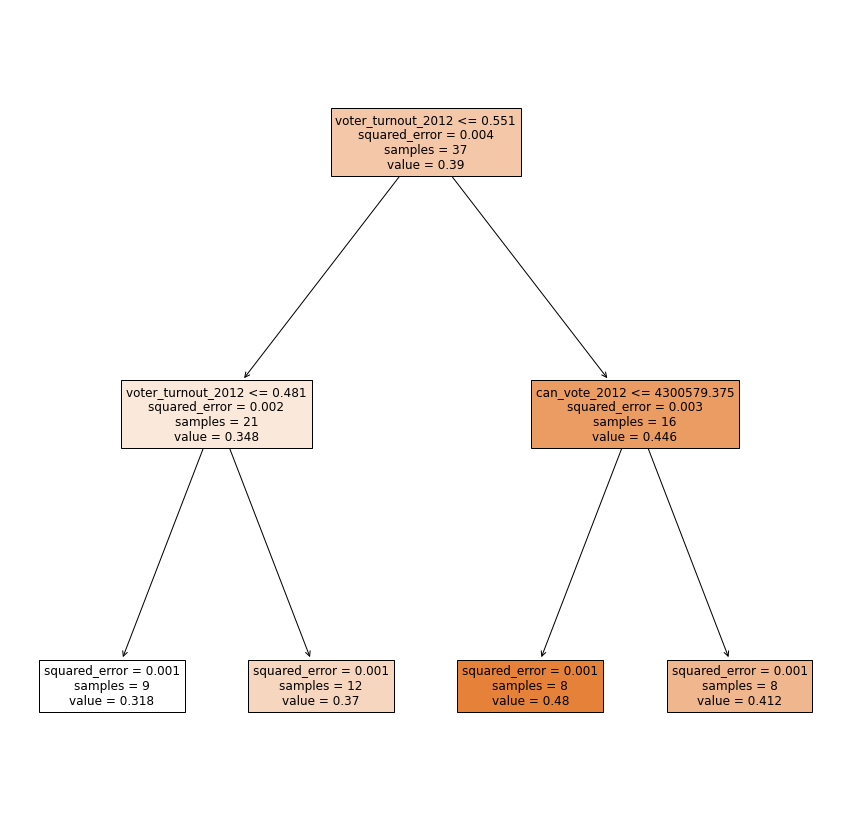

In [491]:
plt.figure(figsize=(15, 15))
tr = tree.plot_tree(best, feature_names=x10_train.columns, filled=True)

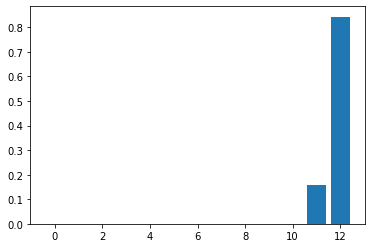

In [496]:
importancedtr10 = best.feature_importances_
# plot feature importance
plt.bar([x for x in range(len(importancedtr10))], importancedtr10)
plt.show()

In [487]:
start = time.time()
dtr12 = DecisionTreeRegressor(random_state=40)
# define parameter grid
parameters_grid = {
    'max_depth': [7,10, 12 ],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [2, 8]
}

# define grid search
grid_search = GridSearchCV(estimator=dtr12, param_grid=parameters_grid, cv=10)

# fit estimator
grid_search.fit(x12_train, y12_train)

# get best estimator
bestdtr12 = grid_search.best_estimator_
print(bestdtr12)

# print best parameters
print(pd.DataFrame.from_dict(grid_search.best_params_, orient='index', columns=['Selected Value']).T)

dtr12preds = bestdtr12.predict(x12_test)
mse12 = mean_squared_error(y12_test, dtr12preds)
run12 = time.time()-start
print("Decision Tree Regressor for 2012 cycle, MSE: ", mse12, "with run time of ",run12, ' seconds.')

DecisionTreeRegressor(max_depth=7, min_samples_leaf=8, random_state=40)
                max_depth  min_samples_leaf  min_samples_split
Selected Value          7                 8                  2
Decision Tree Regressor for 2012 cycle, MSE:  0.0011470368785370265 with run time of  1.1189322471618652  seconds.


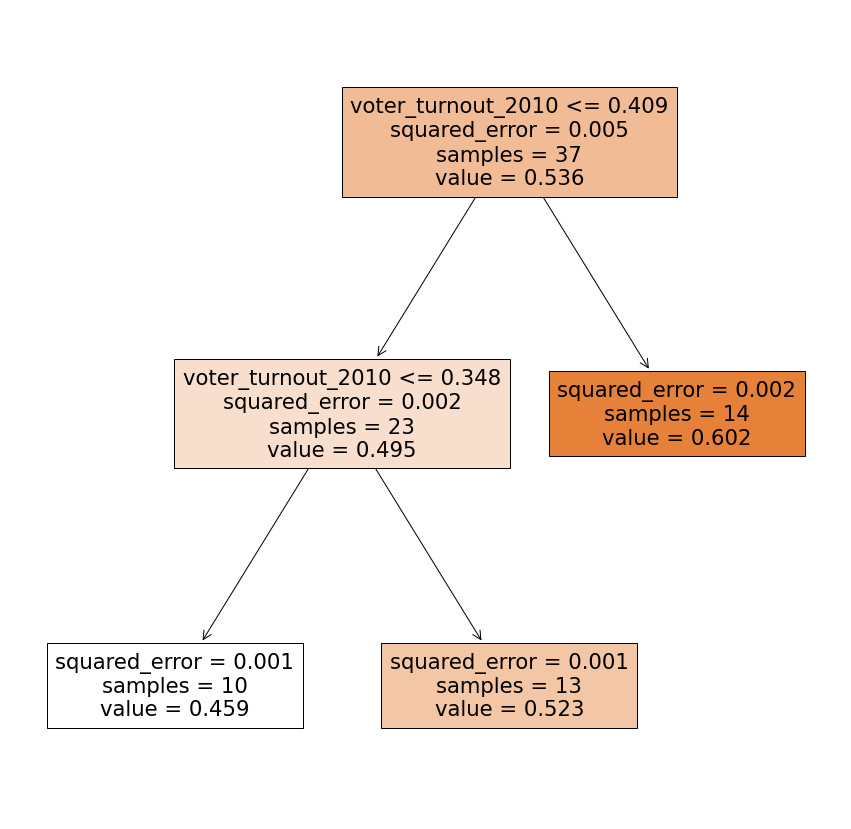

In [489]:
plt.figure(figsize=(15, 15))
tr = tree.plot_tree(bestdtr12, feature_names=x12_train.columns, filled=True)

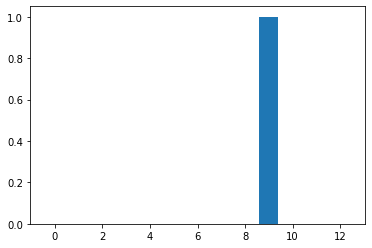

In [497]:
importancedtr12 = bestdtr12.feature_importances_
# plot feature importance
plt.bar([x for x in range(len(importancedtr12))], importancedtr12)
plt.show()

### 2- Random Forest Regressor:

In [500]:
start = time.time()
rfr10 = RandomForestRegressor(random_state=40)

# define parameter grid
parameters_grid = {
    'max_depth': [2, 3],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [2, 8],
    'n_estimators': [100, 150]
}

# define grid search
grid_search = GridSearchCV(estimator=rfr10, param_grid=parameters_grid, cv=10)

# fit estimator
grid_search.fit(x10_train, y10_train)

# get best estimator
bestrfr10 = grid_search.best_estimator_
print(bestrfr10)

# print best parameters
print(pd.DataFrame.from_dict(grid_search.best_params_, orient='index', columns=['Selected Value']).T)

rfr10preds = bestrfr10.predict(x10_test)
mse10 = mean_squared_error(y10_test, rfr10preds)
run10 = time.time()-start
print("Random Forest Regressor for 2010 cycle, MSE: ", mse10, "with run time of ",run10, ' seconds.')

RandomForestRegressor(max_depth=2, min_samples_leaf=8, random_state=40)
                max_depth  min_samples_leaf  min_samples_split  n_estimators
Selected Value          2                 8                  2           100
Random Forest Regressor for 2010 cycle, MSE:  0.0017958517212420182 with run time of  55.026798248291016  seconds.


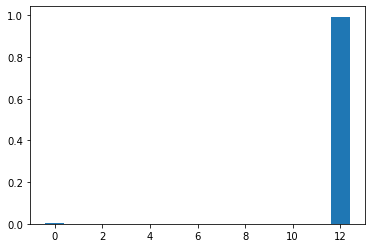

In [501]:
importancerfr10 = bestrfr10.feature_importances_
# plot feature importance
plt.bar([x for x in range(len(importancerfr10))], importancerfr10)
plt.show()

In [520]:
start = time.time()
rfr12 = RandomForestRegressor(random_state=40)

# define parameter grid
parameters_grid = {
    'max_depth': [2, 3],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [2, 8],
    'n_estimators': [100, 150]
}

# define grid search
grid_search = GridSearchCV(estimator=rfr12, param_grid=parameters_grid, cv=10)

# fit estimator
grid_search.fit(x12_train, y12_train)

# get best estimator
bestrfr12 = grid_search.best_estimator_
print(bestrfr12)

# print best parameters
print(pd.DataFrame.from_dict(grid_search.best_params_, orient='index', columns=['Selected Value']).T)

rfr12preds = bestrfr12.predict(x12_test)
mse12 = mean_squared_error(y12_test, rfr12preds)
run12 = time.time()-start
print("Random Forest Regressor for 2012 cycle, MSE: ", mse12, "with run time of ",run12, ' seconds.')

RandomForestRegressor(max_depth=2, min_samples_leaf=8, random_state=40)
                max_depth  min_samples_leaf  min_samples_split  n_estimators
Selected Value          2                 8                  2           100
Random Forest Regressor for 2012 cycle, MSE:  0.0012061475209400269 with run time of  59.686084270477295  seconds.


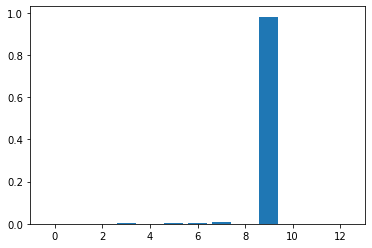

In [521]:
importancerfr12 = bestrfr12.feature_importances_
# plot feature importance
plt.bar([x for x in range(len(importancerfr12))], importancerfr12)
plt.show()

### - 3 Adaboost Regressor:

In [522]:
start = time.time()
adr10 = AdaBoostRegressor(random_state=40)

# define parameter grid
parameters_grid = {
    'learning_rate': [0,0.5,1],
    'n_estimators': [100, 150]
}

# define grid search
grid_search = GridSearchCV(estimator=adr10, param_grid=parameters_grid, cv=10)

# fit estimator
grid_search.fit(x10_train, y10_train)

# get best estimator
bestadr10 = grid_search.best_estimator_
print(bestadr10)

# print best parameters
print(pd.DataFrame.from_dict(grid_search.best_params_, orient='index', columns=['Selected Value']).T)

adr10preds = bestadr10.predict(x10_test)
mse10 = mean_squared_error(y10_test, adr10preds)
run10 = time.time()-start
print("Adaboost Regressor for 2010 cycle, MSE: ", mse10, "with run time of ",run10, ' seconds.')

C:\Users\lover\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lover\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lover\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 1065, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\lover\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 114, in fit
    raise ValueError("learning_rate must be greater

AdaBoostRegressor(learning_rate=1, n_estimators=150, random_state=40)
                learning_rate  n_estimators
Selected Value              1           150
Adaboost Regressor for 2010 cycle, MSE:  0.0013454571718047037 with run time of  14.200978755950928  seconds.


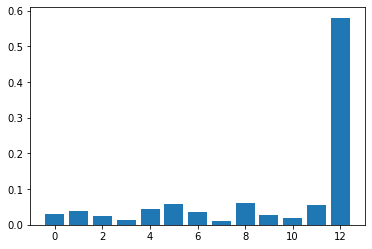

In [523]:
importanceadr10 = bestadr10.feature_importances_
# plot feature importance
plt.bar([x for x in range(len(importanceadr10))], importanceadr10)
plt.show()

In [512]:
start = time.time()
adr12 = AdaBoostRegressor(random_state=40)

# define parameter grid
parameters_grid = {
    'learning_rate': [0,0.5,1],
    'n_estimators': [100, 150]
}

# define grid search
grid_search = GridSearchCV(estimator=adr12, param_grid=parameters_grid, cv=10)

# fit estimator
grid_search.fit(x12_train, y12_train)

# get best estimator
bestadr12 = grid_search.best_estimator_
print(bestadr12)

# print best parameters
print(pd.DataFrame.from_dict(grid_search.best_params_, orient='index', columns=['Selected Value']).T)

adr12preds = bestadr12.predict(x12_test)
mse12 = mean_squared_error(y12_test, adr12preds)
run12 = time.time()-start
print("Adaboost Regressor for 2012 cycle, MSE: ", mse12, "with run time of ",run12, ' seconds.')

C:\Users\lover\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lover\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lover\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 1065, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\lover\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 114, in fit
    raise ValueError("learning_rate must be greater

AdaBoostRegressor(learning_rate=0.5, n_estimators=150, random_state=40)
                learning_rate  n_estimators
Selected Value            0.5         150.0
Random Forest Regressor for 2012 cycle, MSE:  0.0014433330194855497 with run time of  15.569398880004883  seconds.


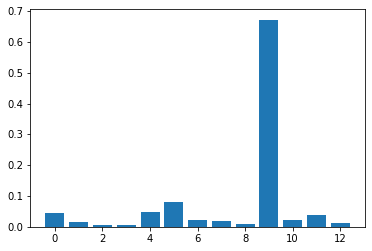

In [513]:
importanceadr12 = bestadr12.feature_importances_
# plot feature importance
plt.bar([x for x in range(len(importanceadr12))], importanceadr12)
plt.show()

### 4- Gradientboost Regressor:

In [514]:
start = time.time()
gbr10 = GradientBoostingRegressor(random_state=40)

# define parameter grid
parameters_grid = {
    'learning_rate': [0,0.5,1],
    'n_estimators': [100, 150]
}

# define grid search
grid_search = GridSearchCV(estimator=gbr10, param_grid=parameters_grid, cv=10)

# fit estimator
grid_search.fit(x10_train, y10_train)

# get best estimator
bestgbr10 = grid_search.best_estimator_
print(bestgbr10)

# print best parameters
print(pd.DataFrame.from_dict(grid_search.best_params_, orient='index', columns=['Selected Value']).T)

gbr10preds = bestgbr10.predict(x10_test)
mse10 = mean_squared_error(y10_test, gbr10preds)
run10 = time.time()-start
print("GradientBoost Regressor for 2010 cycle, MSE: ", mse10, "with run time of ",run10, ' seconds.')

GradientBoostingRegressor(learning_rate=0.5, random_state=40)
                learning_rate  n_estimators
Selected Value            0.5         100.0
GradientBoost Regressor for 2010 cycle, MSE:  0.0019462548968943766 with run time of  3.213634490966797  seconds.


C:\Users\lover\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lover\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lover\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 525, in fit
    self._check_params()
  File "C:\Users\lover\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 275, in _check_params
    "learning_rate must be greater than 0 but was %r" % self.learning_rate
ValueError: 

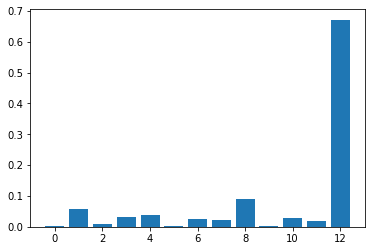

In [516]:
importancegbr10 = bestgbr10.feature_importances_
# plot feature importance
plt.bar([x for x in range(len(importancegbr10))], importancegbr10)
plt.show()

In [518]:
start = time.time()
gbr12 = GradientBoostingRegressor(random_state=40)

# define parameter grid
parameters_grid = {
    'learning_rate': [0,0.5,1],
    'n_estimators': [100, 150]
}

# define grid search
grid_search = GridSearchCV(estimator=gbr12, param_grid=parameters_grid, cv=10)

# fit estimator
grid_search.fit(x12_train, y12_train)

# get best estimator
bestgbr12 = grid_search.best_estimator_
print(bestgbr12)

# print best parameters
print(pd.DataFrame.from_dict(grid_search.best_params_, orient='index', columns=['Selected Value']).T)

gbr12preds = bestgbr12.predict(x12_test)
mse12 = mean_squared_error(y12_test, gbr12preds)
run12 = time.time()-start
print("GradientBoost Regressor for 2012 cycle, MSE: ", mse12, "with run time of ",run12, ' seconds.')

GradientBoostingRegressor(learning_rate=0.5, random_state=40)
                learning_rate  n_estimators
Selected Value            0.5         100.0
GradientBoost Regressor for 2012 cycle, MSE:  0.002364375245120338 with run time of  2.9606430530548096  seconds.


C:\Users\lover\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lover\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lover\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 525, in fit
    self._check_params()
  File "C:\Users\lover\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 275, in _check_params
    "learning_rate must be greater than 0 but was %r" % self.learning_rate
ValueError: 

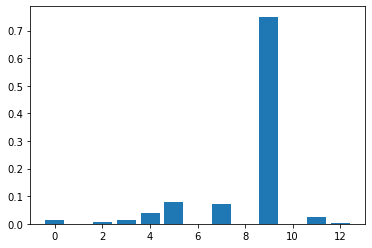

In [519]:
importancegbr12 = bestgbr12.feature_importances_
# plot feature importance
plt.bar([x for x in range(len(importancegbr12))], importancegbr12)
plt.show()

# Section D (Classification):

In [524]:
house

year    state state_po  state_fips  state_cen  state_ic    office  \
0      1976  alabama       al           1         63        41  us house   
1      1976  alabama       al           1         63        41  us house   
2      1976  alabama       al           1         63        41  us house   
3      1976  alabama       al           1         63        41  us house   
4      1976  alabama       al           1         63        41  us house   
...     ...      ...      ...         ...        ...       ...       ...   
31098  2020  wyoming       wy          56         83        68  us house   
31099  2020  wyoming       wy          56         83        68  us house   
31100  2020  wyoming       wy          56         83        68  us house   
31101  2020  wyoming       wy          56         83        68  us house   
31102  2020  wyoming       wy          56         83        68  us house   

       district stage runoff  special                   candidate  \
0             1   gen  False    False              bill davenport   
1             1   gen  False    False                jack edwards   
2             1   gen  False    False                     writein   
3             2   gen  False    False             j carole keahey   
4             2   gen  False    False  william l "bill" dickinson   
...         ...   ...    ...      ...                         ...   
31098         0   gen  False    False          lynnette grey bull   
31099         0   gen  False    False                   overvotes   
31100         0   gen  False    False            richard brubaker   
31101         0   gen  False    False                  undervotes   
31102         0   gen  False    False                     writein   

             party  writein   mode  candidatevotes  totalvotes  unofficial  \
0         democrat    False  total           58906      157170       False   
1       republican    False  total           98257      157170       False   
2          unknown     True  total               7      157170       False   
3         democrat    False  total           66288      156362       False   
4       republican    False  total           90069      156362       False   
...            ...      ...    ...             ...         ...         ...   
31098     democrat    False  total           66576      278503       False   
31099      unknown    False  total            1274      278503       False   
31100  libertarian    False  total           10154      278503       False   
31101      unknown    False  total            6337      278503       False   
31102      unknown     True  total             525      278503       False   

        version  fusion_ticket  
0      20220331          False  
1      20220331          False  
2      20220331          False  
3      20220331          False  
4      20220331          False  
...         ...            ...  
31098  20220331          False  
31099  20220331          False  
31100  20220331          False  
31101  20220331          False  
31102  20220331          False  

[31103 rows x 20 columns]

In [610]:
clsh = house.groupby(['state', 'year','party'], as_index=False).agg({'candidatevotes': 'sum'})
clsh = clsh[~clsh['state'].isin(['district of columbia'])]
clsh.reset_index(drop=True, inplace=True)
#clsh = clsh.sort_values(['candidatevotes'], ascending=False).groupby(['state', 'year'], as_index=False)
clsh.head(19)

state  year                                 party  candidatevotes
0   alabama  1976                              democrat          667052
1   alabama  1976                     national democrat            1021
2   alabama  1976                           prohibition            1111
3   alabama  1976                            republican          314970
4   alabama  1976                               unknown              27
5   alabama  1978                          conservative            3285
6   alabama  1978                              democrat          439564
7   alabama  1978                           libertarian            2250
8   alabama  1978                            republican          197176
9   alabama  1978                               unknown               4
10  alabama  1980                              democrat          628133
11  alabama  1980                           libertarian           22924
12  alabama  1980  national democratic party of alabama            1743
13  alabama  1980                            republican          354224
14  alabama  1980                             statesman            4650
15  alabama  1980                               unknown            1952
16  alabama  1982                              democrat          676584
17  alabama  1982                           libertarian           11896
18  alabama  1982                            republican          272510

In [577]:
print(type(clsh))

<class 'pandas.core.frame.DataFrame'>


In [618]:
fclsh = clsh.copy()
#fclsh = fclsh.sort_values(['candidatevotes'], ascending=False)
fclsh['label'] = fclsh.groupby(['state', 'year'], as_index=False)['candidatevotes'].transform('sum')
fclsh

state  year              party  candidatevotes   label
0     alabama  1976           democrat          667052  984181
1     alabama  1976  national democrat            1021  984181
2     alabama  1976        prohibition            1111  984181
3     alabama  1976         republican          314970  984181
4     alabama  1976            unknown              27  984181
...       ...   ...                ...             ...     ...
5329  wyoming  2020       constitution            7905  278503
5330  wyoming  2020           democrat           66576  278503
5331  wyoming  2020        libertarian           10154  278503
5332  wyoming  2020         republican          185732  278503
5333  wyoming  2020            unknown            8136  278503

[5334 rows x 5 columns]

In [630]:
nfc = pd.DataFrame(columns=fclsh.columns)
for st in fclsh.state.unique():
    for yr in fclsh.year.unique():
        temp = fclsh.groupby(['state', 'year']).get_group((st, yr))
        temp['label'] = temp.loc[(temp['candidatevotes'] == temp['candidatevotes'].max())]['party']
        nfc = pd.concat([nfc, temp], axis = 0)
nfc

C:\Users\lover\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


state  year              party candidatevotes       label
0     alabama  1976           democrat         667052    democrat
1     alabama  1976  national democrat           1021         NaN
2     alabama  1976        prohibition           1111         NaN
3     alabama  1976         republican         314970         NaN
4     alabama  1976            unknown             27         NaN
...       ...   ...                ...            ...         ...
5329  wyoming  2020       constitution           7905         NaN
5330  wyoming  2020           democrat          66576         NaN
5331  wyoming  2020        libertarian          10154         NaN
5332  wyoming  2020         republican         185732  republican
5333  wyoming  2020            unknown           8136         NaN

[5334 rows x 5 columns]

In [631]:
nfc.dropna(inplace=True)
nfc.reset_index(drop=True, inplace=True)
nfc

state  year       party candidatevotes       label
0     alabama  1976    democrat         667052    democrat
1     alabama  1978    democrat         439564    democrat
2     alabama  1980    democrat         628133    democrat
3     alabama  1982    democrat         676584    democrat
4     alabama  1984    democrat         821773    democrat
...       ...   ...         ...            ...         ...
1145  wyoming  2012  republican         166452  republican
1146  wyoming  2014  republican         113038  republican
1147  wyoming  2016  republican         156176  republican
1148  wyoming  2018  republican         127963  republican
1149  wyoming  2020  republican         185732  republican

[1150 rows x 5 columns]

We summed for each state in each election cycle how many votes for each party and added a new column telling the state in that year which label does it have, meaning which party had more votes.

1- we have to change the labels from democrat, republican to D,R accordingly.

2- for SVM we need to copy the dataframe, factorize all columns except for label and scale then apply svm on the new dataframe.

3- apply another classification algorithms : Decision Tree classifier, Random Forest Classifier, Adaboost Classifier, Gradientboost Classifier.

In [640]:
nfc['label'].replace({'democrat': 'D', 'republican': 'R', 'democratic-farmer-labor': 'D', 'independent': 'R'},inplace=True)
nfc

state  year       party candidatevotes label
0     alabama  1976    democrat         667052     D
1     alabama  1978    democrat         439564     D
2     alabama  1980    democrat         628133     D
3     alabama  1982    democrat         676584     D
4     alabama  1984    democrat         821773     D
...       ...   ...         ...            ...   ...
1145  wyoming  2012  republican         166452     R
1146  wyoming  2014  republican         113038     R
1147  wyoming  2016  republican         156176     R
1148  wyoming  2018  republican         127963     R
1149  wyoming  2020  republican         185732     R

[1150 rows x 5 columns]

In [641]:
nfc['label'].unique()

array(['D', 'R', 'I'], dtype=object)

In [644]:
from sklearn.svm import SVC
svmnfc = nfc.copy()
svmX = svmnfc.drop(columns=['label'])
svmY = svmnfc['label']
for col in svmX:
    if svmX[col].dtype == 'object':
        svmX[col] = pd.factorize(svmX[col])[0]
svmX = pd.DataFrame(StandardScaler().fit_transform(svmX), columns=svmX.columns)
svmX

state      year     party  candidatevotes
0    -1.697749 -1.658312 -0.946657       -1.730603
1    -1.697749 -1.507557 -0.946657       -1.727587
2    -1.697749 -1.356801 -0.946657       -1.724572
3    -1.697749 -1.206045 -0.946657       -1.721556
4    -1.697749 -1.055290 -0.946657       -1.718540
...        ...       ...       ...             ...
1145  1.697749  1.055290  0.858742        1.719484
1146  1.697749  1.206045  0.858742        1.722500
1147  1.697749  1.356801  0.858742        1.725516
1148  1.697749  1.507557  0.858742        1.728532
1149  1.697749  1.658312  0.858742        1.731547

[1150 rows x 4 columns]

In [645]:
svmnfc = pd.concat([svmX, svmY], axis = 1)
svmnfc

state      year     party  candidatevotes label
0    -1.697749 -1.658312 -0.946657       -1.730603     D
1    -1.697749 -1.507557 -0.946657       -1.727587     D
2    -1.697749 -1.356801 -0.946657       -1.724572     D
3    -1.697749 -1.206045 -0.946657       -1.721556     D
4    -1.697749 -1.055290 -0.946657       -1.718540     D
...        ...       ...       ...             ...   ...
1145  1.697749  1.055290  0.858742        1.719484     R
1146  1.697749  1.206045  0.858742        1.722500     R
1147  1.697749  1.356801  0.858742        1.725516     R
1148  1.697749  1.507557  0.858742        1.728532     R
1149  1.697749  1.658312  0.858742        1.731547     R

[1150 rows x 5 columns]

Splitting the data into train and test

In [653]:
svX_train, svX_test, svY_train, svY_test = train_test_split(svmX, svmY, random_state=40, test_size=0.2)

### 1- SVM Classifier:

In [658]:
start = time.time()
svm = SVC(random_state=40)
# define parameter grid
parameters_grid = {
    'gamma': ['auto', 1, 2],
    'shrinking': [False, True],
    'probability': [False, True],
    'tol': [0.0005, 0.00075, 0.001]
}

# define grid search
grid_search = GridSearchCV(estimator=svm, param_grid=parameters_grid, cv=10)

# fit estimator
grid_search.fit(svX_train, svY_train)

# get best estimator
bestsvm = grid_search.best_estimator_
print(bestsvm)

# print best parameters
print(pd.DataFrame.from_dict(grid_search.best_params_, orient='index', columns=['Selected Value']).T)

svmpreds = bestsvm.predict(svX_test)
sacc = accuracy_score(svY_test, svmpreds)
runs = time.time()-start
print("SVM Classifier, Accuracy: ", sacc, "with run time of ",runs, ' seconds.')

C:\Users\lover\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,


SVC(gamma='auto', random_state=40, shrinking=False, tol=0.0005)
               gamma probability shrinking     tol
Selected Value  auto       False     False  0.0005
SVM Classifier, Accuracy:  1.0 with run time of  35.58691954612732  seconds.


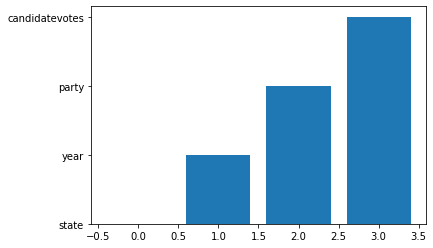

In [662]:
importancesvm = bestsvm.feature_names_in_
# plot feature importance
plt.bar([x for x in range(len(importancesvm))], importancesvm)
plt.show()

### 2- Decision Tree Classifier:

In [656]:
start = time.time()
dtc = DecisionTreeClassifier(random_state=40)
# define parameter grid
parameters_grid = {
    'max_depth': [7, 10, 12],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [2, 8]
}

# define grid search
grid_search = GridSearchCV(estimator=dtc, param_grid=parameters_grid, cv=10)

# fit estimator
grid_search.fit(svX_train, svY_train)

# get best estimator
bestdtc = grid_search.best_estimator_
print(bestdtc)

# print best parameters
print(pd.DataFrame.from_dict(grid_search.best_params_, orient='index', columns=['Selected Value']).T)

dtcpreds = bestdtc.predict(svX_test)
cacc = accuracy_score(svY_test, dtcpreds)
runc = time.time()-start
print("Decision Tree Classifier, Accuracy: ", cacc, "with run time of ",runc, ' seconds.')

C:\Users\lover\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,


DecisionTreeClassifier(max_depth=7, min_samples_leaf=2, random_state=40)
                max_depth  min_samples_leaf  min_samples_split
Selected Value          7                 2                  2
Decision Tree Classifier, Accuracy:  1.0 with run time of  1.2300403118133545  seconds.


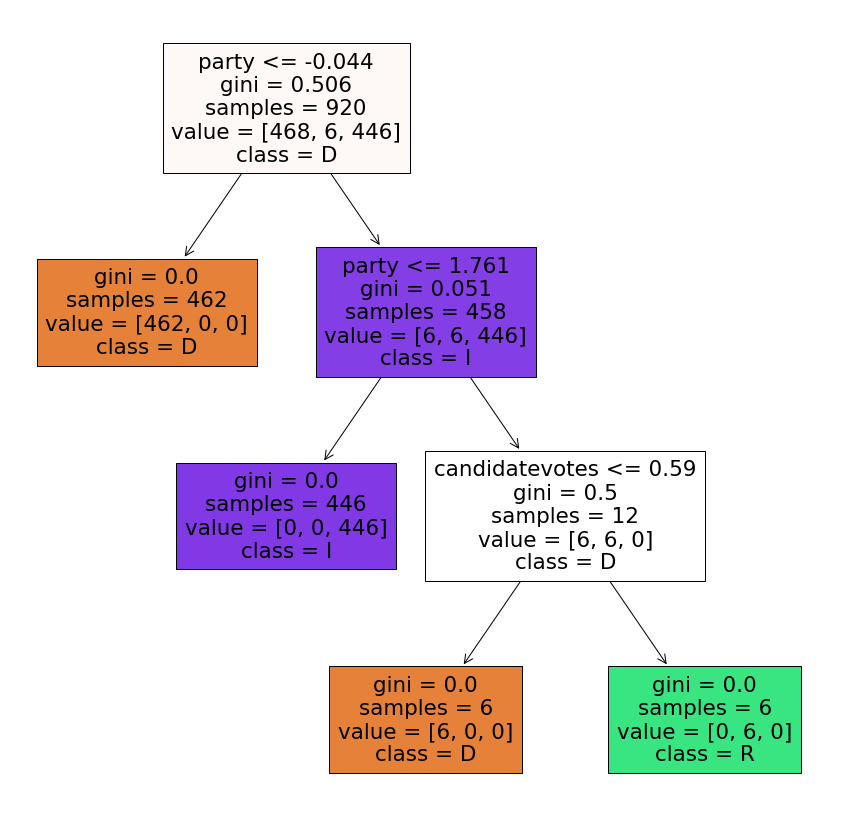

In [659]:
plt.figure(figsize=(15, 15))
tr = tree.plot_tree(bestdtc, feature_names=svmX.columns, class_names=['D', 'R', 'I'], filled=True)

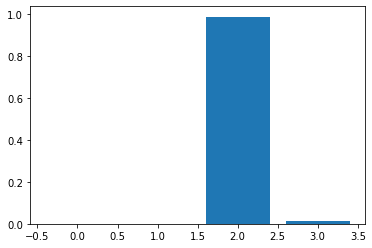

In [660]:
importancedtc = bestdtc.feature_importances_
# plot feature importance
plt.bar([x for x in range(len(importancedtc))], importancedtc)
plt.show()

### 3- Random Forest Classifier : 


In [ ]:
start = time.time()
rfc = RandomForestClassifier(random_state=40)

# define parameter grid
parameters_grid = {
    'max_depth': [2, 3],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [2, 8],
    'n_estimators': [100, 150]
}

# define grid search
grid_search = GridSearchCV(estimator=rfc, param_grid=parameters_grid, cv=10)

# fit estimator
grid_search.fit(svX_train, svY_train)

# get best estimator
bestrfc = grid_search.best_estimator_
print(bestrfc)

# print best parameters
print(pd.DataFrame.from_dict(grid_search.best_params_, orient='index', columns=['Selected Value']).T)

rfcpreds = bestrfc.predict(svX_test)
accrfc = accuracy_score(svY_test, rfcpreds)
runrfc = time.time()-start
print("Random Forest Classifier , Accuracy: ", accrfc, "with run time of ",runrfc, ' seconds.')

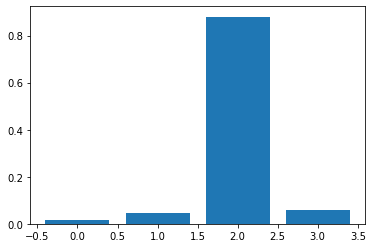

In [666]:
importancerfc = bestrfc.feature_importances_
# plot feature importance
plt.bar([x for x in range(len(importancerfc))], importancerfc)
plt.show()

### 4- Adaboost Classifier:

In [667]:
start = time.time()
adc = AdaBoostClassifier(random_state=40)

# define parameter grid
parameters_grid = {
    'learning_rate': [0,0.5,1],
    'n_estimators': [100, 150]
}

# define grid search
grid_search = GridSearchCV(estimator=adc, param_grid=parameters_grid, cv=10)

# fit estimator
grid_search.fit(svX_train, svY_train)

# get best estimator
bestadc = grid_search.best_estimator_
print(bestadc)

# print best parameters
print(pd.DataFrame.from_dict(grid_search.best_params_, orient='index', columns=['Selected Value']).T)

adcpreds = bestadc.predict(svX_test)
accadc = accuracy_score(svY_test, adcpreds)
runadc = time.time()-start
print("Adaboost Classifier , Accuracy: ", accadc, "with run time of ",runadc, ' seconds.')

C:\Users\lover\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
C:\Users\lover\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lover\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lover\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 486, in fit
    return

AdaBoostClassifier(learning_rate=0.5, n_estimators=100, random_state=40)
                learning_rate  n_estimators
Selected Value            0.5         100.0
Adaboost Classifier , Accuracy:  1.0 with run time of  26.840372562408447  seconds.


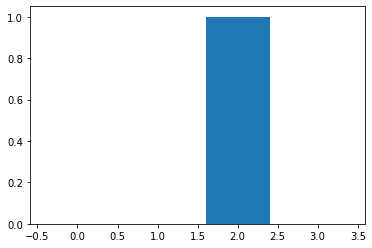

In [668]:
importanceadc = bestadc.feature_importances_
# plot feature importance
plt.bar([x for x in range(len(importanceadc))], importanceadc)
plt.show()

### 5- Gradientboost Classifier:

In [669]:
start = time.time()
gbc = GradientBoostingClassifier(random_state=40)

# define parameter grid
parameters_grid = {
    'learning_rate': [0,0.5,1],
    'n_estimators': [100, 150]
}

# define grid search
grid_search = GridSearchCV(estimator=gbc, param_grid=parameters_grid, cv=10)

# fit estimator
grid_search.fit(svX_train, svY_train)

# get best estimator
bestgbc = grid_search.best_estimator_
print(bestgbc)

# print best parameters
print(pd.DataFrame.from_dict(grid_search.best_params_, orient='index', columns=['Selected Value']).T)

gbcpreds = bestgbc.predict(svX_test)
accgbc = accuracy_score(svY_test, gbcpreds)
rungbc = time.time()-start
print("Gradientboost Classifier , Accuracy: ", accgbc, "with run time of ",rungbc, ' seconds.')

C:\Users\lover\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
C:\Users\lover\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lover\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lover\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 525, in fit
    self._check_params(

GradientBoostingClassifier(learning_rate=0.5, random_state=40)
                learning_rate  n_estimators
Selected Value            0.5         100.0
Gradientboost Classifier , Accuracy:  1.0 with run time of  22.804075002670288  seconds.


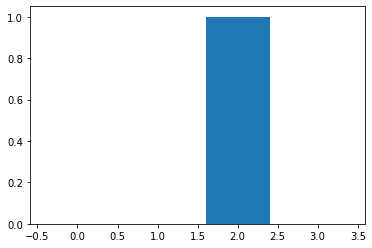

In [670]:
importancegbc = bestadc.feature_importances_
# plot feature importance
plt.bar([x for x in range(len(importancegbc))], importancegbc)
plt.show()

In [675]:
nfc10 = nfc.groupby(['year']).get_group((2010))

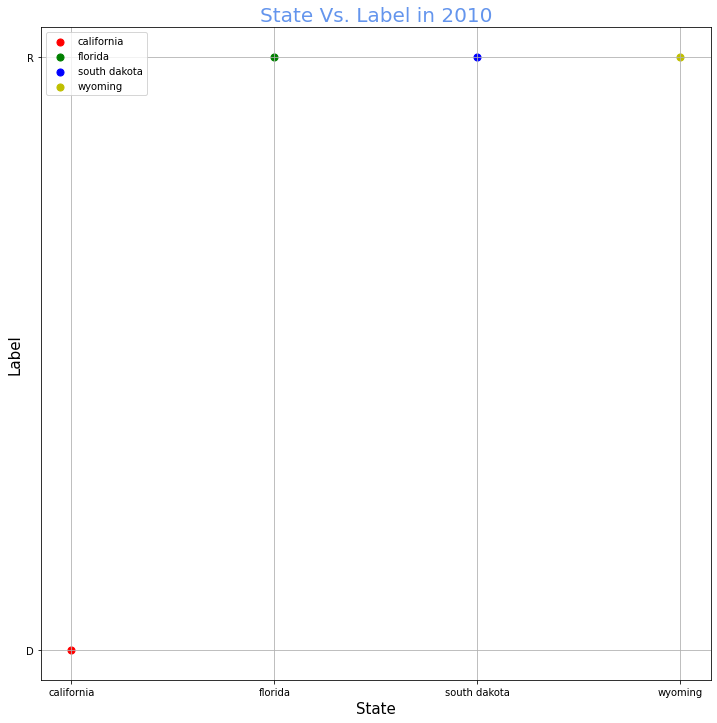

In [676]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('State', fontsize = 15)
ax.set_ylabel('Label', fontsize = 15)
ax.set_title('State Vs. Label in 2010', fontsize = 20, color='cornflowerblue')
targets = ['california', 'florida', 'south dakota', 'wyoming']
colors = ['r', 'g', 'b','y']
for target, color in zip(targets,colors):
    indicesToKeep = nfc10['state'] == target
    ax.scatter(nfc10.loc[indicesToKeep, 'state']
               , nfc10.loc[indicesToKeep, 'label']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

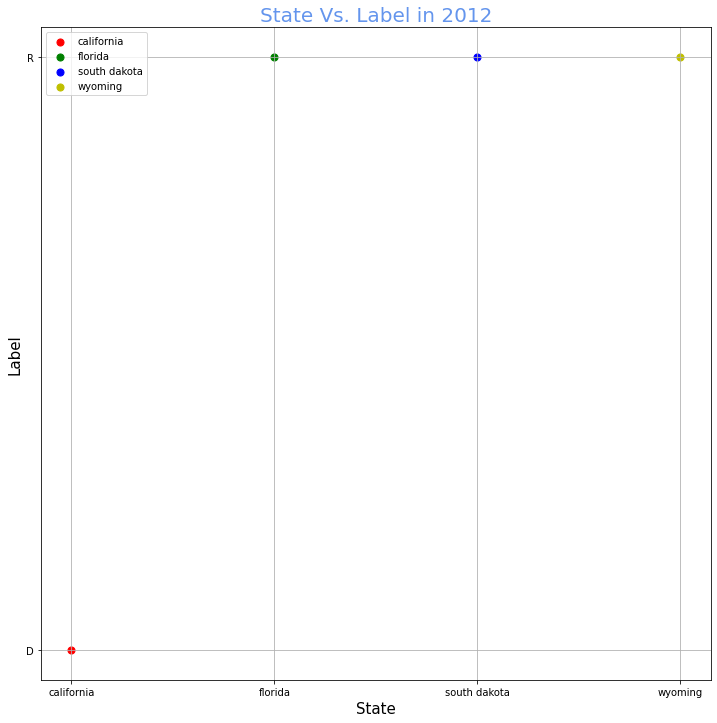

In [677]:
nfc12 = nfc.groupby(['year']).get_group((2012))
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('State', fontsize = 15)
ax.set_ylabel('Label', fontsize = 15)
ax.set_title('State Vs. Label in 2012', fontsize = 20, color='cornflowerblue')
targets = ['california', 'florida', 'south dakota', 'wyoming']
colors = ['r', 'g', 'b','y']
for target, color in zip(targets,colors):
    indicesToKeep = nfc12['state'] == target
    ax.scatter(nfc12.loc[indicesToKeep, 'state']
               , nfc12.loc[indicesToKeep, 'label']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Section E (Bonus) :